# Imports & setup

In [121]:
import nltk
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import re
import tempun
from collections import Counter

In [28]:
# global parameters for plots
plt.style.use("seaborn-v0_8-white")
plt.rcParams['figure.figsize'] = (4.5, 3)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"

plt.rcParams['font.size'] = 8
def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

# Load data

In [2]:
coins = pd.read_parquet("../data/coins_deities_df.parquet")

In [16]:
coins.head(5)

@id  \
1      http://numismatics.org/ocre/id/ric.4.ph_i.28A   
4       http://numismatics.org/ocre/id/ric.4.crl.191   
5          http://numismatics.org/ocre/id/ric.7.ar.2   
6  http://numismatics.org/ocre/id/ric.2_1(2).tit.288   
7      http://numismatics.org/ocre/id/ric.5.cara.745   

                                               @type ontology#hasAuthority  \
1  [http://www.w3.org/2004/02/skos/core#Concept, ...       philip_the_arab   
4  [http://www.w3.org/2004/02/skos/core#Concept, ...             caracalla   
5  [http://nomisma.org/ontology#TypeSeriesItem, h...         constantine_i   
6  [http://nomisma.org/ontology#TypeSeriesItem, h...                 titus   
7  [http://nomisma.org/ontology#TypeSeriesItem, h...             carausius   

  ontology#hasDenomination ontology#hasEndDate ontology#hasManufacture  \
1                   aureus          0247-01-01                  struck   
4                 denarius          0211-01-01                  struck   
5                  solidus          0313-01-01                  struck   
6               sestertius          0081-01-01                  struck   
7             antoninianus          0293-01-01                  struck   

  ontology#hasMaterial ontology#hasMint                 @id_obverse  \
1                   av             rome      ric.4.ph_i.28A#obverse   
4                   ar             rome       ric.4.crl.191#obverse   
5                   av          arelate          ric.7.ar.2#obverse   
6                   ae             rome  ric.2_1(2).tit.288#obverse   
7                   ar  uncertain_value      ric.5.cara.745#obverse   

  ontology#hasRegion                 @id_reverse ontology#hasStartDate  \
1              italy      ric.4.ph_i.28A#reverse            0244-01-01   
4              italy       ric.4.crl.191#reverse            0211-01-01   
5             gallia          ric.7.ar.2#reverse            0313-01-01   
6              italy  ric.2_1(2).tit.288#reverse            0080-01-01   
7          britannia      ric.5.cara.745#reverse            0286-01-01   

  ontology#representsObjectType source void#inDataset  \
1                          coin    ric                  
4                          coin    ric                  
5                          coin    ric                  
6                          coin    ric                  
7                          coin    ric                  

                             core#definition  \
1                        RIC IV Philip I 28A   
4                       RIC IV Caracalla 191   
5                          RIC VII Arelate 2   
6  RIC II, Part 1 (second edition) Titus 288   
7                        RIC V Carausius 745   

                              core#prefLabel   core#broader replaces  \
1                        RIC IV Philip I 28A  ric.4.ph_i.28            
4                       RIC IV Caracalla 191                           
5                          RIC VII Arelate 2                           
6  RIC II, Part 1 (second edition) Titus 288                           
7                        RIC V Carausius 745                           

  isReplacedBy core#exactMatch ontology#hasIssuer  \
1                                                   
4                                                   
5                                                   
6                                                   
7                                                   

                ontology#hasLegend_obverse ontology#hasPortrait_obverse  \
1                  IMP M IVL PHILIPPVS AVG              philip_the_arab   
4                  ANTONINVS PIVS AVG BRIT                    caracalla   
5                        LICINI-VS P F AVG                     licinius   
6  CAES DIVI AVG VESP F DOMITIANVS COS VII                     domitian   
7                             IMP CARAVSIV                    carausius   

                                 description_obverse  \
1  Bust of Philip the Arab, laureat

In [17]:
coins[coins["deities"].apply(lambda x: "Jupiter" in x)]

@id  \
44         http://numismatics.org/ocre/id/ric.4.mcs.75   
184    http://numismatics.org/ocre/id/ric.5.gall(2).47   
207    http://numismatics.org/ocre/id/ric.5.val_i.92aB   
241        http://numismatics.org/ocre/id/ric.5.dio.34   
282      http://numismatics.org/ocre/id/ric.5.cara.454   
...                                                ...   
51109     http://numismatics.org/ocre/id/ric.5.dio.494   
51163     http://numismatics.org/ocre/id/ric.5.car.128   
51224    http://numismatics.org/ocre/id/ric.3.com.553B   
51236     http://numismatics.org/ocre/id/ric.4.sa.141b   
51265      http://numismatics.org/ocre/id/ric.4.sa.561   

                                                   @type  \
44     [http://nomisma.org/ontology#TypeSeriesItem, h...   
184    [http://www.w3.org/2004/02/skos/core#Concept, ...   
207    [http://www.w3.org/2004/02/skos/core#Concept, ...   
241    [http://nomisma.org/ontology#TypeSeriesItem, h...   
282    [http://www.w3.org/2004/02/skos/core#Concept, ...   
...                                                  ...   
51109  [http://nomisma.org/ontology#TypeSeriesItem, h...   
51163  [http://www.w3.org/2004/02/skos/core#Concept, ...   
51224  [http://www.w3.org/2004/02/skos/core#Concept, ...   
51236  [http://www.w3.org/2004/02/skos/core#Concept, ...   
51265  [http://www.w3.org/2004/02/skos/core#Concept, ...   

      ontology#hasAuthority ontology#hasDenomination ontology#hasEndDate  \
44                 macrinus                   aureus          0218-01-01   
184               gallienus                   aureus          0268-01-01   
207                valerian             antoninianus          0254-01-01   
241                maximian             antoninianus          0294-01-01   
282               carausius             antoninianus          0293-01-01   
...                     ...                      ...                 ...   
51109              maximian                   aureus          0294-01-01   
51163                 carus             antoninianus          0283-01-01   
51224              commodus                       as          0189-01-01   
51236     severus_alexander                 denarius          0228-01-01   
51265     severus_alexander                dupondius          0231-01-01   

      ontology#hasManufacture ontology#hasMaterial    ontology#hasMint  \
44                     struck                   av                rome   
184                    struck                   av                rome   
207                    struck                   ar                rome   
241                    struck                   ar            lugdunum   
282                    struck                   ar     uncertain_value   
...                       ...                  ...                 ...   
51109                  struck                   av                rome   
51163                  struck                   ar  tripolis_phoenicia   
51224                  struck                   ae                rome   
51236                  struck                   ar                rome   
51265                  struck                   ae                rome   

                    @id_obverse ontology#hasRegion               @id_reverse  \
44         ric.4.mcs.75#obverse              italy      ric.4.mcs.75#reverse   
184    ric.5.gall(2).47#obverse              italy  ric.5.gall(2).47#reverse   
207    ric.5.val_i.92aB#obverse              italy  ric.5.val_i.92aB#reverse   
241        ric.5.dio.34#obverse             gallia      ric.5.dio.34#reverse   
282      ric.5.cara.454#obverse    uncertain_value    ric.5.cara.454#reverse   
...                         ...                ...                       ...   
51109     ric.5.dio.494#obverse              italy     ric.5.dio.494#reverse   
51163     ric.5.car.128#obverse          phoenicia     ric.5.car.128#reverse   
51224    ric.3.com.553B#obverse              italy    ric.3.com.553B#reverse   
51236     ric.4.sa.141b#obverse

In [18]:
# Wars and assasinations

wars = pd.read_csv("../data/wars-and-battles.csv")
wars["Duration"] = wars["Duration"] + 1
assassinated = pd.read_csv("../data/assassinated-emperors.csv")


In [19]:
coins["working_index"] = range(len(coins))
coins["random_dates"] = coins.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=10, seed=row["working_index"]), axis=1)

In [20]:
def get_first_random(random_dates):
    try:
        return random_dates[0]
    except:
        return None
coins["date_random"] = coins["random_dates"].apply(get_first_random)

In [21]:
coins.head(10)

@id  \
1       http://numismatics.org/ocre/id/ric.4.ph_i.28A   
4        http://numismatics.org/ocre/id/ric.4.crl.191   
5           http://numismatics.org/ocre/id/ric.7.ar.2   
6   http://numismatics.org/ocre/id/ric.2_1(2).tit.288   
7       http://numismatics.org/ocre/id/ric.5.cara.745   
8       http://numismatics.org/ocre/id/ric.6.anch.128   
9         http://numismatics.org/ocre/id/ric.5.aur.45   
13        http://numismatics.org/ocre/id/ric.5.pro.29   
15  http://numismatics.org/ocre/id/ric.2_3(2).hdn....   
17    http://numismatics.org/ocre/id/ric.3.m_aur.1397   

                                                @type ontology#hasAuthority  \
1   [http://www.w3.org/2004/02/skos/core#Concept, ...       philip_the_arab   
4   [http://www.w3.org/2004/02/skos/core#Concept, ...             caracalla   
5   [http://nomisma.org/ontology#TypeSeriesItem, h...         constantine_i   
6   [http://nomisma.org/ontology#TypeSeriesItem, h...                 titus   
7   [http://nomisma.org/ontology#TypeSeriesItem, h...             carausius   
8   [http://nomisma.org/ontology#TypeSeriesItem, h...        maximinus_daia   
9   [http://nomisma.org/ontology#TypeSeriesItem, h...              aurelian   
13  [http://www.w3.org/2004/02/skos/core#Concept, ...                probus   
15  [http://www.w3.org/2004/02/skos/core#Concept, ...               hadrian   
17  [http://nomisma.org/ontology#TypeSeriesItem, h...       marcus_aurelius   

   ontology#hasDenomination ontology#hasEndDate ontology#hasManufacture  \
1                    aureus          0247-01-01                  struck   
4                  denarius          0211-01-01                  struck   
5                   solidus          0313-01-01                  struck   
6                sestertius          0081-01-01                  struck   
7              antoninianus          0293-01-01                  struck   
8                    aureus          0311-01-01                  struck   
9              antoninianus          0275-01-01                  struck   
13             antoninianus          0282-01-01                  struck   
15                dupondius          0137-01-01                  struck   
17               sestertius          0164-01-01                  struck   

   ontology#hasMaterial  ontology#hasMint                  @id_obverse  \
1                    av              rome       ric.4.ph_i.28A#obverse   
4                    ar              rome        ric.4.crl.191#obverse   
5                    av           arelate           ric.7.ar.2#obverse   
6                    ae              rome   ric.2_1(2).tit.288#obverse   
7                    ar   uncertain_value       ric.5.cara.745#obverse   
8                    av  antiocheia_syria       ric.6.anch.128#obverse   
9                    ar              rome         ric.5.aur.45#obverse   
13                   ar          lugdunum         ric.5.pro.29#obverse   
15                   ae              rome  ric.2_3(2).hdn.2680#obverse   
17                   ae              rome     ric.3.m_aur.1397#obverse   

   ontology#hasRegion                  @id_reverse ontology#hasStartDate  \
1               italy       ric.4.ph_i.28A#reverse            0244-01-01   
4               italy        ric.4.crl.191#reverse            0211-01-01   
5              gallia           ric.7.ar.2#reverse            0313-01-01   
6               italy   ric.2_1(2).tit.288#reverse            0080-01-01   
7           britannia       ric.5.cara.745#reverse            0286-01-01   
8               syria       ric.6.anch.128#reverse            0310-01-01   
9               italy         ric.5.aur.45#reverse            0270-01-01   
13             gallia         ric.5.pro.29#reverse            0276-01-01   
15              italy  ric.2_3(2).hdn.2680#reverse            0137-01-01   
17              italy     ric.3.m_aur.1397#reverse            0163-01-01   

   ontology#representsObjectType source void#inDataset  \
1               

In [22]:
coins["ontology#hasDenomination"].unique()

array(['aureus', 'denarius', 'solidus', 'sestertius', 'antoninianus',
       'dupondius', 'as', 'quinarius', 'quinarius_aureus'], dtype=object)

In [23]:
cointypes_percentages = pd.DataFrame(coins.groupby("ontology#hasDenomination").size() / len(coins) * 100).reset_index()
cointypes_percentages.columns = ["denomination", "percentage"]
cointypes_percentages

denomination  percentage
0      antoninianus   27.090550
1                as    9.750651
2            aureus   13.206035
3          denarius   19.987976
4         dupondius    6.475623
5         quinarius    1.606023
6  quinarius_aureus    0.792992
7        sestertius   15.138416
8           solidus    5.951733

In [71]:
cointypes_percentages.to_csv("../data/cointypes_percentages.csv")

In [24]:
xticks50 = [el+1 if el== 0 else el for el in range(-50,400,50)]
xticks50

[-50, 1, 50, 100, 150, 200, 250, 300, 350]

In [25]:
xticks100 = [1,100,200,300]

In [26]:
xlims = (-50,350)

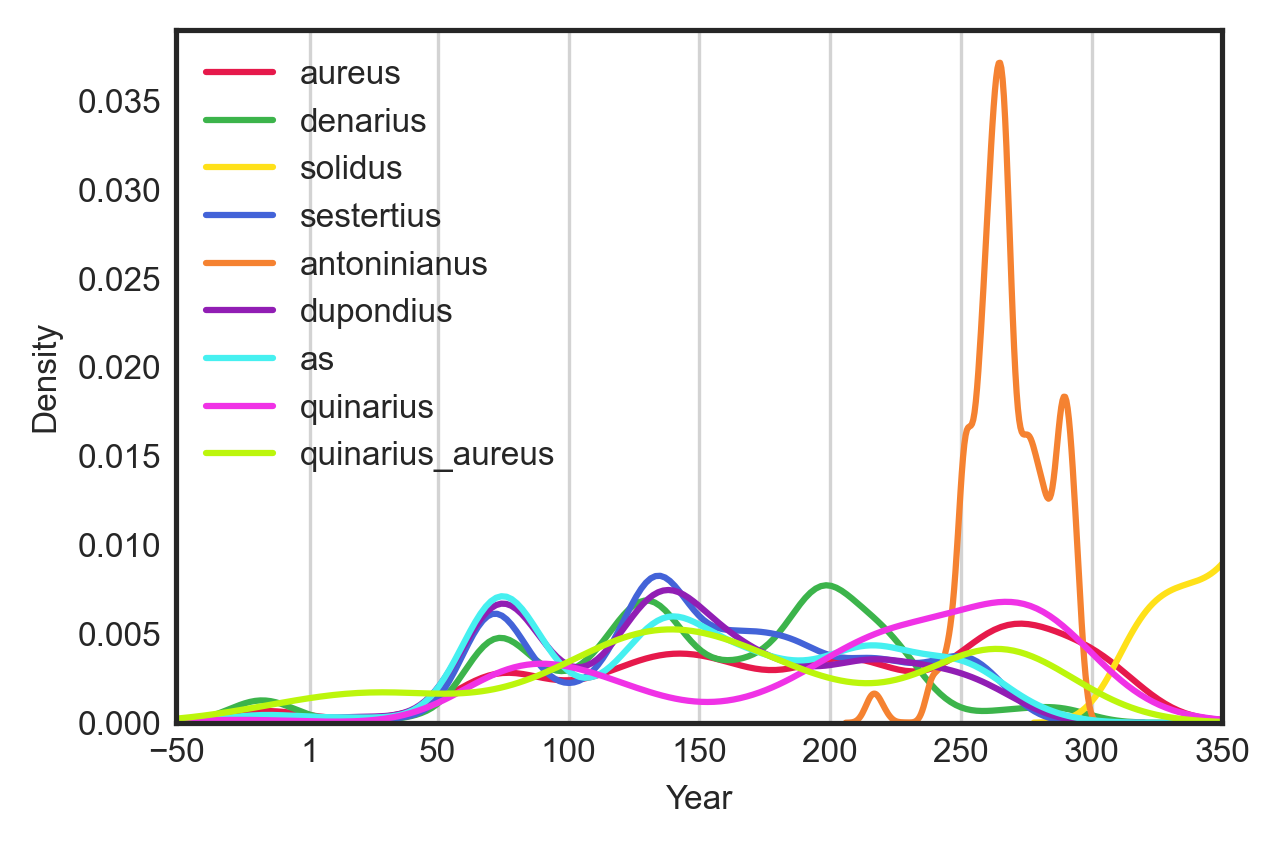

In [29]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()

for type, color in zip(coins["ontology#hasDenomination"].unique(), colors):
    sns.kdeplot(coins[coins["ontology#hasDenomination"]==type]["date_random"], color=color, label=type, ax=ax)
ax.set_xlim(xlims)
ax.set_xticks(xticks50)
ax.set_xlabel("Year")
ax.grid(axis="x", color="lightgrey")
ax.legend()

In [233]:
save_figure(fig, "tempdist_cointypes")

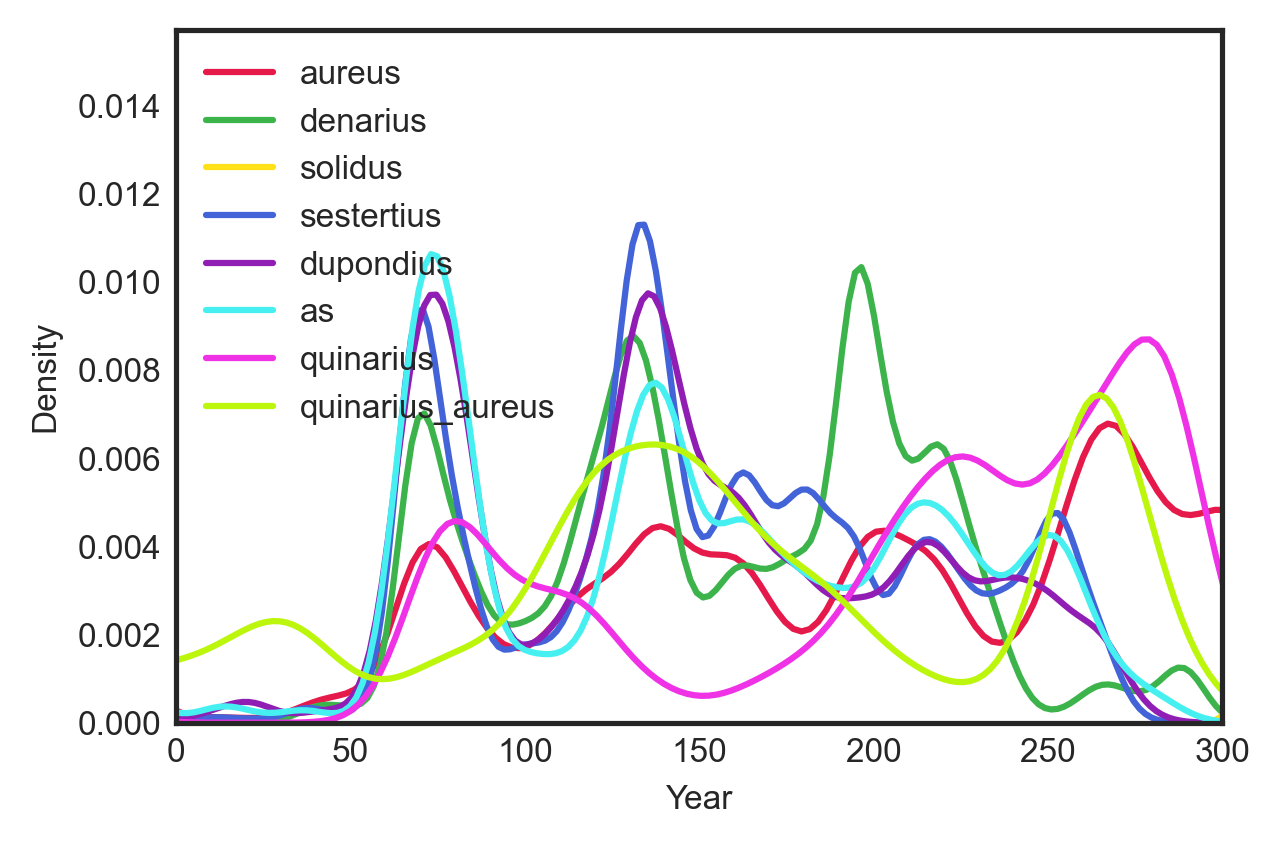

In [234]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()

for type, color in zip(coins["ontology#hasDenomination"].unique(), colors):
    if type != "antoninianus":
        sns.kdeplot(coins[coins["ontology#hasDenomination"]==type]["date_random"], color=color, label=type, ax=ax, bw_adjust=0.5)
ax.set_xlim(0,300)
ax.set_xlabel("Year")
ax.legend()

In [30]:
all_deities_list_flat = [d for dl in coins["deities"] for d in dl]
deities_top_counts = nltk.FreqDist(all_deities_list_flat).most_common()
deities_top20_counts = deities_top_counts[:20]
deities_top20_counts

[('Victory', 5375),
 ('Jupiter', 1361),
 ('Pax', 1326),
 ('Mars', 1317),
 ('Roma', 1286),
 ('Fortuna', 1110),
 ('Felicitas', 972),
 ('Providentia', 928),
 ('Concordia', 895),
 ('Salus', 839),
 ('Minerva', 832),
 ('Sol', 790),
 ('Liberalitas', 675),
 ('Aequitas', 613),
 ('Spes', 612),
 ('Hercules', 560),
 ('Pietas', 554),
 ('Fides', 534),
 ('Genius', 484),
 ('Securitas', 480)]

In [31]:
counts_types_dict = {}
counts_types_dict["total"] = dict(deities_top_counts)
for type  in coins["ontology#hasDenomination"].unique():
    #instances = [d for dl in coins[coins["ontology#hasDenomination"]==type]["deities"] for d in dl]
    deities_top_counts = dict(nltk.FreqDist([d for dl in coins[coins["ontology#hasDenomination"]==type]["deities"] for d in dl]).most_common())
    counts_types_dict[type] = deities_top_counts

In [32]:
counts_types_df = pd.DataFrame(counts_types_dict)
counts_types_df

total  aureus  denarius  solidus  sestertius  antoninianus  \
Victory          5375   689.0     790.0   1052.0       683.0        1096.0   
Jupiter          1361   281.0     151.0      3.0       145.0         647.0   
Pax              1326   105.0     163.0      8.0       228.0         603.0   
Mars             1317   176.0     274.0     19.0       191.0         463.0   
Roma             1286   176.0     236.0    170.0       245.0         260.0   
...               ...     ...       ...      ...         ...           ...   
Fortuna Felix       1     NaN       1.0      NaN         NaN           NaN   
Three Graces        1     1.0       NaN      NaN         NaN           NaN   
Caritas             1     NaN       NaN      NaN         NaN           1.0   
Diana Lucifera      1     NaN       1.0      NaN         NaN           NaN   
Cabirus             1     NaN       NaN      NaN         NaN           1.0   

                dupondius     as  quinarius  quinarius_aureus  
Victory             258.0  446.0      219.0             142.0  
Jupiter              38.0   70.0       17.0               9.0  
Pax                  86.0  111.0       18.0               4.0  
Mars                 58.0   99.0       21.0              16.0  
Roma                115.0   81.0        1.0               2.0  
...                   ...    ...        ...               ...  
Fortuna Felix         NaN    NaN        NaN               NaN  
Three Graces          NaN    NaN        NaN               NaN  
Caritas               NaN    NaN        NaN               NaN  
Diana Lucifera        NaN    NaN        NaN               NaN  
Cabirus               NaN    NaN        NaN               NaN  

[175 rows x 10 columns]

In [33]:
counts_types_df.fillna(0, inplace=True)

In [34]:
counts_types_df.corr().round(4)

total  aureus  denarius  solidus  sestertius  antoninianus  \
total             1.0000  0.9693    0.9484   0.8186      0.9644        0.9069   
aureus            0.9693  1.0000    0.9067   0.7792      0.9239        0.8822   
denarius          0.9484  0.9067    1.0000   0.6942      0.9554        0.8235   
solidus           0.8186  0.7792    0.6942   1.0000      0.7508        0.5898   
sestertius        0.9644  0.9239    0.9554   0.7508      1.0000        0.8332   
antoninianus      0.9069  0.8822    0.8235   0.5898      0.8332        1.0000   
dupondius         0.9302  0.8739    0.9539   0.6849      0.9588        0.8084   
as                0.9679  0.9230    0.9524   0.7831      0.9534        0.8328   
quinarius         0.8919  0.8686    0.7750   0.9311      0.8219        0.7176   
quinarius_aureus  0.8843  0.8560    0.7778   0.9352      0.8098        0.7016   

                  dupondius      as  quinarius  quinarius_aureus  
total                0.9302  0.9679     0.8919            0.8843  
aureus               0.8739  0.9230     0.8686            0.8560  
denarius             0.9539  0.9524     0.7750            0.7778  
solidus              0.6849  0.7831     0.9311            0.9352  
sestertius           0.9588  0.9534     0.8219            0.8098  
antoninianus         0.8084  0.8328     0.7176            0.7016  
dupondius            1.0000  0.9316     0.7511            0.7410  
as                   0.9316  1.0000     0.8667            0.8631  
quinarius            0.7511  0.8667     1.0000            0.9906  
quinarius_aureus     0.7410  0.8631     0.9906            1.0000

In [35]:
counts_types_corr = counts_types_df.corr(method="spearman").round(4)
counts_types_corr

total  aureus  denarius  solidus  sestertius  antoninianus  \
total             1.0000  0.8150    0.8304   0.3481      0.8419        0.7098   
aureus            0.8150  1.0000    0.8081   0.2909      0.7226        0.6137   
denarius          0.8304  0.8081    1.0000   0.2687      0.7133        0.6050   
solidus           0.3481  0.2909    0.2687   1.0000      0.2830        0.3297   
sestertius        0.8419  0.7226    0.7133   0.2830      1.0000        0.5318   
antoninianus      0.7098  0.6137    0.6050   0.3297      0.5318        1.0000   
dupondius         0.8831  0.7743    0.7829   0.3071      0.9008        0.6095   
as                0.8768  0.8015    0.7775   0.2954      0.8702        0.6177   
quinarius         0.6812  0.6819    0.6564   0.4366      0.6456        0.7534   
quinarius_aureus  0.6300  0.6257    0.6149   0.4291      0.5827        0.6718   

                  dupondius      as  quinarius  quinarius_aureus  
total                0.8831  0.8768     0.6812            0.6300  
aureus               0.7743  0.8015     0.6819            0.6257  
denarius             0.7829  0.7775     0.6564            0.6149  
solidus              0.3071  0.2954     0.4366            0.4291  
sestertius           0.9008  0.8702     0.6456            0.5827  
antoninianus         0.6095  0.6177     0.7534            0.6718  
dupondius            1.0000  0.9233     0.6828            0.6439  
as                   0.9233  1.0000     0.6748            0.6148  
quinarius            0.6828  0.6748     1.0000            0.7350  
quinarius_aureus     0.6439  0.6148     0.7350            1.0000

In [241]:
counts_types_corr.to_csv("../data/counts_types_corr_spearman.csv")

In [36]:
deities_top20 = [tup[0] for tup in deities_top20_counts]

In [37]:
start, stop = -50, 350
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_random"].between(date-diff, date+diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        deities_list_flat_top20 = [d for d in deities_list_flat if d in deities_top20]
        deities_counts = nltk.FreqDist(deities_list_flat_top20).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        deities_counts.append(("rest",  deities_count - len(deities_list_flat_top20)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n" : deities_count,
                     "counts" : deities_counts,
                     "freqs_pct" : deities_freqs_pct}
    else:
        year_data = {"date" : date,
                 "n" : 0,
                 "counts" : [],
                 "freqs_pct" : []}
    print(year_data)
    data.append(year_data)

{'date': -50, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -49, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -48, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -47, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -46, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -45, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -44, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -43, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -42, 'n': 2, 'counts': [('Victory', 1), ('rest', 1)], 'freqs_pct': [('Victory', 50.0), ('rest', 50.0)]}
{'date': -41, 'n': 9, 'counts': [('Victory', 6), ('Pax', 1), ('rest', 2)], 'freqs_pct': [('Victory', 66.67), ('Pax', 11.11), ('rest', 22.22)]}
{'date': -40, 'n': 12, 'counts': [('Victory', 9), ('Pax', 1), ('rest', 2)], 'freqs_pct': [('Victory', 75.0), ('Pax', 8.33), ('rest', 16.67)]}
{'date': -39, 'n': 15, 'counts': [('Victory', 12), ('Pax', 1), ('rest', 2)], 'freqs_pct': [('Victory', 80.0), ('Pax', 6.67), ('rest', 13.33)]}
{'date': -38, 'n': 16, 'counts': [(

In [38]:
date_freqs_df = pd.DataFrame([dict([("date", el["date"])]  + el["freqs_pct"]) for el in data])
date_freqs_df.set_index("date", inplace=True)

In [39]:
date_freqs_df = date_freqs_df[[col for col in date_freqs_df.columns if col !="rest"] + ["rest"]]

In [40]:
date_freqs_df.fillna(0, inplace=True) #,inplace=True)

In [41]:
date_freqs_df

Victory  Pax  Mars  Jupiter  Concordia  Securitas  Fortuna  Minerva  \
date                                                                        
-50      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-49      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-48      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-47      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-46      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
...       ...  ...   ...      ...        ...        ...      ...      ...   
 345    36.04  0.0  1.50      0.0        0.0       0.90      0.0      0.0   
 346    31.62  0.0  1.14      0.0        0.0       0.85      0.0      0.0   
 347    28.12  0.0  0.85      0.0        0.0       0.85      0.0      0.0   
 348    24.59  0.0  0.83      0.0        0.0       0.83      0.0      0.0   
 349    22.61  0.0  0.27      0.0        0.0       0.80      0.0      0.0   

      Spes   Roma  Liberalitas  Genius  Salus  Aequitas  Felicitas  Pietas  \
date                                                                         
-50    0.0   0.00          0.0     0.0    0.0       0.0        0.0     0.0   
-49    0.0   0.00          0.0     0.0    0.0       0.0        0.0     0.0   
-48    0.0   0.00          0.0     0.0    0.0       0.0        0.0     0.0   
-47    0.0   0.00          0.0     0.0    0.0       0.0        0.0     0.0   
-46    0.0   0.00          0.0     0.0    0.0       0.0        0.0     0.0   
...    ...    ...          ...     ...    ...       ...        ...     ...   
 345   0.0  23.12          0.0     0.0    0.0       0.0        0.0     0.0   
 346   0.0  25.93          0.0     0.0    0.0       0.0        0.0     0.0   
 347   0.0  27.84          0.0     0.0    0.0       0.0        0.0     0.0   
 348   0.0  29.83          0.0     0.0    0.0       0.0        0.0     0.0   
 349   0.0  31.38          0.0     0.0    0.0       0.0        0.0     0.0   

      Fides  Hercules  Providentia  Sol   rest  
date                                            
-50     0.0       0.0          0.0  0.0   0.00  
-49     0.0       0.0          0.0  0.0   0.00  
-48     0.0       0.0          0.0  0.0   0.00  
-47     0.0       0.0          0.0  0.0   0.00  
-46     0.0       0.0          0.0  0.0   0.00  
...     ...       ...          ...  ...    ...  
 345    0.0       0.0          0.0  0.0  38.44  
 346    0.0       0.0          0.0  0.0  40.46  
 347    0.0       0.0          0.0  0.0  42.33  
 348    0.0       0.0          0.0  0.0  43.92  
 349    0.0       0.0          0.0  0.0  44.95  

[400 rows x 21 columns]

In [42]:
date_freqs_dict = date_freqs_df.to_dict("list")# ["column_dtypes]

In [43]:
len(date_freqs_dict)

21

In [44]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

In [45]:
date_freqs_df.columns

Index(['Victory', 'Pax', 'Mars', 'Jupiter', 'Concordia', 'Securitas',
       'Fortuna', 'Minerva', 'Spes', 'Roma', 'Liberalitas', 'Genius', 'Salus',
       'Aequitas', 'Felicitas', 'Pietas', 'Fides', 'Hercules', 'Providentia',
       'Sol', 'rest'],
      dtype='object')

In [46]:
deities_color_dict = dict(zip(date_freqs_df.columns, colors))
deities_color_dict

{'Victory': '#e6194b',
 'Pax': '#3cb44b',
 'Mars': '#ffe119',
 'Jupiter': '#4363d8',
 'Concordia': '#f58231',
 'Securitas': '#911eb4',
 'Fortuna': '#46f0f0',
 'Minerva': '#f032e6',
 'Spes': '#bcf60c',
 'Roma': '#fabebe',
 'Liberalitas': '#008080',
 'Genius': '#e6beff',
 'Salus': '#9a6324',
 'Aequitas': '#fffac8',
 'Felicitas': '#800000',
 'Pietas': '#aaffc3',
 'Fides': '#808000',
 'Hercules': '#ffd8b1',
 'Providentia': '#000075',
 'Sol': '#808080',
 'rest': 'lightgray'}

In [47]:
len(colors)

21

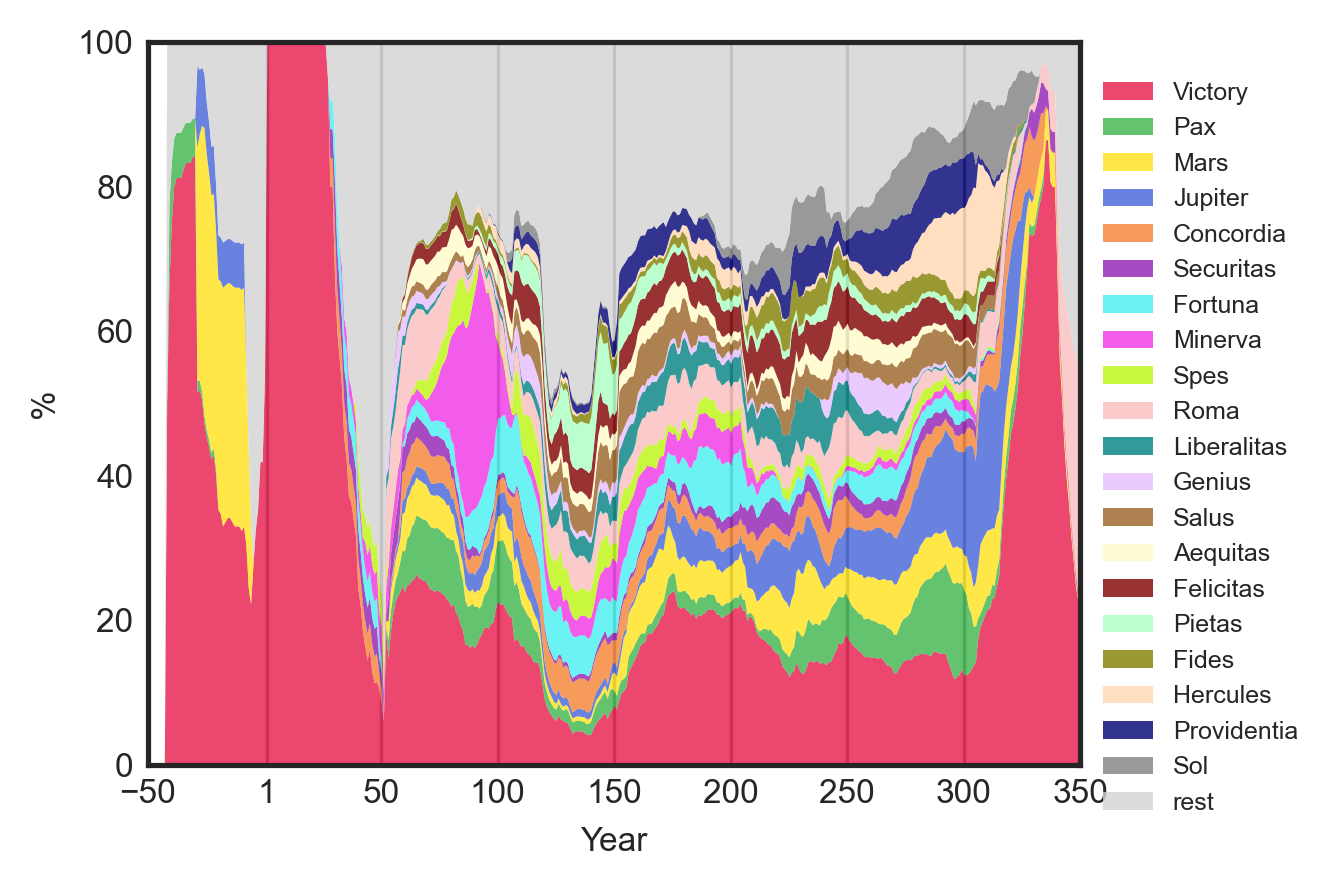

In [48]:
fig, ax = plt.subplots(dpi=300, tight_layout=True)
ax.stackplot(date_freqs_df.index, date_freqs_dict.values(),
             labels=date_freqs_dict.keys(), linewidth=0, colors=colors, alpha=0.8)
ax.legend(loc='lower left', bbox_to_anchor=(1,-0.1), fontsize=6)
ax.set_xlabel('Year')
ax.set_xlim(xlims)
ax.set_xticks(xticks50)
ax.set_ylabel('%')
ax.set_ylim(0,100)
ax.grid(axis="x", color="grey")

for n in wars.index:
    war = dict(wars.iloc[n])
#    ax.axvspan(war["Start_date"], war["End_date"], color="darkgrey", alpha=0.5)

for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
#    ax.axvline(assass["Assassinated"], color="darkred", lw=0.5)

In [258]:
save_figure(fig, "deities_portions_over_time")

In [49]:
start, stop = -50, 350
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_random"].between(date-diff, date+diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        deities_list_flat_bens = [d for d in deities_list_flat if d in ["Pax", "Securitas", "Felicitas", "Salus"]]
        deities_counts = nltk.FreqDist(deities_list_flat_bens).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        deities_counts.append(("rest",  deities_count - len(deities_list_flat_bens)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n" : deities_count,
                     "counts" : deities_counts,
                     "freqs_pct" : deities_freqs_pct}
    else:
        year_data = {"date" : date,
                     "n" : 0,
                     "counts" : [],
                     "freqs_pct" : []}
    print(year_data)
    data.append(year_data)

{'date': -50, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -49, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -48, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -47, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -46, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -45, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -44, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -43, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -42, 'n': 2, 'counts': [('rest', 2)], 'freqs_pct': [('rest', 100.0)]}
{'date': -41, 'n': 9, 'counts': [('Pax', 1), ('rest', 8)], 'freqs_pct': [('Pax', 11.11), ('rest', 88.89)]}
{'date': -40, 'n': 12, 'counts': [('Pax', 1), ('rest', 11)], 'freqs_pct': [('Pax', 8.33), ('rest', 91.67)]}
{'date': -39, 'n': 15, 'counts': [('Pax', 1), ('rest', 14)], 'freqs_pct': [('Pax', 6.67), ('rest', 93.33)]}
{'date': -38, 'n': 16, 'counts': [('Pax', 1), ('rest', 15)], 'freqs_pct': [('Pax', 6.25), ('rest', 93.75)]}
{'date': -37, 'n': 16, 'counts': [('Pax', 1), ('rest', 15)], 'freq

In [50]:
date_freqs_df_4bens = pd.DataFrame([dict([("date", el["date"])]  + el["freqs_pct"]) for el in data])
date_freqs_df_4bens.set_index("date", inplace=True)
date_freqs_df_4bens = date_freqs_df_4bens[["Securitas", "Pax", "Salus", "Felicitas", "rest"]]
date_freqs_df_4bens

Securitas  Pax  Salus  Felicitas   rest
date                                         
-50         NaN  NaN    NaN        NaN    NaN
-49         NaN  NaN    NaN        NaN    NaN
-48         NaN  NaN    NaN        NaN    NaN
-47         NaN  NaN    NaN        NaN    NaN
-46         NaN  NaN    NaN        NaN    NaN
...         ...  ...    ...        ...    ...
 345       0.90  NaN    NaN        NaN  99.10
 346       0.85  NaN    NaN        NaN  99.15
 347       0.85  NaN    NaN        NaN  99.15
 348       0.83  NaN    NaN        NaN  99.17
 349       0.80  NaN    NaN        NaN  99.20

[400 rows x 5 columns]

In [51]:
date_freqs_df_4bens.fillna(0, inplace=True)  #,inplace=True)
date_freqs_dict_4bens = date_freqs_df_4bens.to_dict("list")  # ["column_dtypes]

In [52]:
date_freqs_df_4bens

Securitas  Pax  Salus  Felicitas   rest
date                                         
-50        0.00  0.0    0.0        0.0   0.00
-49        0.00  0.0    0.0        0.0   0.00
-48        0.00  0.0    0.0        0.0   0.00
-47        0.00  0.0    0.0        0.0   0.00
-46        0.00  0.0    0.0        0.0   0.00
...         ...  ...    ...        ...    ...
 345       0.90  0.0    0.0        0.0  99.10
 346       0.85  0.0    0.0        0.0  99.15
 347       0.85  0.0    0.0        0.0  99.15
 348       0.83  0.0    0.0        0.0  99.17
 349       0.80  0.0    0.0        0.0  99.20

[400 rows x 5 columns]

In [53]:
colors = colors[:4] + ["lightgray"]
colors

['#e6194b', '#3cb44b', '#ffe119', '#4363d8', 'lightgray']

(0.0, 27.0)

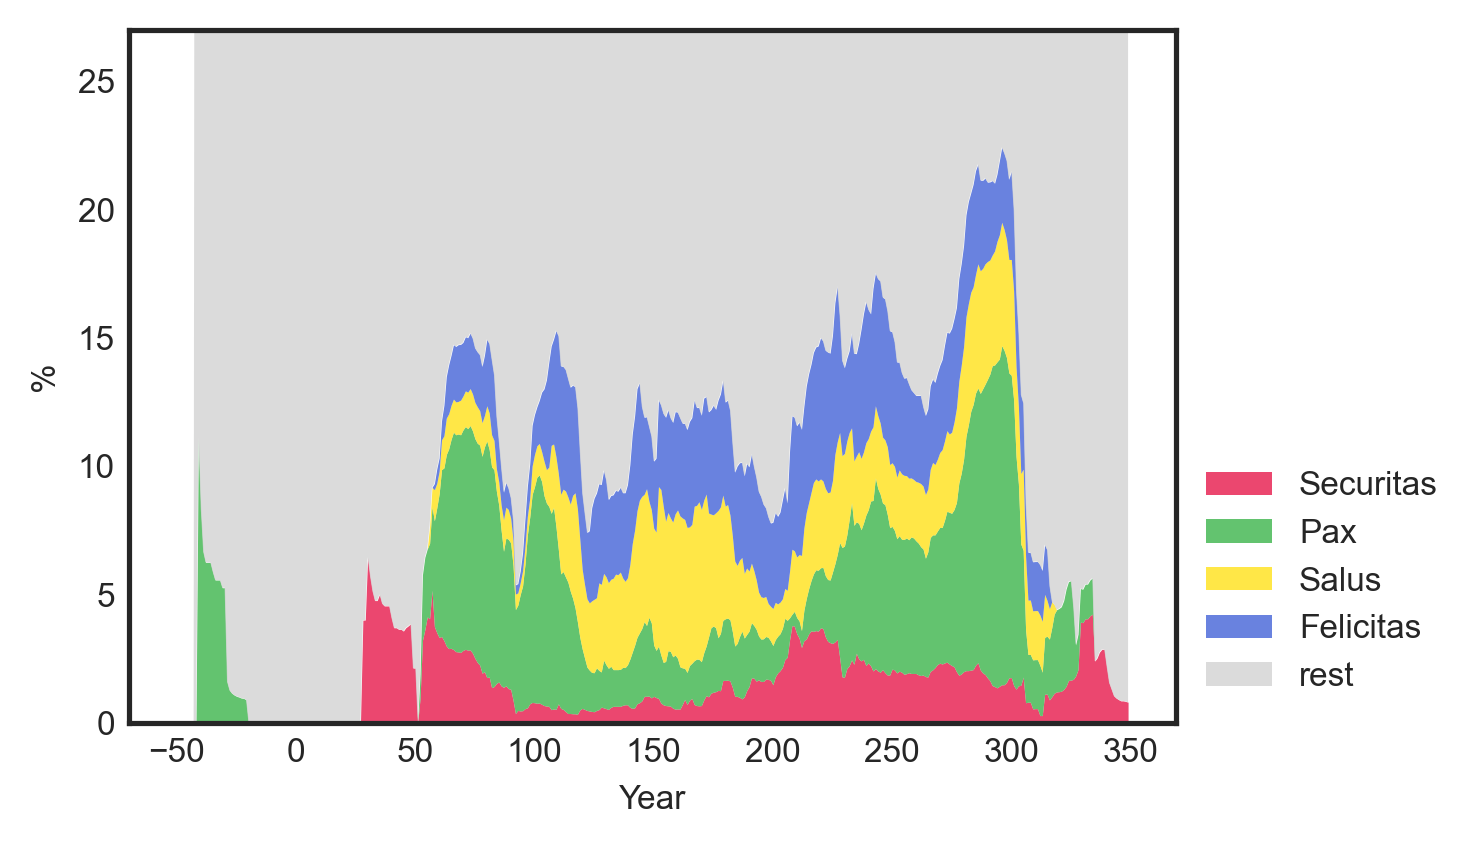

In [54]:
fig, ax = plt.subplots()
ax.stackplot(date_freqs_df_4bens.index, date_freqs_dict_4bens.values(),
             labels=date_freqs_dict_4bens.keys(), linewidth=0, colors=colors, alpha=0.8)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_xlabel('Year')
ax.set_ylabel('%')
ax.set_ylim(0,27)

# coins to dates

In [55]:
start, stop = -50, 350
data = []
for date in range(start, stop):
    date_subset = coins[coins["date_random"]==date]
    date_dict = {}
    date_dict["date"] = date
    #date_dict["coins_n"] = len(date_subset)
    deities_list_flat = [d for l in date_subset["deities"] for d in l]
    #date_dict["deities_n"] = len(deities_list_flat)
    deities_unique = list(set(deities_list_flat))
    #date_dict["deities_unique_N"] = len(deities_unique)
    deities_counts_dict = dict(nltk.FreqDist(deities_list_flat).most_common())
    date_dict.update(deities_counts_dict)
    data.append(date_dict)

In [56]:
deities_by_date_df = pd.DataFrame(data)
deities_by_date_df.fillna(0, inplace=True)  #,inplace=True)
deities_by_date_df.set_index("date", inplace=True)
deities_by_date_df[165:200]

Victory  Venus   Pax  Mars  Jupiter  Aurora  Apollo  Diana  Pegasus  \
date                                                                        
115       4.0    0.0   0.0   3.0      1.0     0.0     0.0    0.0      0.0   
116       3.0    0.0   0.0   2.0      2.0     0.0     0.0    1.0      0.0   
117      13.0    0.0  15.0   0.0      0.0     0.0     0.0    0.0      0.0   
118       0.0    0.0   0.0   0.0      0.0     0.0     0.0    0.0      0.0   
119       8.0    0.0   6.0   0.0      6.0     0.0     0.0    0.0      0.0   
120      26.0    0.0   3.0   3.0      5.0     0.0     0.0    0.0      0.0   
121      38.0    0.0   3.0   4.0      1.0     0.0     0.0    0.0      0.0   
122      13.0    0.0  10.0   0.0      5.0     0.0     0.0    0.0      0.0   
123      11.0    0.0   1.0   0.0      0.0     0.0     0.0    0.0      0.0   
124       5.0    0.0   0.0   1.0      0.0     0.0     0.0    4.0      2.0   
125       3.0    0.0   0.0   0.0      0.0     0.0     0.0    3.0      0.0   
126       7.0    0.0   0.0   0.0      1.0     0.0     0.0    0.0      0.0   
127      11.0    0.0   0.0   0.0      0.0     0.0     0.0    0.0      0.0   
128       7.0    0.0   0.0   2.0      2.0     0.0     0.0    0.0      0.0   
129      11.0    1.0   0.0   1.0      2.0     0.0     0.0    0.0     15.0   
130       3.0    2.0   1.0   3.0      1.0     0.0     0.0    0.0     12.0   
131       0.0    0.0   0.0   1.0      0.0     0.0     0.0    0.0      0.0   
132       2.0    1.0   0.0   3.0      0.0     0.0     0.0    0.0      0.0   
133       2.0    0.0   0.0   0.0      0.0     0.0     0.0    0.0      0.0   
134       2.0    0.0   2.0   0.0      6.0     0.0     0.0    0.0      0.0   
135       1.0    0.0   1.0   0.0      1.0     0.0     0.0    0.0      0.0   
136      33.0    3.0   6.0   0.0      5.0     0.0     0.0    0.0      0.0   
137       3.0   11.0   0.0   0.0      1.0     0.0     0.0    5.0      0.0   
138       7.0    6.0  10.0   0.0      0.0     0.0     0.0   14.0      0.0   
139       2.0    2.0  18.0   0.0      0.0     0.0     0.0    1.0      0.0   
140       4.0    2.0   1.0   1.0      2.0     0.0     3.0    0.0      0.0   
141       9.0   10.0   2.0   3.0      1.0     0.0     1.0    1.0      0.0   
142       8.0    0.0   1.0   2.0      1.0     0.0     2.0    0.0      0.0   
143      22.0    0.0   4.0   2.0      6.0     0.0     0.0    0.0      0.0   
144      12.0    0.0   1.0   2.0      5.0     0.0     0.0    0.0      0.0   
145       6.0    1.0   0.0   0.0      0.0     0.0     0.0    0.0      0.0   
146       0.0    2.0   0.0   0.0      0.0     0.0     0.0    0.0      0.0   
147       2.0    5.0   1.0   1.0      0.0     0.0     0.0    1.0      0.0   
148       4.0    4.0   0.0   2.0      0.0     0.0     0.0    0.0      0.0   
149       3.0    2.0   3.0   0.0      0.0     0.0     0.0    2.0      0.0   

      Pan  Sicilia  Neptune  Concordia  Securitas  Fortuna  Vesta  Constantia  \
date                                                                            
115   0.0      0.0      0.0        0.0        0.0      1.0    0.0         0.0   
116   0.0      0.0      0.0        0.0        0.0      5.0    2.0         0.0   
117   0.0      0.0      0.0       49.0        0.0     48.0    0.0         0.0   
118   0.0      0.0      0.0        0.0        0.0      1.0    1.0         0.0   
119   0.0      0.0      0.0        3.0        1.0      4.0    0.0         0.0   
120   0.0      0.0      0.0       10.0        3.0      1.0    0.0         0.0   
121   0.0      0.0      2.0       10.0        0.0      8.0    0.0         0.0   
122   0.0      0.0      1.0        2.0        0.0     15.0    0.0         0.0   
123   0.0      0.0      2.0        3.0        0.0      4.0    0.0         0.0   
124   0.0      0.0      0.0        3.0        0.0      0.0    0.0         0.0   
125   0.0      0.0      1.0        1.0        0.0      1.0    0.0         0.0   
126   0.0      0.0     12.0        1.0        0.0      0.0    0.0         0.0   
127   0.0      0.0    

<AxesSubplot: xlabel='date'>

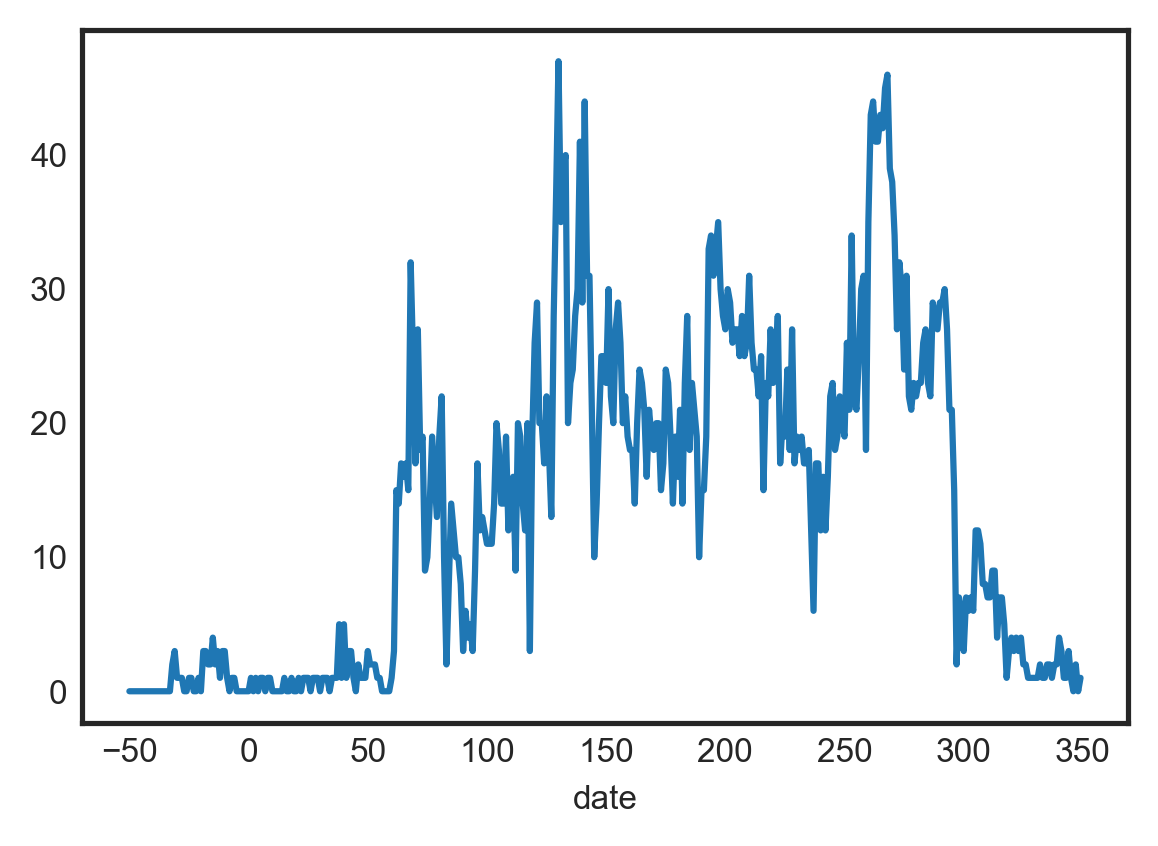

In [57]:
diversity_by_date = (deities_by_date_df > 0).sum(axis=1)
fig, ax = plt.subplots()
diversity_by_date.plot(ax=ax)

In [58]:
save_figure(fig, "diversity_by_date")

<AxesSubplot: xlabel='date'>

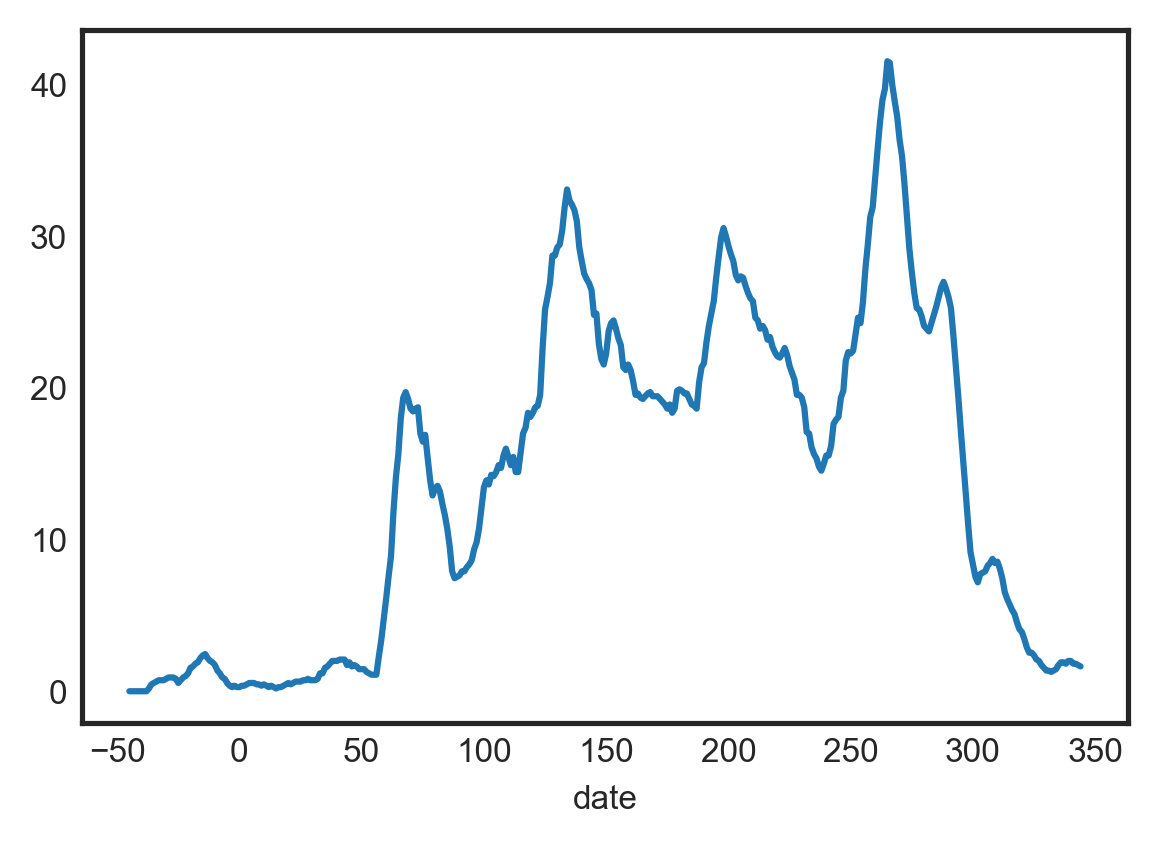

In [59]:
fig, ax = plt.subplots()
diversity_by_date.rolling(11, center=True).mean().plot()

In [270]:
save_figure(fig, "diversity_by_date_rolling11")

In [271]:
deities_by_date_share = deities_by_date_df.divide(deities_by_date_df.sum(axis=1), axis=0)
deities_by_date_share[165:200]

Victory     Venus       Pax      Mars   Jupiter  Aurora    Apollo  \
date                                                                       
115   0.111111  0.000000  0.000000  0.083333  0.027778     0.0  0.000000   
116   0.085714  0.000000  0.000000  0.057143  0.057143     0.0  0.000000   
117   0.050781  0.000000  0.058594  0.000000  0.000000     0.0  0.000000   
118   0.000000  0.000000  0.000000  0.000000  0.000000     0.0  0.000000   
119   0.114286  0.000000  0.085714  0.000000  0.085714     0.0  0.000000   
120   0.156627  0.000000  0.018072  0.018072  0.030120     0.0  0.000000   
121   0.188119  0.000000  0.014851  0.019802  0.004950     0.0  0.000000   
122   0.118182  0.000000  0.090909  0.000000  0.045455     0.0  0.000000   
123   0.177419  0.000000  0.016129  0.000000  0.000000     0.0  0.000000   
124   0.135135  0.000000  0.000000  0.027027  0.000000     0.0  0.000000   
125   0.069767  0.000000  0.000000  0.000000  0.000000     0.0  0.000000   
126   0.106061  0.000000  0.000000  0.000000  0.015152     0.0  0.000000   
127   0.244444  0.000000  0.000000  0.000000  0.000000     0.0  0.000000   
128   0.067308  0.000000  0.000000  0.019231  0.019231     0.0  0.000000   
129   0.032353  0.002941  0.000000  0.002941  0.005882     0.0  0.000000   
130   0.007812  0.005208  0.002604  0.007812  0.002604     0.0  0.000000   
131   0.000000  0.000000  0.000000  0.005464  0.000000     0.0  0.000000   
132   0.009662  0.004831  0.000000  0.014493  0.000000     0.0  0.000000   
133   0.011834  0.000000  0.000000  0.000000  0.000000     0.0  0.000000   
134   0.011765  0.000000  0.011765  0.000000  0.035294     0.0  0.000000   
135   0.013333  0.000000  0.013333  0.000000  0.013333     0.0  0.000000   
136   0.196429  0.017857  0.035714  0.000000  0.029762     0.0  0.000000   
137   0.010830  0.039711  0.000000  0.000000  0.003610     0.0  0.000000   
138   0.027344  0.023438  0.039062  0.000000  0.000000     0.0  0.000000   
139   0.013072  0.013072  0.117647  0.000000  0.000000     0.0  0.000000   
140   0.081633  0.040816  0.020408  0.020408  0.040816     0.0  0.061224   
141   0.026627  0.029586  0.005917  0.008876  0.002959     0.0  0.002959   
142   0.111111  0.000000  0.013889  0.027778  0.013889     0.0  0.027778   
143   0.236559  0.000000  0.043011  0.021505  0.064516     0.0  0.000000   
144   0.240000  0.000000  0.020000  0.040000  0.100000     0.0  0.000000   
145   0.113208  0.018868  0.000000  0.000000  0.000000     0.0  0.000000   
146   0.000000  0.095238  0.000000  0.000000  0.000000     0.0  0.000000   
147   0.045455  0.113636  0.022727  0.022727  0.000000     0.0  0.000000   
148   0.041237  0.041237  0.000000  0.020619  0.000000     0.0  0.000000   
149   0.038462  0.025641  0.038462  0.000000  0.000000     0.0  0.000000   

         Diana   Pegasus       Pan   Sicilia   Neptune  Concordia  Securitas  \
date                                                                           
115   0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
116   0.028571  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
117   0.000000  0.000000  0.000000  0.000000  0.000000   0.191406   0.000000   
118   0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
119   0.000000  0.000000  0.000000  0.000000  0.000000   0.042857   0.014286   
120   0.000000  0.000000  0.000000  0.000000  0.000000   0.060241   0.018072   
121   0.000000  0.000000  0.000000  0.000000  0.009901   0.049505   0.000000   
122   0.000000  0.000000  0.000000  0.000000  0.009091   0.018182   0.000000   
123   0.000000  0.000000  0.000000  0.000000  0.032258   0.048387   0.000000   
124   0.108108  0.054054  0.000000  0.000000  0.000000   0.081081   0.000000   
125   0.069767  0.000000  0.000000  0.000000  0.023256   0.023256   0.000000   
126   0.000000  0.000000  0.000000  0.000000  0.181818   0.015152   0.000000   
127   0.000000  0.000000  0.000000  0.000000  0.088889   0.000000   0.0000

In [272]:
def get_di(shares_vec):
    a = np.array(shares_vec)
    a = a**2
    hh = sum(a) # Hirschman-Herfindahl index
    ihh = 1 / hh # inverse Hirschman-Herfindahl index
    return ihh

In [273]:
deities_by_date_diversity = deities_by_date_share.apply(lambda row: get_di(row), axis=1)
deities_by_date_diversity[165:200]

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_50263/1977176274.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  deities_by_date_diversity[165:200]


date
115     8.526316
116     8.566434
117     7.829869
118     3.000000
119    13.172043
120    15.498313
121    12.751250
122    12.899787
123    11.648485
124    12.559633
125    16.362832
126    10.036866
127     7.105263
128    18.843206
129    15.852990
130    23.914369
131    18.350137
132    18.366481
133    19.958770
134     9.316570
135     9.582624
136    11.344051
137    10.131916
138    10.349968
139    21.417200
140    22.027523
141    11.333730
142    20.903226
143    11.160000
144     9.124088
145     5.815735
146    11.307692
147    13.444444
148    16.536028
149    14.349057
dtype: float64

Text(0.5, 0, 'Year')

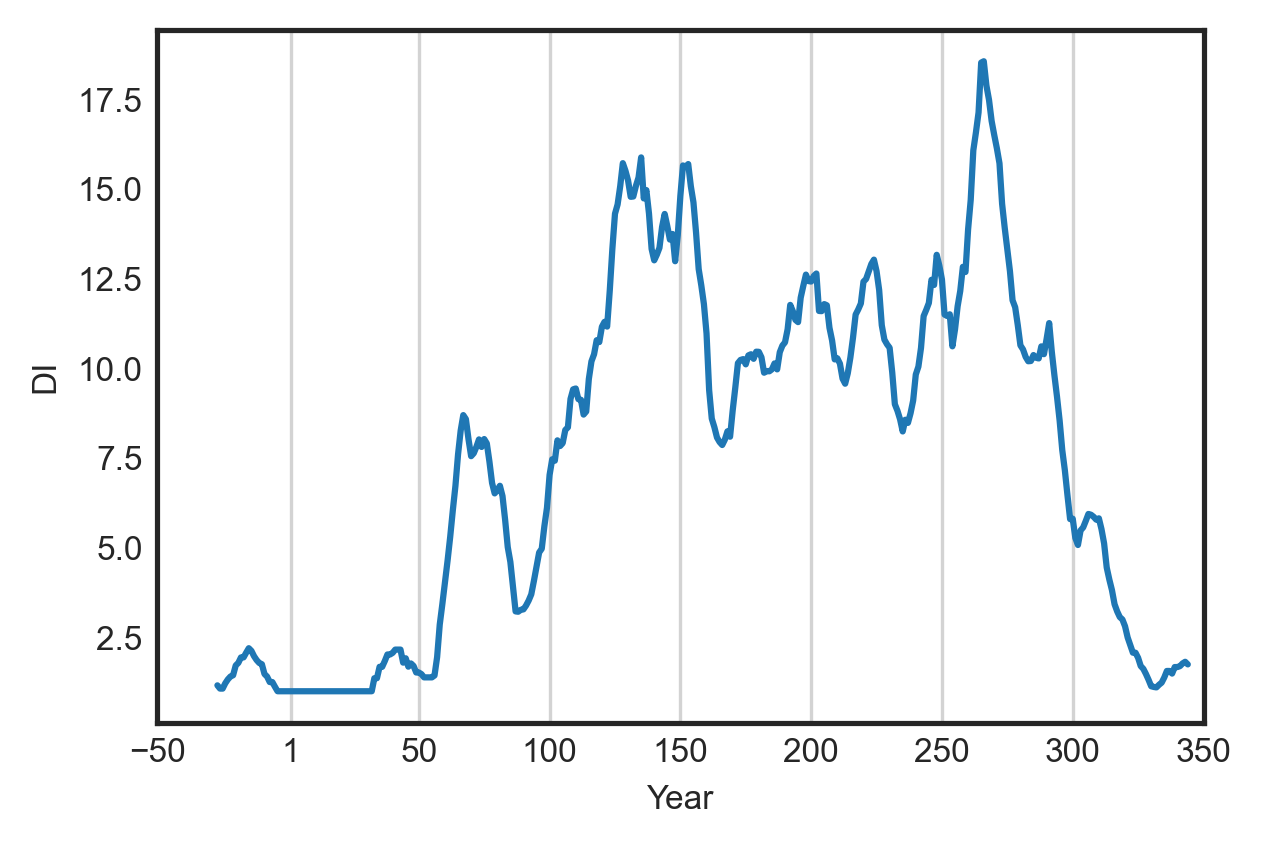

In [276]:
fig, ax = plt.subplots()
deities_by_date_diversity.interpolate().rolling(11, center=True).mean().plot(ax=ax)
ax.set_xlim(xlims)
ax.set_xticks(xticks50)
ax.grid(axis="x", color="lightgrey")
ax.set_ylabel("DI")
ax.set_xlabel("Year")

In [277]:
save_figure(fig, "deities_by_date_diversity_rolling11")

In [278]:
pctchange_df = deities_by_date_df.pct_change()
pctchange_df.replace(np.inf, 1, inplace=True)
pctchange_df.fillna(0, inplace=True)
pctchange_df = pctchange_df * 100 #to percentage
pctchange_df[100:140]

Victory       Venus         Pax        Mars     Jupiter  Aurora  \
date                                                                       
50      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
51      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
52      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
53      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
54      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
55    100.000000    0.000000    0.000000    0.000000    0.000000     0.0   
56   -100.000000    0.000000    0.000000    0.000000    0.000000     0.0   
57      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
58      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
59      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
60      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
61      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
62    100.000000    0.000000  100.000000  100.000000    0.000000     0.0   
63    -62.500000    0.000000  200.000000  200.000000    0.000000     0.0   
64    283.333333    0.000000    0.000000    0.000000  100.000000     0.0   
65      8.695652    0.000000  -33.333333  -33.333333 -100.000000     0.0   
66     16.000000    0.000000  100.000000  100.000000  100.000000     0.0   
67    -24.137931    0.000000    0.000000    0.000000 -100.000000     0.0   
68    245.454545    0.000000  325.000000  125.000000  100.000000     0.0   
69     50.000000    0.000000   58.823529  311.111111   10.000000     0.0   
70    -88.596491    0.000000  -44.444444  -70.270270 -100.000000     0.0   
71    692.307692    0.000000  140.000000  100.000000  100.000000     0.0   
72    -67.961165    0.000000  -66.666667  -54.545455    0.000000     0.0   
73     27.272727    0.000000   91.666667  -60.000000  200.000000     0.0   
74    -45.238095    0.000000  -47.826087 -100.000000  -33.333333     0.0   
75     30.434783    0.000000    0.000000    0.000000  -50.000000     0.0   
76    -73.333333    0.000000    8.333333    0.000000  400.000000     0.0   
77    175.000000    0.000000  -38.461538  100.000000  -40.000000     0.0   
78    -27.272727    0.000000    0.000000  -66.666667    0.000000     0.0   
79     31.250000  100.000000  -12.500000    0.000000 -100.000000     0.0   
80      4.761905  -85.714286  114.285714    0.000000    0.000000     0.0   
81     63.636364  -50.000000   40.000000  100.000000  100.000000     0.0   
82    -88.888889 -100.000000  -95.238095  -75.000000 -100.000000     0.0   
83   -100.000000    0.000000 -100.000000 -100.000000    0.000000     0.0   
84    100.000000    0.000000    0.000000  100.000000  100.000000     0.0   
85    300.000000    0.000000  100.000000  300.000000  200.000000     0.0   
86    -59.375000    0.000000 -100.000000  -75.000000  -33.333333     0.0   
87    -38.461538    0.000000    0.000000  -50.000000  -66.666667     0.0   
88      0.000000    0.000000    0.000000 -100.000000    0.000000     0.0   
89    -75.000000    0.000000  100.000000    0.000000  -50.000000     0.0   

          Apollo  Diana  Pegasus  Pan  Sicilia     Neptune   Concordia  \
date                                                                     
50      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
51      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
52      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
53      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
54      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
55      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
56      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
57      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
58      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
59

In [279]:
pctchange_df = pctchange_df.abs()
pctchange_df[100:140]

Victory       Venus         Pax        Mars     Jupiter  Aurora  \
date                                                                       
50      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
51      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
52      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
53      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
54      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
55    100.000000    0.000000    0.000000    0.000000    0.000000     0.0   
56    100.000000    0.000000    0.000000    0.000000    0.000000     0.0   
57      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
58      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
59      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
60      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
61      0.000000    0.000000    0.000000    0.000000    0.000000     0.0   
62    100.000000    0.000000  100.000000  100.000000    0.000000     0.0   
63     62.500000    0.000000  200.000000  200.000000    0.000000     0.0   
64    283.333333    0.000000    0.000000    0.000000  100.000000     0.0   
65      8.695652    0.000000   33.333333   33.333333  100.000000     0.0   
66     16.000000    0.000000  100.000000  100.000000  100.000000     0.0   
67     24.137931    0.000000    0.000000    0.000000  100.000000     0.0   
68    245.454545    0.000000  325.000000  125.000000  100.000000     0.0   
69     50.000000    0.000000   58.823529  311.111111   10.000000     0.0   
70     88.596491    0.000000   44.444444   70.270270  100.000000     0.0   
71    692.307692    0.000000  140.000000  100.000000  100.000000     0.0   
72     67.961165    0.000000   66.666667   54.545455    0.000000     0.0   
73     27.272727    0.000000   91.666667   60.000000  200.000000     0.0   
74     45.238095    0.000000   47.826087  100.000000   33.333333     0.0   
75     30.434783    0.000000    0.000000    0.000000   50.000000     0.0   
76     73.333333    0.000000    8.333333    0.000000  400.000000     0.0   
77    175.000000    0.000000   38.461538  100.000000   40.000000     0.0   
78     27.272727    0.000000    0.000000   66.666667    0.000000     0.0   
79     31.250000  100.000000   12.500000    0.000000  100.000000     0.0   
80      4.761905   85.714286  114.285714    0.000000    0.000000     0.0   
81     63.636364   50.000000   40.000000  100.000000  100.000000     0.0   
82     88.888889  100.000000   95.238095   75.000000  100.000000     0.0   
83    100.000000    0.000000  100.000000  100.000000    0.000000     0.0   
84    100.000000    0.000000    0.000000  100.000000  100.000000     0.0   
85    300.000000    0.000000  100.000000  300.000000  200.000000     0.0   
86     59.375000    0.000000  100.000000   75.000000   33.333333     0.0   
87     38.461538    0.000000    0.000000   50.000000   66.666667     0.0   
88      0.000000    0.000000    0.000000  100.000000    0.000000     0.0   
89     75.000000    0.000000  100.000000    0.000000   50.000000     0.0   

          Apollo  Diana  Pegasus  Pan  Sicilia     Neptune   Concordia  \
date                                                                     
50      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
51      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
52      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
53      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
54      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
55      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
56      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
57      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
58      0.000000    0.0      0.0  0.0      0.0    0.000000    0.000000   
59

In [280]:
pctchange_df["mean_change"] = pctchange_df.mean(axis=1)
pctchange_df["mean_change"][165:200]

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_50263/3430508925.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pctchange_df["mean_change"][165:200]


date
115    12.687528
116     9.114286
117    22.994558
118    12.559524
119    13.714286
120    20.352381
121    21.489482
122    26.368980
123     7.230769
124    11.515770
125    13.371429
126    23.428571
127     9.010513
128    23.235003
129    45.151020
130    41.571379
131    35.198958
132    17.574961
133    24.259934
134    26.258009
135     8.187656
136    42.438776
137    37.511998
138    23.547122
139    24.362324
140    26.575580
141    94.952381
142    20.878571
143    24.142857
144    19.608947
145    24.857143
146     8.785714
147    16.190476
148    17.563265
149    11.544444
Name: mean_change, dtype: float64

Text(0, 0.5, 'avg. pct. change')

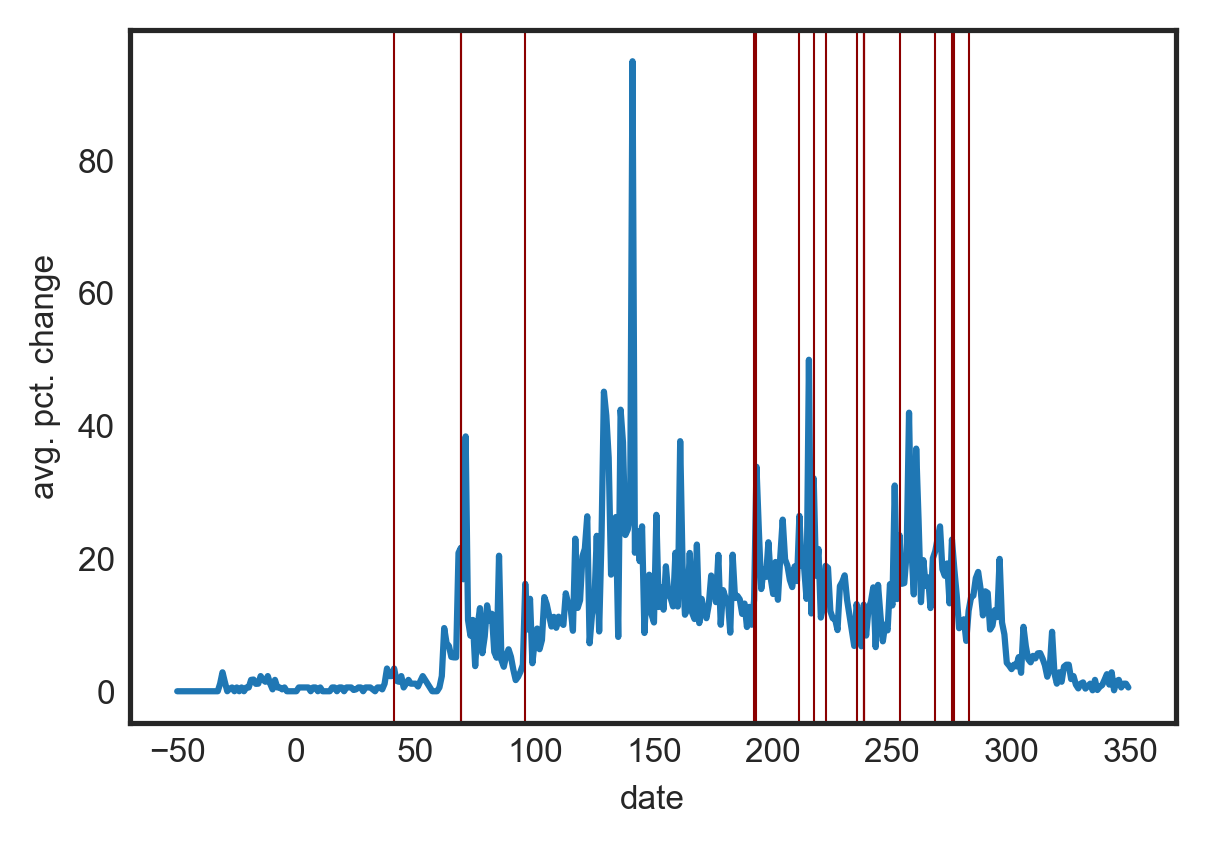

In [281]:
fig, ax = plt.subplots()

pctchange_df["mean_change"].plot(ax=ax)
for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax.axvline(assass["Assassinated"], color="darkred", lw=0.5)
ax.set_ylabel("avg. pct. change")

In [282]:
pctchange_df["sum_change"] = pctchange_df.sum(axis=1)
pctchange_df["sum_change"][100:140]

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_50263/909706374.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pctchange_df["sum_change"][100:140]


date
50     201.142857
51     125.714286
52     268.190476
53     402.285714
54     301.714286
55     201.142857
56     100.571429
57       0.000000
58       0.000000
59       0.000000
60     100.571429
61     402.285714
62    1676.190476
63    1275.700680
64    1197.638095
65     910.535818
66     898.704314
67     897.291735
68    3670.349206
69    3805.684474
70    2970.717047
71    6760.228571
72    1888.750383
73    1475.098413
74    1892.148358
75     666.204161
76    1716.419048
77    2204.706227
78    1009.306122
79    1451.441270
80    2278.721088
81    1881.349660
82    2055.109297
83    1040.914286
84     889.670330
85    3595.428571
86     826.212245
87     649.293564
88     947.047619
89    1112.571429
Name: sum_change, dtype: float64

Text(0, 0.5, 'sum pct. change')

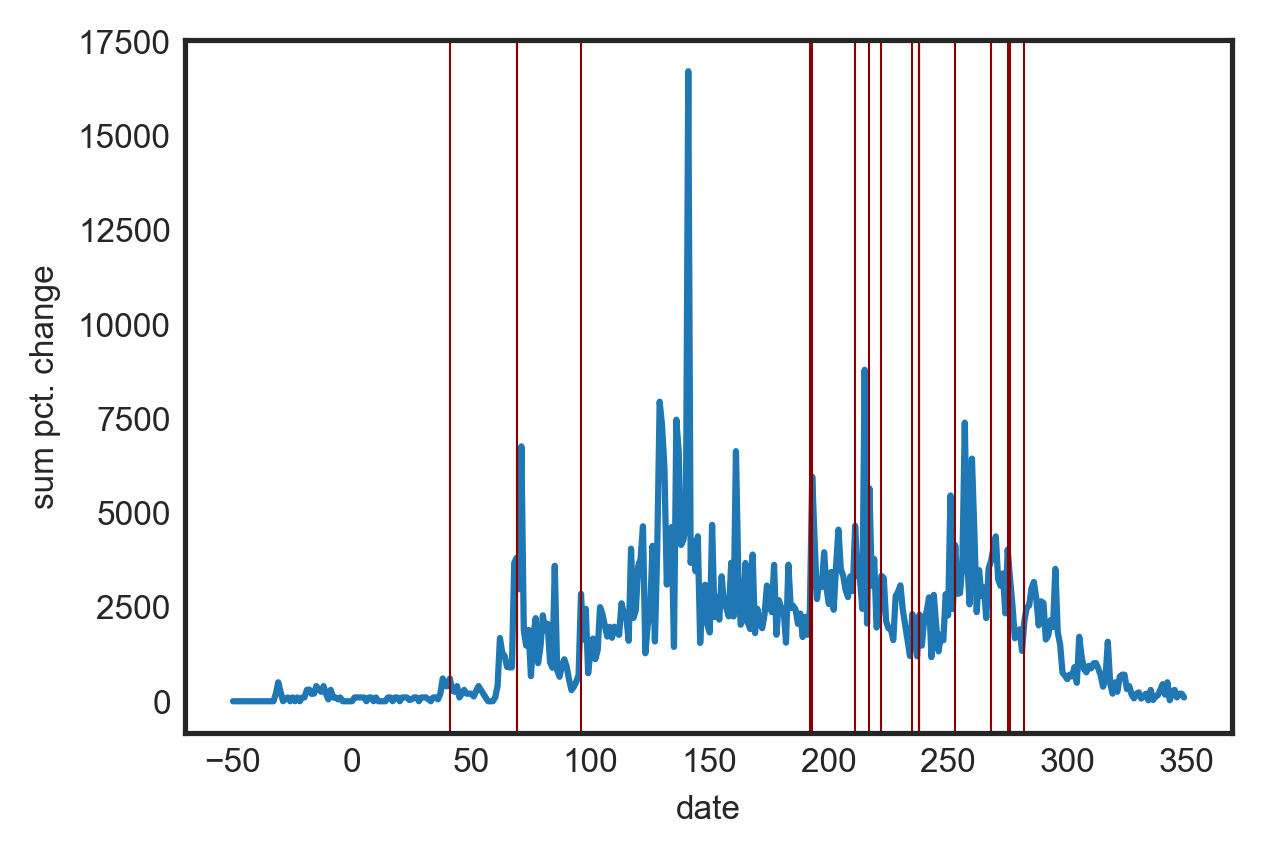

In [283]:
fig, ax = plt.subplots()

pctchange_df["sum_change"].plot(ax=ax)
for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax.axvline(assass["Assassinated"], color="darkred", lw=0.5)
ax.set_ylabel("sum pct. change")

# PNAS - lead pollution

In [121]:
pnas = pd.read_excel("../data/pnas.xlsx", sheet_name="Fig. 2", header=None)
pnas.head(10)

0     1  \
0  Please reference the following when using thes...   NaN   
1  McConnell, J.R., A.I. Wilson, A. Stohl, M.M. A...   NaN   
2   Lead pollution recorded in Greenland ice indi...   NaN   
3   Proc Natl Acad Sci U.S.A., doi: 10.1073/pnas....   NaN   
4                                                NaN   NaN   
5                                        Year Before  Lead   
6                                               1950  pg/g   
7                                             3185.5  2.86   
8                                             3184.5  3.86   
9                                             3183.5  2.24   

                       2  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6  Missing values -0.999  
7                    NaN  
8                    NaN  
9                    NaN

In [122]:
pnas = pnas[7:].copy()
pnas["date"] = pnas[0].apply(lambda x: 1950.5 - x)
def clean_pol(pol):
    if pol == -0.999:
        pol = np.nan
    return pol
pnas["pollution"] = pnas[1].apply(clean_pol)
pnas.head(5)

0     1    2    date  pollution
7   3185.5  2.86  NaN -1235.0       2.86
8   3184.5  3.86  NaN -1234.0       3.86
9   3183.5  2.24  NaN -1233.0       2.24
10  3182.5  1.79  NaN -1232.0       1.79
11  3181.5  1.44  NaN -1231.0       1.44

In [123]:
#pnas.set_index("date", inplace=True)
pnas[100:120]

0      1    2    date  pollution
107  3085.5   3.22  NaN -1135.0       3.22
108  3084.5   2.23  NaN -1134.0       2.23
109  3083.5   2.79  NaN -1133.0       2.79
110  3082.5   1.46  NaN -1132.0       1.46
111  3081.5   2.09  NaN -1131.0       2.09
112  3080.5 -0.999  NaN -1130.0        NaN
113  3079.5   1.09  NaN -1129.0       1.09
114  3078.5   1.27  NaN -1128.0       1.27
115  3077.5   1.99  NaN -1127.0       1.99
116  3076.5   1.49  NaN -1126.0       1.49
117  3075.5   1.86  NaN -1125.0       1.86
118  3074.5   3.77  NaN -1124.0       3.77
119  3073.5   2.88  NaN -1123.0       2.88
120  3072.5   3.79  NaN -1122.0       3.79
121  3071.5   3.74  NaN -1121.0       3.74
122  3070.5   2.27  NaN -1120.0       2.27
123  3069.5   1.98  NaN -1119.0       1.98
124  3068.5   1.47  NaN -1118.0       1.47
125  3067.5   1.33  NaN -1117.0       1.33
126  3066.5   1.22  NaN -1116.0       1.22

In [124]:
pnas['pollution'].interpolate().rolling(11, center=True).mean()

7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
        ..
2039   NaN
2040   NaN
2041   NaN
2042   NaN
2043   NaN
Name: pollution, Length: 2037, dtype: float64

(-50.0, 350.0)

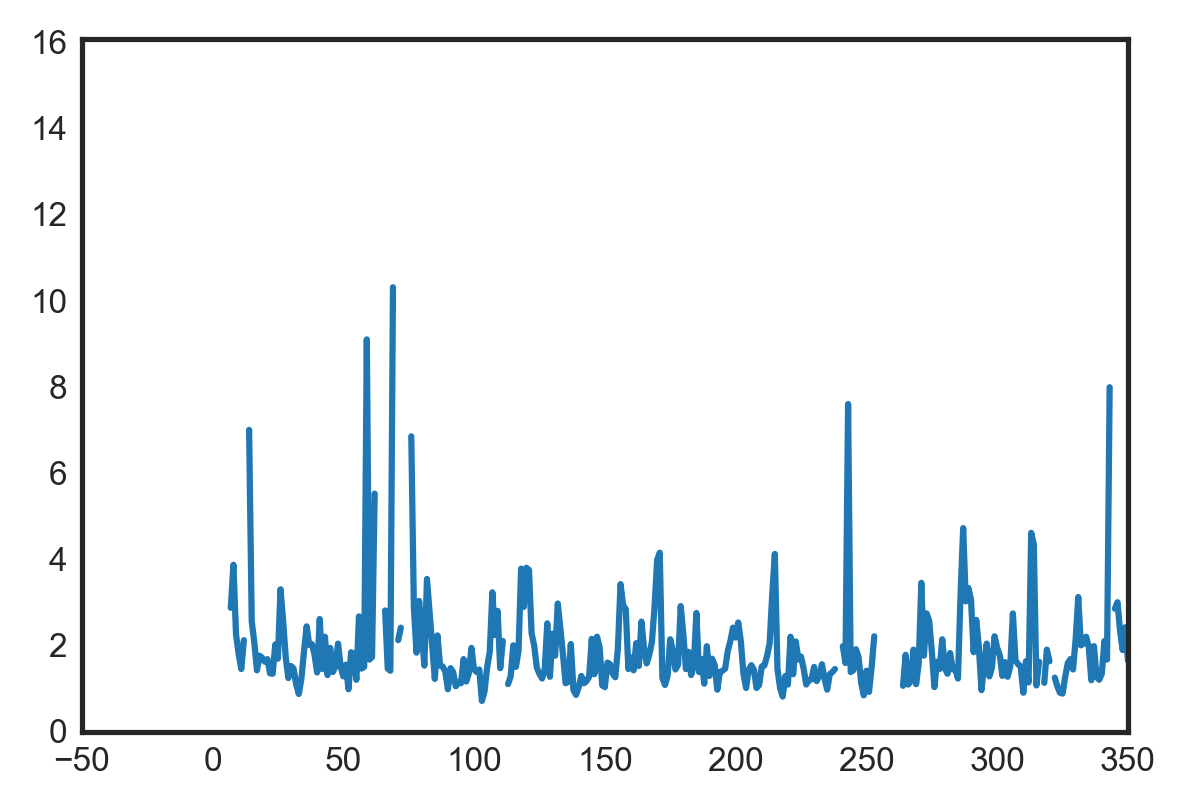

In [125]:
fig,ax = plt.subplots()
ax.plot(pnas["pollution"])
ax.set_xlim(-50,350)

(-50.0, 350.0)

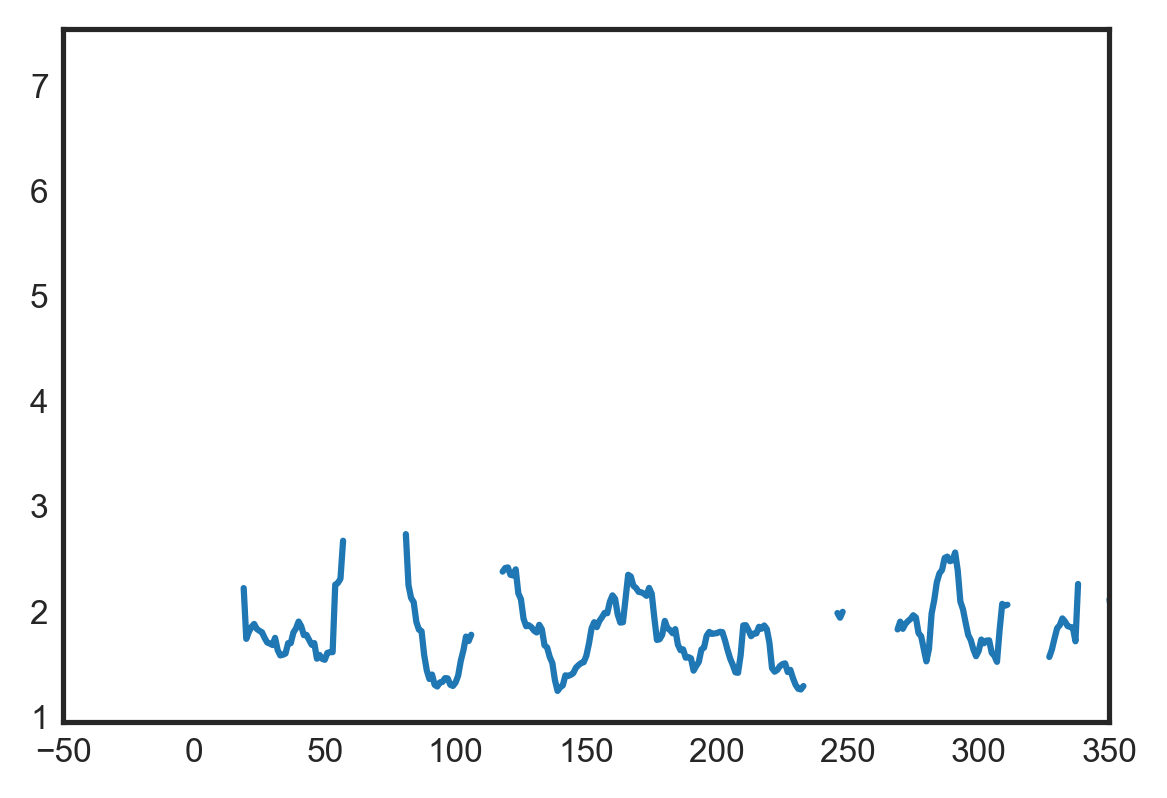

In [126]:
fig,ax = plt.subplots()
ax.plot(pnas["pollution"].rolling(11, center=True).mean())
ax.set_xlim(-50,350)

In [127]:
pnas['pollution_interpol'] = pnas['pollution'].interpolate()

(-50.0, 350.0)

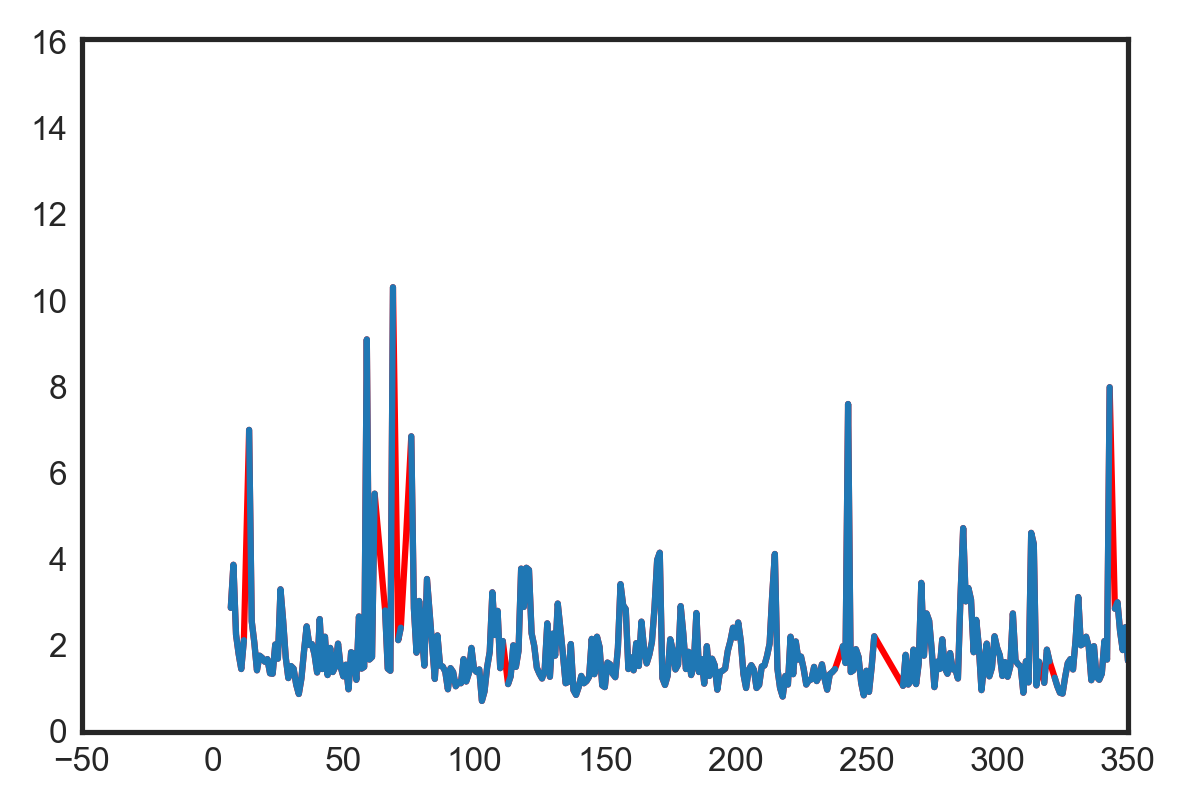

In [128]:
fig, ax = plt.subplots()
ax.plot(pnas["pollution_interpol"], color="red")
ax.plot(pnas["pollution"])
ax.set_xlim(-50, 350)

(-50.0, 350.0)

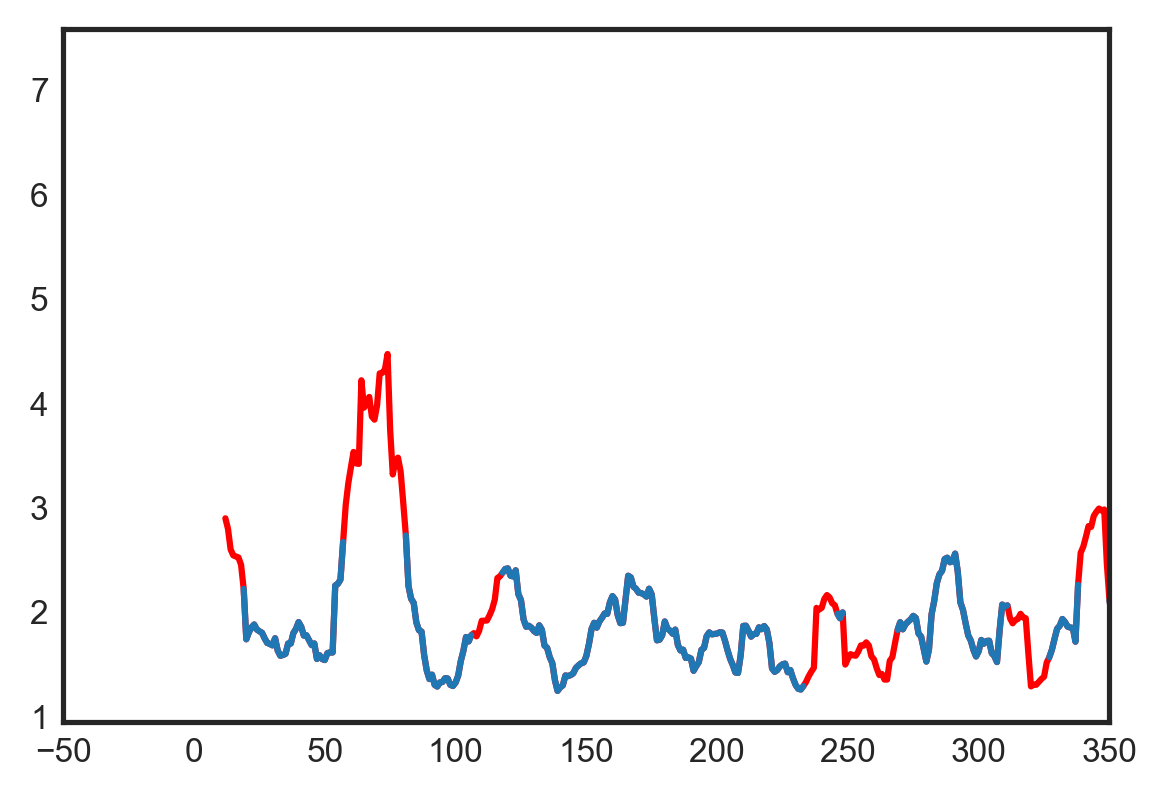

In [129]:
fig, ax = plt.subplots()
ax.plot(pnas["pollution_interpol"].rolling(11, center=True).mean(), color="red")
ax.plot(pnas["pollution"].rolling(11, center=True).mean())
ax.set_xlim(-50, 350)

#   Returning back to deities

In [60]:
date_freqs_df

Victory  Pax  Mars  Jupiter  Concordia  Securitas  Fortuna  Minerva  \
date                                                                        
-50      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-49      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-48      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-47      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
-46      0.00  0.0  0.00      0.0        0.0       0.00      0.0      0.0   
...       ...  ...   ...      ...        ...        ...      ...      ...   
 345    36.04  0.0  1.50      0.0        0.0       0.90      0.0      0.0   
 346    31.62  0.0  1.14      0.0        0.0       0.85      0.0      0.0   
 347    28.12  0.0  0.85      0.0        0.0       0.85      0.0      0.0   
 348    24.59  0.0  0.83      0.0        0.0       0.83      0.0      0.0   
 349    22.61  0.0  0.27      0.0        0.0       0.80      0.0      0.0   

      Spes   Roma  Liberalitas  Genius  Salus  Aequitas  Felicitas  Pietas  \
date                                                                         
-50    0.0   0.00          0.0     0.0    0.0       0.0        0.0     0.0   
-49    0.0   0.00          0.0     0.0    0.0       0.0        0.0     0.0   
-48    0.0   0.00          0.0     0.0    0.0       0.0        0.0     0.0   
-47    0.0   0.00          0.0     0.0    0.0       0.0        0.0     0.0   
-46    0.0   0.00          0.0     0.0    0.0       0.0        0.0     0.0   
...    ...    ...          ...     ...    ...       ...        ...     ...   
 345   0.0  23.12          0.0     0.0    0.0       0.0        0.0     0.0   
 346   0.0  25.93          0.0     0.0    0.0       0.0        0.0     0.0   
 347   0.0  27.84          0.0     0.0    0.0       0.0        0.0     0.0   
 348   0.0  29.83          0.0     0.0    0.0       0.0        0.0     0.0   
 349   0.0  31.38          0.0     0.0    0.0       0.0        0.0     0.0   

      Fides  Hercules  Providentia  Sol   rest  
date                                            
-50     0.0       0.0          0.0  0.0   0.00  
-49     0.0       0.0          0.0  0.0   0.00  
-48     0.0       0.0          0.0  0.0   0.00  
-47     0.0       0.0          0.0  0.0   0.00  
-46     0.0       0.0          0.0  0.0   0.00  
...     ...       ...          ...  ...    ...  
 345    0.0       0.0          0.0  0.0  38.44  
 346    0.0       0.0          0.0  0.0  40.46  
 347    0.0       0.0          0.0  0.0  42.33  
 348    0.0       0.0          0.0  0.0  43.92  
 349    0.0       0.0          0.0  0.0  44.95  

[400 rows x 21 columns]

In [61]:
deities_top20

['Victory',
 'Jupiter',
 'Pax',
 'Mars',
 'Roma',
 'Fortuna',
 'Felicitas',
 'Providentia',
 'Concordia',
 'Salus',
 'Minerva',
 'Sol',
 'Liberalitas',
 'Aequitas',
 'Spes',
 'Hercules',
 'Pietas',
 'Fides',
 'Genius',
 'Securitas']

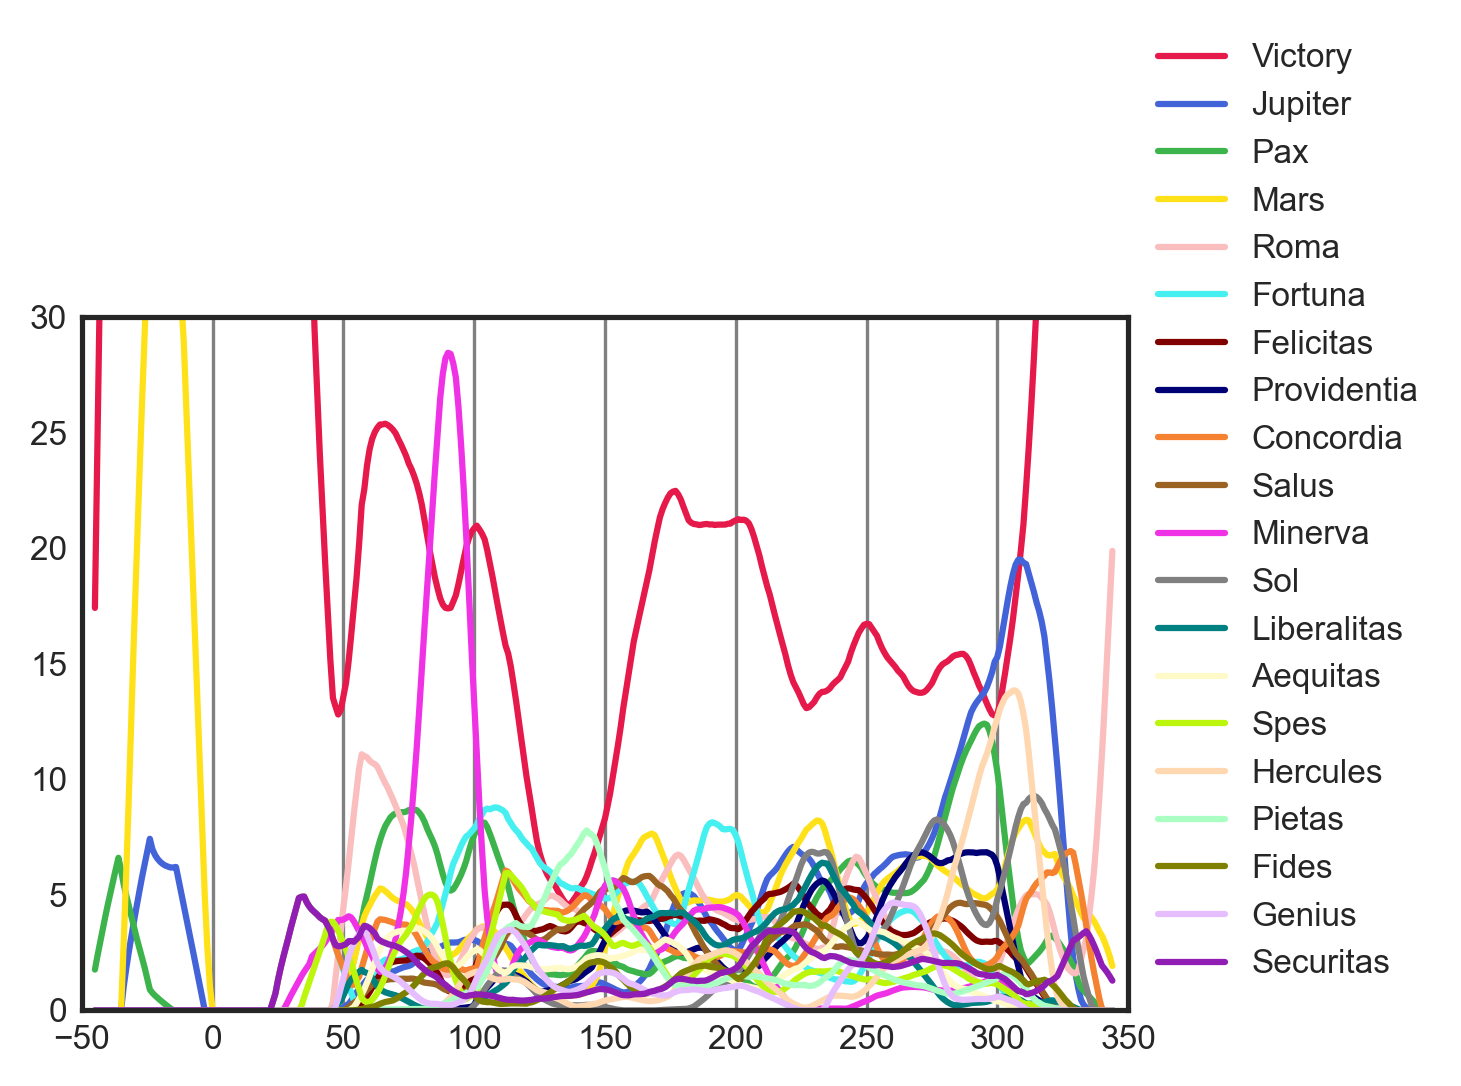

In [62]:
fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity in deities_top20:
    ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=deities_color_dict[deity], label=deity)
ax.set_xlim(-50, 350)
ax.set_ylim(0,30)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.grid(axis="x", color="grey")

In [63]:
start, stop = -50, 350
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_random"].between(date - diff, date + diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        #deities_list_flat_top20 = [d for d in deities_list_flat if d in deities_top20]
        deities_counts = nltk.FreqDist(deities_list_flat).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        #deities_counts.append(("rest", deities_count - len(deities_list_flat_top20)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n": deities_count,
                     "counts": deities_counts,
                     "freqs_pct": deities_freqs_pct}
    else:
        year_data = {"date": date,
                     "n": 0,
                     "counts": [],
                     "freqs_pct": []}
    print(year_data)
    data.append(year_data)

{'date': -50, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -49, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -48, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -47, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -46, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -45, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -44, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -43, 'n': 0, 'counts': [], 'freqs_pct': []}
{'date': -42, 'n': 2, 'counts': [('Victory', 1), ('Venus', 1)], 'freqs_pct': [('Victory', 50.0), ('Venus', 50.0)]}
{'date': -41, 'n': 9, 'counts': [('Victory', 6), ('Venus', 2), ('Pax', 1)], 'freqs_pct': [('Victory', 66.67), ('Venus', 22.22), ('Pax', 11.11)]}
{'date': -40, 'n': 12, 'counts': [('Victory', 9), ('Venus', 2), ('Pax', 1)], 'freqs_pct': [('Victory', 75.0), ('Venus', 16.67), ('Pax', 8.33)]}
{'date': -39, 'n': 15, 'counts': [('Victory', 12), ('Venus', 2), ('Pax', 1)], 'freqs_pct': [('Victory', 80.0), ('Venus', 13.33), ('Pax', 6.67)]}
{'date': -38, 'n': 16, 'cou

In [64]:
date_freqs_df = pd.DataFrame([dict([("date", el["date"])] + el["freqs_pct"]) for el in data])
date_freqs_df.set_index("date", inplace=True)
#date_freqs_df = date_freqs_df[[col for col in date_freqs_df.columns if col != "rest"] + ["rest"]]
date_freqs_df.fillna(0, inplace=True)  #,inplace=True)
date_freqs_dict = date_freqs_df.to_dict("list")  # ["column_dtypes]

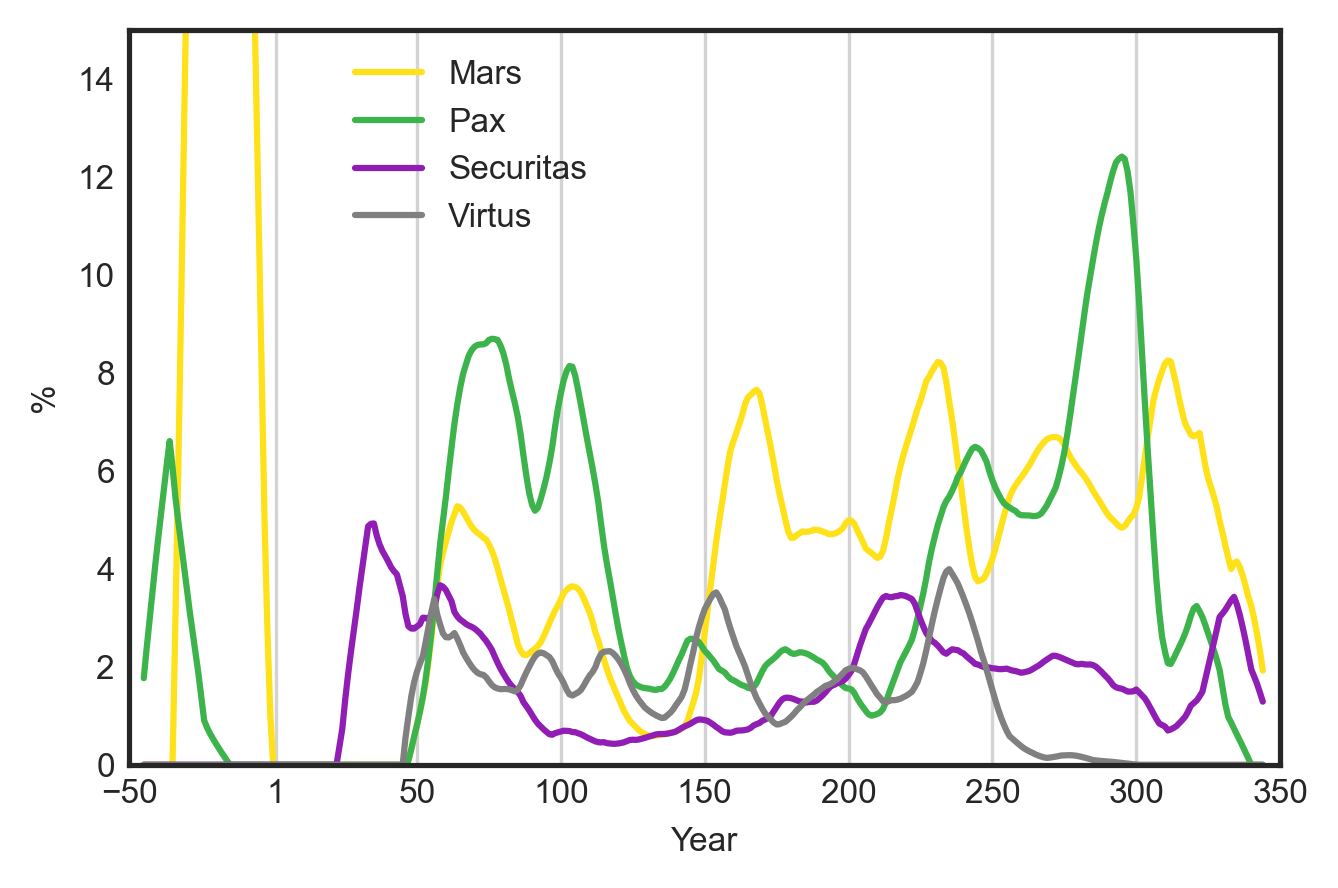

In [65]:
fig, ax = plt.subplots(tight_layout=True)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity in ["Mars", "Pax", "Securitas", "Virtus"]:
    try:
        ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=deities_color_dict[deity], label=deity)
    except:
        ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color="grey", label=deity)
ax.set_xlim(xlims)
ax.set_xticks(xticks50)
ax.set_ylim(0,15)
ax.set_ylabel("%")
ax.set_xlabel("Year")
ax.legend(loc="upper left", bbox_to_anchor=(0.17,1))
ax.grid(axis="x", color="lightgrey")

In [291]:
save_figure(fig, "freqs_martial")

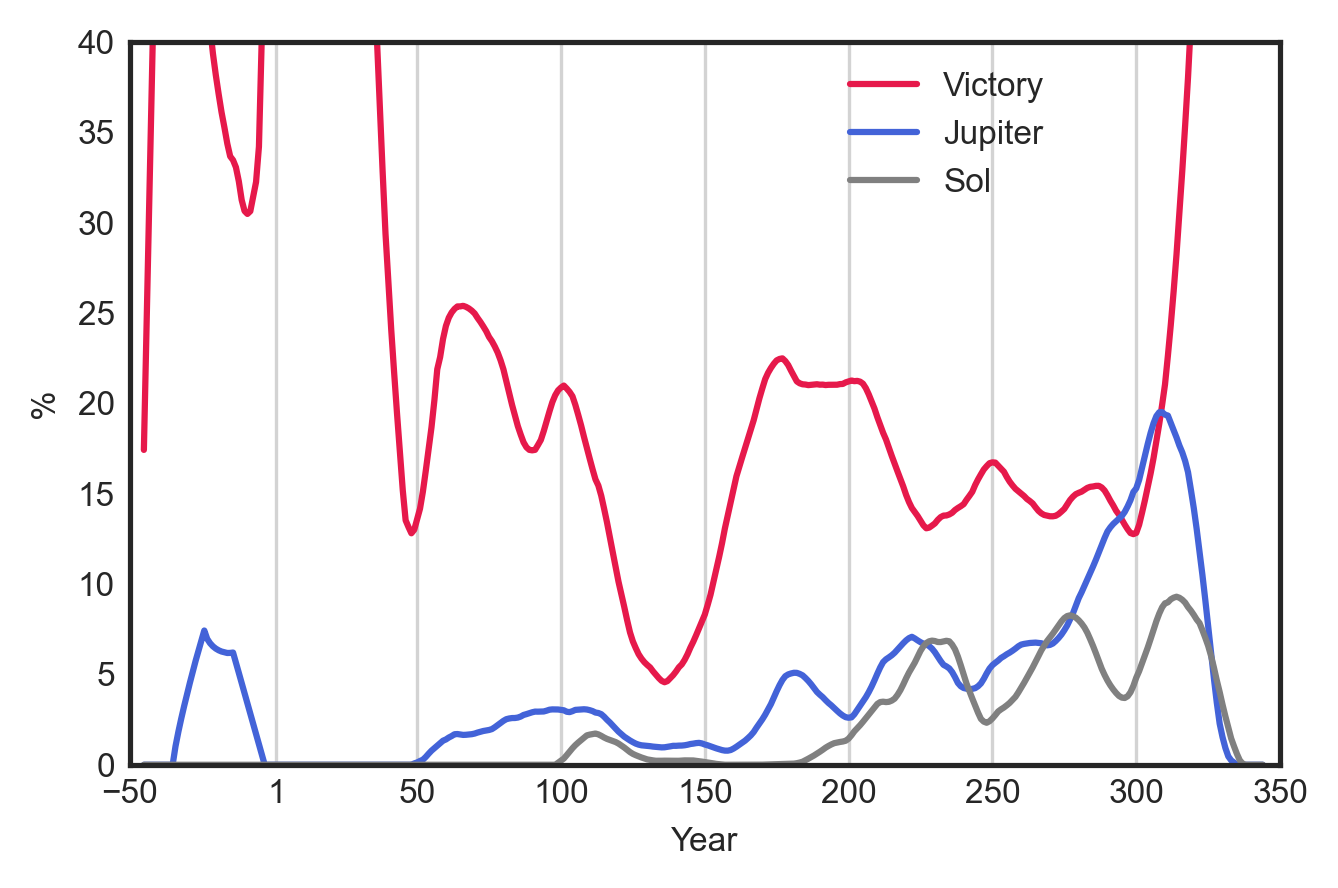

In [292]:
fig, ax = plt.subplots(tight_layout=True)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity in ["Victory", "Jupiter", "Sol"]:
    ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=deities_color_dict[deity], label=deity)
ax.set_xlim(xlims)
ax.set_xticks(xticks50)
ax.set_ylim(0,40)
ax.set_ylabel("%")
ax.set_xlabel("Year")
ax.grid(axis="x", color="lightgrey")
ax.legend(loc="upper left", bbox_to_anchor=(0.6,1))

In [293]:
save_figure(fig, "freqs_power_dominance")

In [294]:
date_freqs_df[170:190]

Victory  Venus   Pax  Mars  Jupiter  Aurora  Apollo  Diana  Pegasus  \
date                                                                        
120      9.13   0.14  2.32  1.20     1.71     0.0    0.00   0.37     1.34   
121      8.07   0.13  2.00  1.13     1.48     0.0    0.00   0.35     1.26   
122      7.34   0.16  1.69  1.13     1.29     0.0    0.00   0.32     1.17   
123      6.86   0.15  1.59  1.02     1.21     0.0    0.00   0.30     1.10   
124      6.39   0.15  1.52  0.87     1.23     0.0    0.00   0.29     1.05   
125      6.15   0.14  1.52  0.83     1.19     0.0    0.00   0.29     1.05   
126      6.87   0.24  1.66  0.69     1.28     0.0    0.00   0.28     1.00   
127      6.34   0.57  1.53  0.57     1.15     0.0    0.00   0.38     0.92   
128      6.15   0.77  1.37  0.57     1.15     0.0    0.00   0.83     0.92   
129      5.93   0.79  1.86  0.55     1.10     0.0    0.00   0.82     0.88   
130      5.85   0.86  1.71  0.58     0.98     0.0    0.09   0.83     0.89   
131      5.06   1.11  1.60  0.55     0.81     0.0    0.12   0.81     0.84   
132      4.35   1.15  1.60  0.51     0.85     0.0    0.18   0.85     0.88   
133      4.65   1.15  1.43  0.58     0.88     0.0    0.18   0.85     0.88   
134      4.70   1.16  1.43  0.64     1.04     0.0    0.18   0.85     0.88   
135      4.70   1.18  1.43  0.61     1.03     0.0    0.18   0.73     0.82   
136      4.64   1.25  1.44  0.61     1.04     0.0    0.18   0.64     0.82   
137      4.52   1.41  1.48  0.65     1.02     0.0    0.18   0.68     0.83   
138      4.24   1.51  1.45  0.70     1.00     0.0    0.18   0.67     0.82   
139      4.15   1.59  1.56  0.64     0.95     0.0    0.18   0.73     0.82   

       Pan  Sicilia  Neptune  Concordia  Securitas  Fortuna  Vesta  \
date                                                                 
120   0.00     0.09     1.39       4.36       0.56     7.37   0.97   
121   0.00     0.26     1.30       4.25       0.52     6.77   0.78   
122   0.00     0.36     1.21       4.23       0.48     6.29   0.64   
123   0.00     0.34     1.14       4.25       0.46     6.22   0.83   
124   0.00     0.33     1.05       4.21       0.44     6.64   1.02   
125   0.00     0.33     1.05       4.34       0.43     6.77   1.01   
126   0.00     0.31     1.00       4.32       0.48     6.63   0.97   
127   0.00     0.29     0.92       5.10       0.51     6.82   0.83   
128   0.03     0.29     0.92       4.27       0.61     5.58   0.96   
129   0.03     0.37     0.88       4.38       0.58     5.69   1.00   
130   0.03     0.37     0.89       4.38       0.55     5.66   1.07   
131   0.03     0.35     0.84       4.16       0.52     5.82   1.92   
132   0.03     0.36     0.82       4.14       0.60     5.83   2.00   
133   0.03     0.36     0.79       4.13       0.64     5.41   2.01   
134   0.03     0.37     0.73       4.06       0.64     5.31   2.01   
135   0.03     0.36     0.73       4.25       0.64     5.28   2.00   
136   0.03     0.37     0.70       4.25       0.64     5.32   2.02   
137   0.03     0.37     0.34       4.31       0.68     5.35   2.06   
138   0.03     0.36     0.21       4.33       0.70     5.30   2.03   
139   0.03     0.37     0.18       4.30       0.70     5.16   1.83   

      Constantia  Nemesis  Minerva  Libertas  Ceres  Spes  Virtus  Roma  \
date                                                                      
120          0.0     0.09     3.52      1.62   0.97  4.45    2.13  4.12   
121          0.0     0.09     3.30      1.52   0.82  4.34    2.00  3.86   
122          0.0     0.08     3.18      1.41   0.77  4.31    1.81  3.59   
123          0.0     0.08     3.00      1.33   0.72  4.17    1.71  3.91   
124          0.0     0.07     2.94      1.27   0.69  4.03    1.60  4.79   
125          0.0     0.04     2.93      1.27   0.69  4.05    1.48  5.07   
126          0.0     0.38     2.94      1.21   0.66  4.01    1.35  5.11   
127          0.0     0.35     2.74      1.18   0.64  5.32    1.24  5.20   
128          0.0    

In [295]:
deities_moralizing = ["Salus", "Concordia", "Justitia", "Pietas", "Pudicitia", "Clementia", "Aeternitas", "Liberalitas", "Indulgentia", "Aequitas"]

Text(0, 0.5, '%')

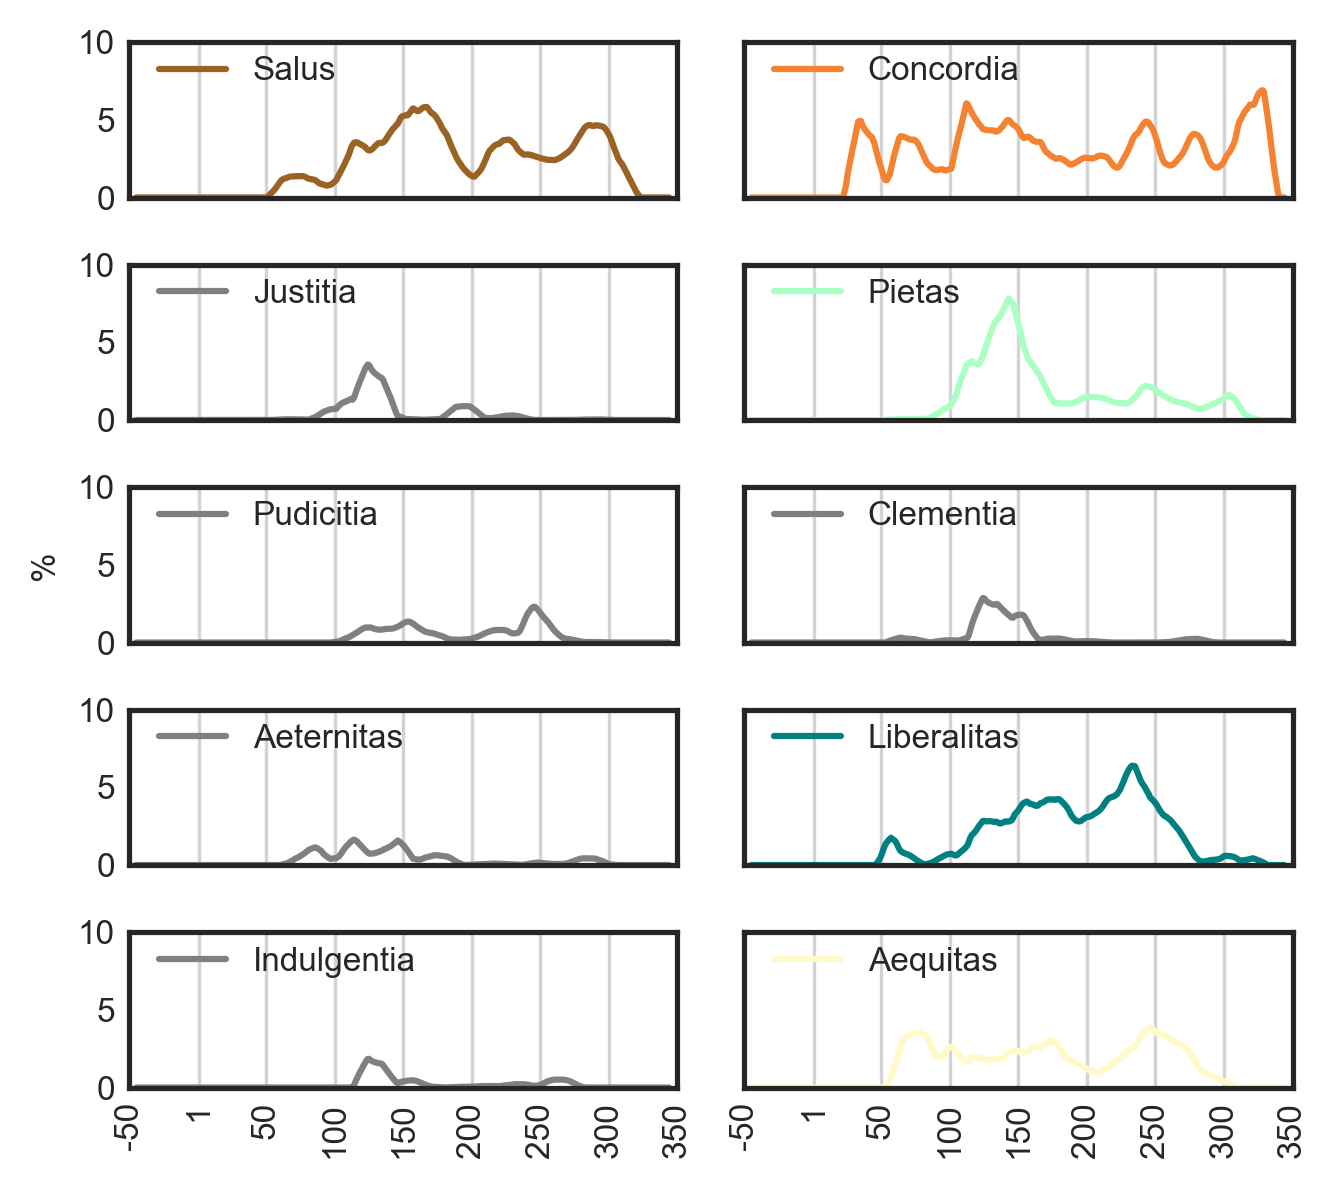

In [300]:
fig, axs = plt.subplots(5,2, figsize=(4.5, 4), tight_layout=True, dpi=300)
for deity, ax in zip (deities_moralizing, axs.ravel()):
    try:
        ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=deities_color_dict[deity], label=deity)
    except:
        ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color="grey", label=deity)
    ax.set_ylim(0,10)
    ax.set_xlim(xlims)
    ax.set_xticks(xticks50)
    ax.set_xticklabels(xticks50, rotation=90)
    ax.legend(loc="upper left", bbox_to_anchor=(0,1.1))
    #ax.set_xticks(range(0,350, 50))
    ax.grid(axis="x", color="lightgrey")

for n in range(4):
    axs[n,1].set_yticklabels([])
    axs[n, 0].set_xticklabels([])
    axs[n, 1].set_xticklabels([])
axs[4,1].set_yticklabels([])
#axs[2,1].set_xlabel("Year")
axs[2,0].set_ylabel("%")


#ax.set_ylabel("%")
#ax.set_xlabel("Year")


In [301]:
save_figure(fig, "freqs_deities_moralizing")

# Combining into overall values per groups

In [113]:
deities_martial = ["Mars", "Pax", "Securitas", "Virtus"]
deities_moralizing = ["Salus", "Concordia", "Justitia", "Pietas", "Pudicitia", "Clementia", "Aeternitas", "Liberalitas", "Indulgentia", "Aequitas"]
deities_dominant = ["Victory", "Jupiter", "Sol"]

In [68]:
date_freqs_df["martial"] = sum([date_freqs_df[deity] for deity in deities_martial])
date_freqs_df["moralizing"] = sum([date_freqs_df[deity] for deity in deities_moralizing])
date_freqs_df["dominant"] = sum([date_freqs_df[deity] for deity in deities_dominant])

In [69]:
date_freqs_df[deities_moralizing + ["moralizing"]][170:190]

Salus  Concordia  Justitia  Pietas  Pudicitia  Clementia  Aeternitas  \
date                                                                         
120    3.10       4.36      4.49    3.61       0.74       3.57        1.02   
121    2.86       4.25      4.21    3.52       1.04       3.34        0.95   
122    2.66       4.23      3.91    3.39       1.13       3.14        0.85   
123    2.62       4.25      3.68    3.45       1.14       2.96        0.80   
124    2.79       4.21      3.52    3.74       1.05       2.83        0.69   
125    2.86       4.34      3.51    3.80       1.05       2.82        0.69   
126    2.73       4.32      3.66    3.73       1.00       2.73        0.66   
127    3.41       5.10      3.38    4.59       0.92       2.52        0.61   
128    3.41       4.27      2.87    6.09       0.89       2.52        0.61   
129    3.38       4.38      2.74    6.05       0.85       2.40        0.67   
130    3.43       4.38      2.76    6.00       0.86       2.42        0.49   
131    3.34       4.16      2.62    6.75       0.73       2.33        1.08   
132    3.39       4.14      2.72    6.29       0.76       2.42        0.94   
133    3.56       4.13      2.73    6.35       0.76       2.43        0.94   
134    3.72       4.06      2.74    6.37       0.76       2.41        0.98   
135    3.70       4.25      2.73    6.34       0.82       2.40        0.97   
136    3.79       4.25      2.75    6.39       0.86       2.44        1.01   
137    3.48       4.31      2.77    6.46       0.92       2.46        1.02   
138    3.36       4.33      2.72    6.57       0.88       2.66        1.00   
139    3.39       4.30      2.62    6.81       0.88       2.96        1.01   

      Liberalitas  Indulgentia  Aequitas  moralizing  
date                                                  
120          2.92         2.32      2.04       28.17  
121          2.73         2.17      1.87       26.94  
122          2.54         2.02      1.73       25.60  
123          2.58         1.93      1.63       25.04  
124          2.79         1.85      1.56       25.03  
125          2.86         1.85      1.56       25.34  
126          3.14         1.76      1.49       25.22  
127          2.90         1.63      1.56       26.62  
128          2.87         1.63      2.07       27.23  
129          2.95         1.55      2.13       27.10  
130          2.97         1.56      2.11       26.98  
131          2.68         1.48      1.89       27.06  
132          2.63         1.54      1.81       26.64  
133          2.64         1.55      1.82       26.91  
134          2.65         1.56      1.80       27.05  
135          2.64         1.55      1.76       27.16  
136          2.72         1.56      1.65       27.42  
137          2.86         1.57      1.54       27.39  
138          2.94         1.54      1.79       27.79  
139          2.93         1.43      1.77       28.10

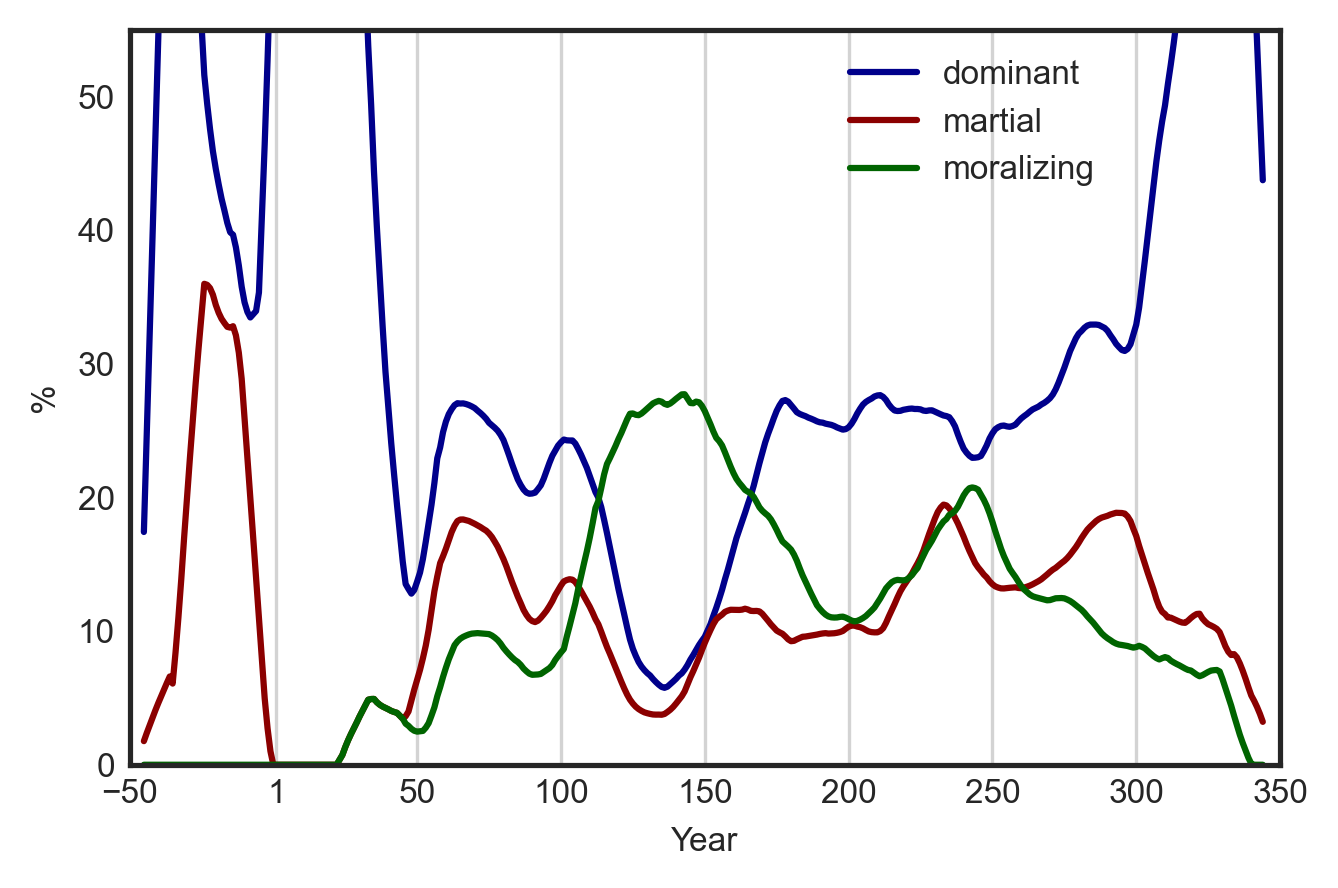

In [70]:
fig, ax = plt.subplots(tight_layout=True)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(["dominant", "martial", "moralizing"], ["darkblue", "darkred", "darkgreen"]):
    ax.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax.set_xlim(xlims)
ax.set_xticks(xticks50)
ax.set_ylim(0,55)
ax.set_ylabel("%")
ax.set_xlabel("Year")
ax.legend(loc="upper left", bbox_to_anchor=(0.6,1))
ax.grid(axis="x", color="lightgrey")

In [306]:
save_figure(fig, "freqs_deities_groups")

# Densities vs percentages

In [201]:
def check_deity(deities_list, deity):
    if deity in deities_list:
        return True
    else:
        return False

<AxesSubplot: xlabel='date_random', ylabel='Density'>

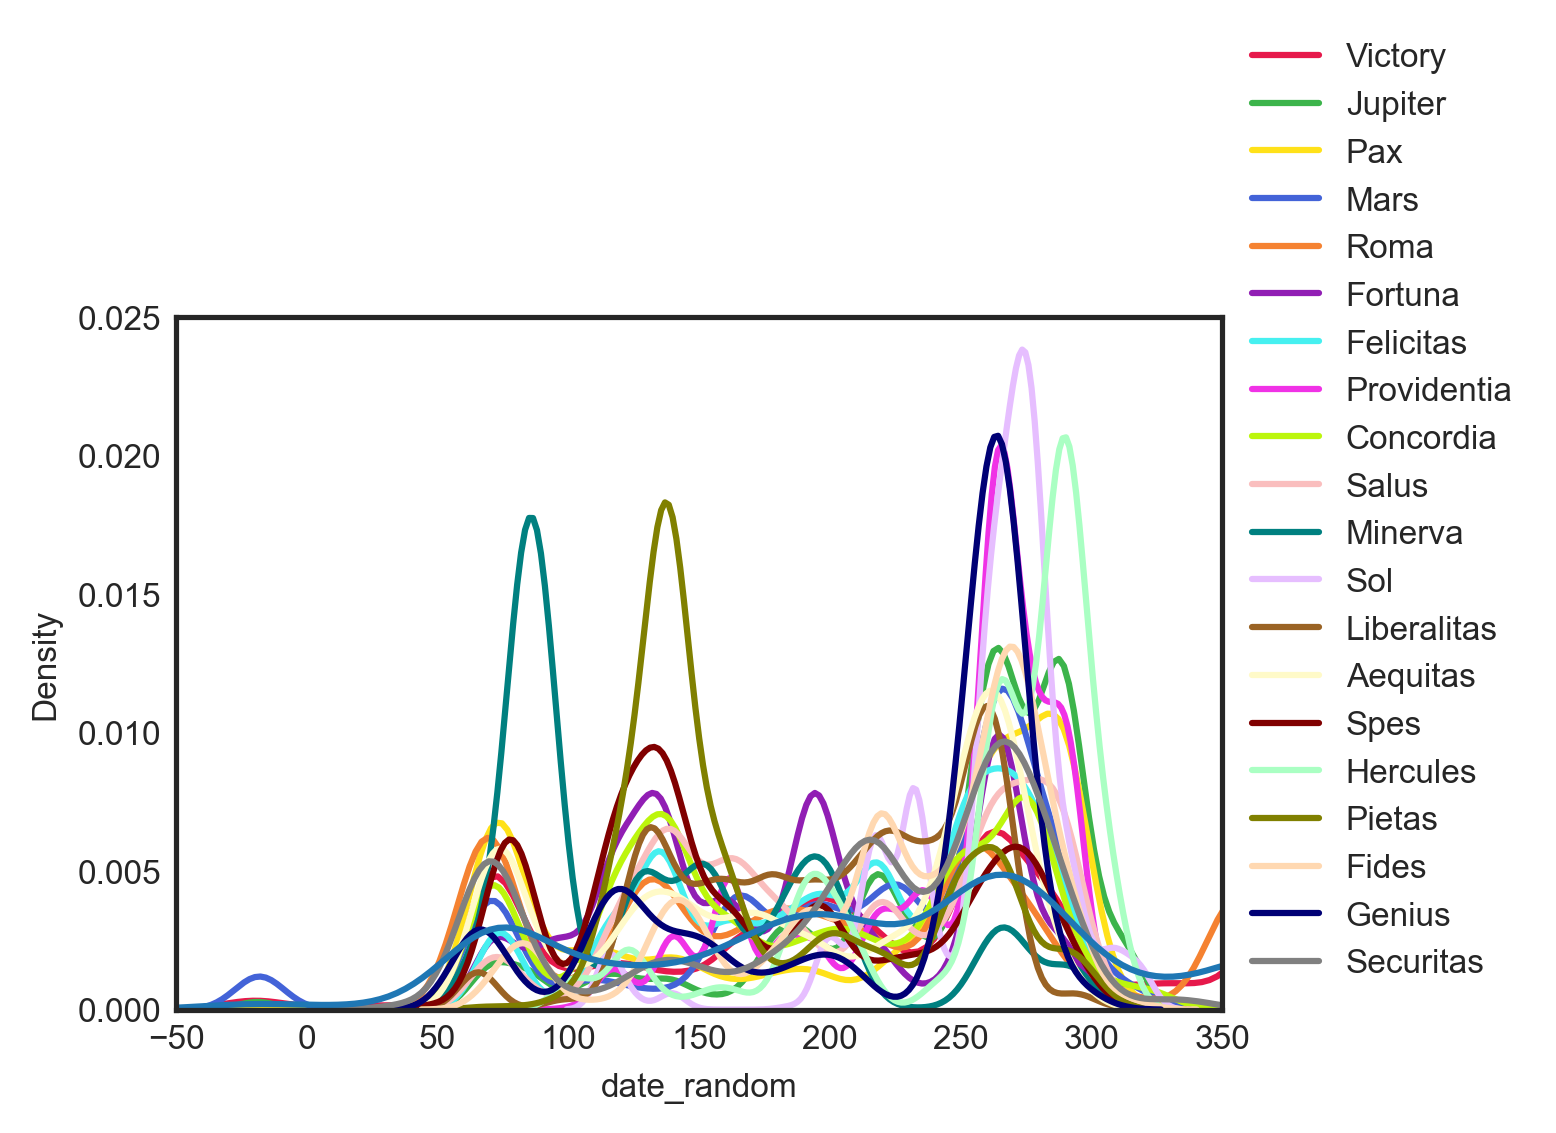

In [202]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_top20, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_random"], color=color, label=deity, bw_adjust=0.5)
ax.set_xlim(-50, 350)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, "Victory"))]["date_random"])

In [203]:
deities_select = ["Mars", "Pax", "Securitas", "Aequitas", "Felicitas", "Salus", "Fortuna", "Spes", "Pietas"]

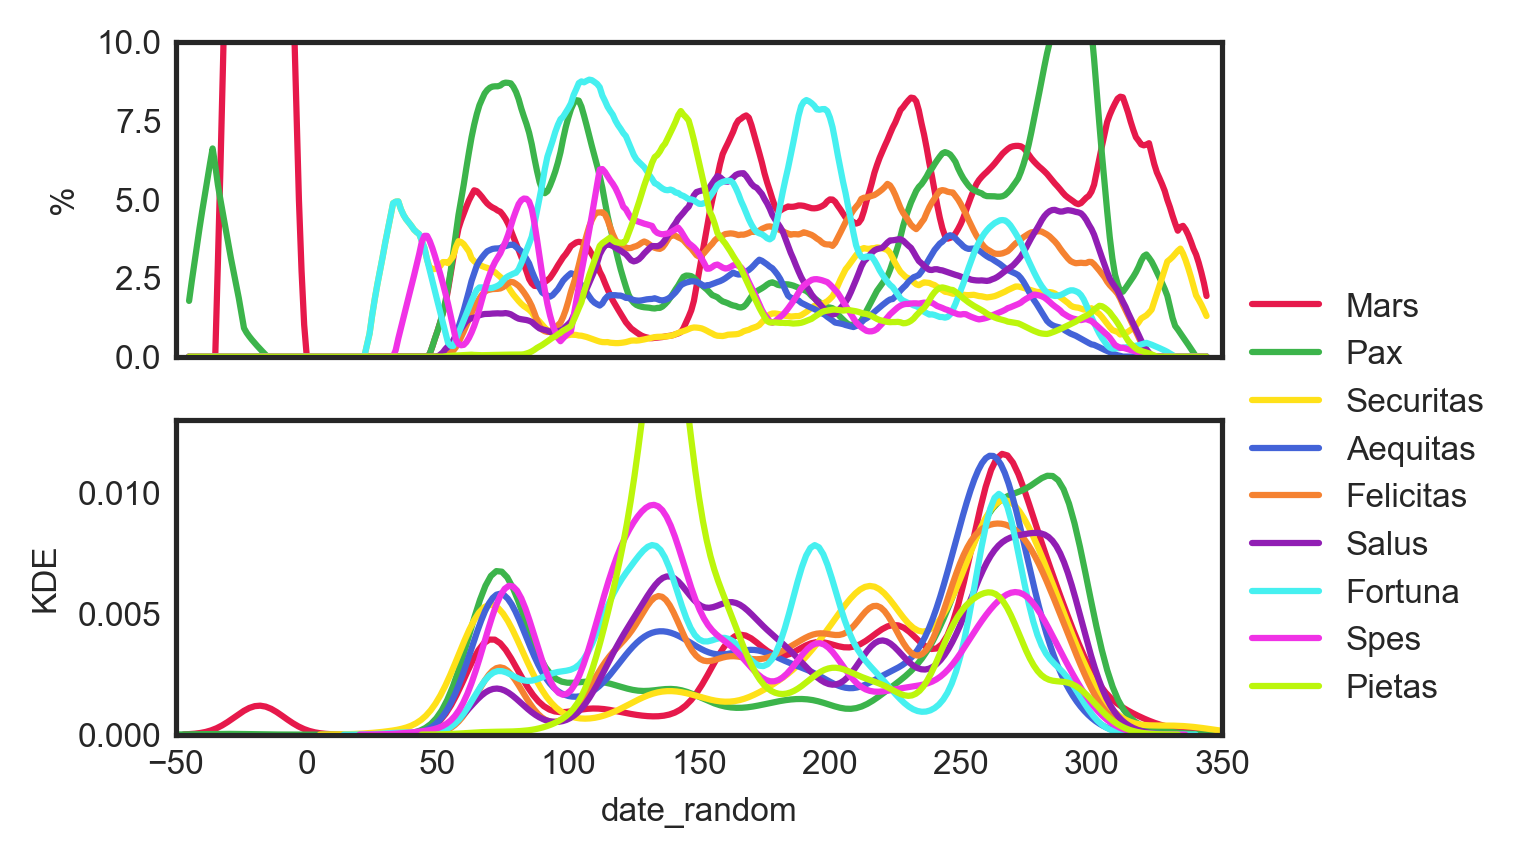

In [204]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, [ax1, ax2] = plt.subplots(2,1)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax1.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax1.set_xlim(-50, 350)
ax1.set_ylim(0,10)
ax1.set_ylabel("%")
ax1.set_xticklabels([])
#ax1.legend(loc="lower left", bbox_to_anchor=(1,0))

for deity, color in zip(deities_select, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_random"], color=color, label=deity, bw_adjust=0.5, ax=ax2)
ax2.set_xlim(-50, 350)
ax2.set_ylim(0, 0.013)
ax2.set_ylabel("KDE")
ax2.legend(loc="lower left", bbox_to_anchor=(1,0))

# Epigraphic

In [79]:
# experiments with LIRE https://zenodo.org/record/7577788/files/LIRE_v2-1.parquet?download=1
try:
    !mkdir ../data/large_data
    #!curl -o ../data/large_data/LIRE_v2-1.parquet https://zenodo.org/record/7577788/files/LIRE_v2-1.parquet?download=1
except:
    pass
LIRE = gpd.read_parquet("../data/large_data/LIRE_v2-2.parquet")

mkdir: ../data/large_data: File exists


In [80]:
len(LIRE)

182852

In [81]:
%%time
LIRE["random_dates"] = LIRE.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], 100), axis=1)

CPU times: user 44 s, sys: 874 ms, total: 44.9 s
Wall time: 46.4 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


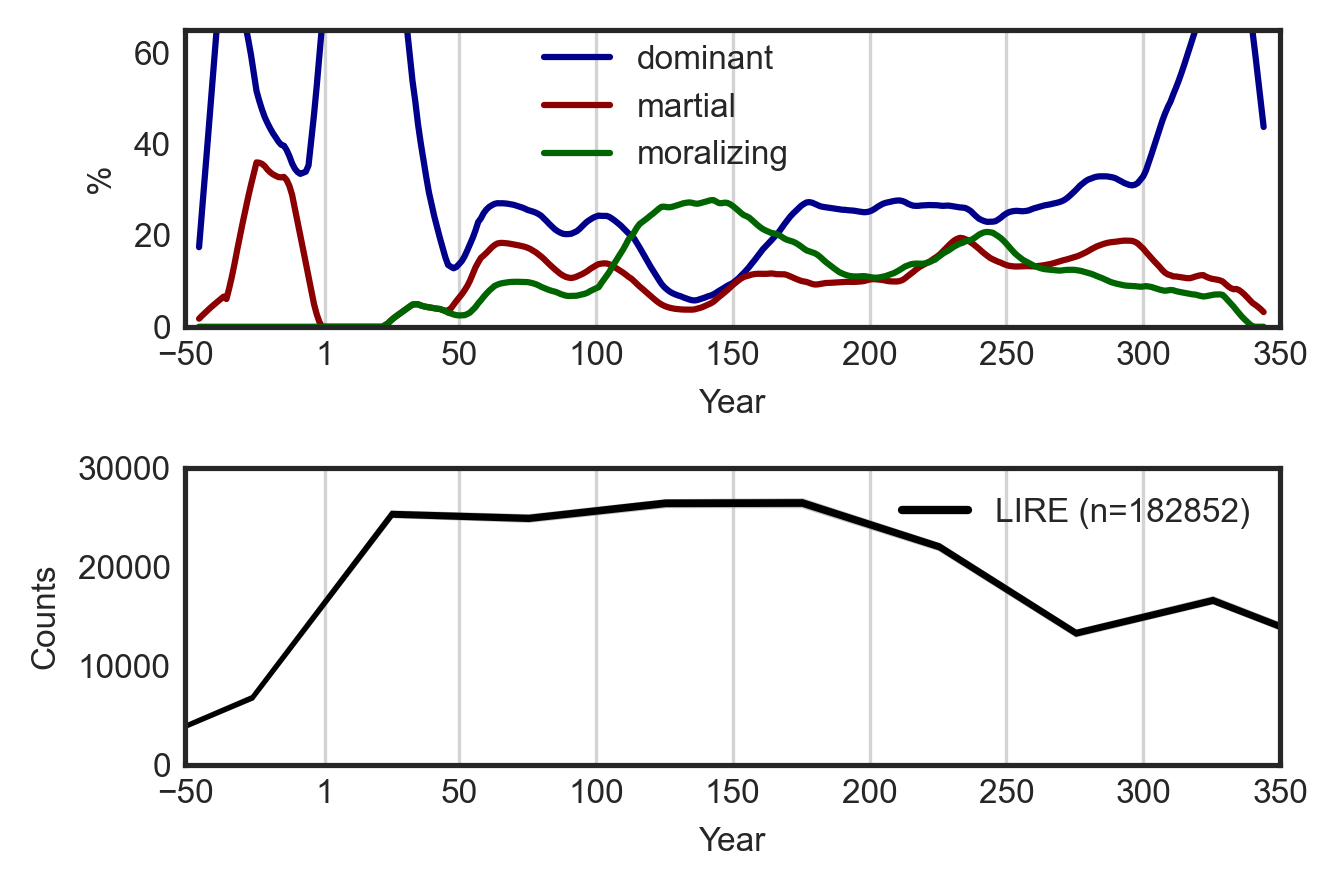

In [98]:
fig, [ax1, ax2] = plt.subplots(2,1, tight_layout=True)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(["dominant", "martial", "moralizing"], ["darkblue", "darkred", "darkgreen"]):
    ax1.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax1.set_xlim(xlims)
ax1.set_xticks(xticks50)
ax1.set_ylim(0,65)
ax1.set_ylabel("%")
ax1.set_xlabel("Year")
ax1.legend(loc="upper left", bbox_to_anchor=(0.3,1.05))
ax1.grid(axis="x", color="lightgrey")

tempun.timeblocksplot_from_randoms(LIRE["random_dates"], ax=ax2)
ax2.set_xlim(xlims)
ax2.set_ylim(0,30000)
ax2.set_xticks(xticks50)
ax2.set_ylabel("Counts")
ax2.set_xlabel("Year")
ax2.legend(loc="upper left", bbox_to_anchor=(0.2,1))
marker = [plt.Line2D([0, 0], [0, 0], color="black", lw=2)]
label = ["LIRE (n={})".format(str(len(LIRE)))]

ax2.legend(marker, label, numpoints=1) # , bbox_to_anchor=(1, 1.2), loc='upper left')
ax2.grid(axis="x", color="lightgrey")

In [99]:
save_figure(fig, "freqs_groups_vs_lire_timeblocks")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


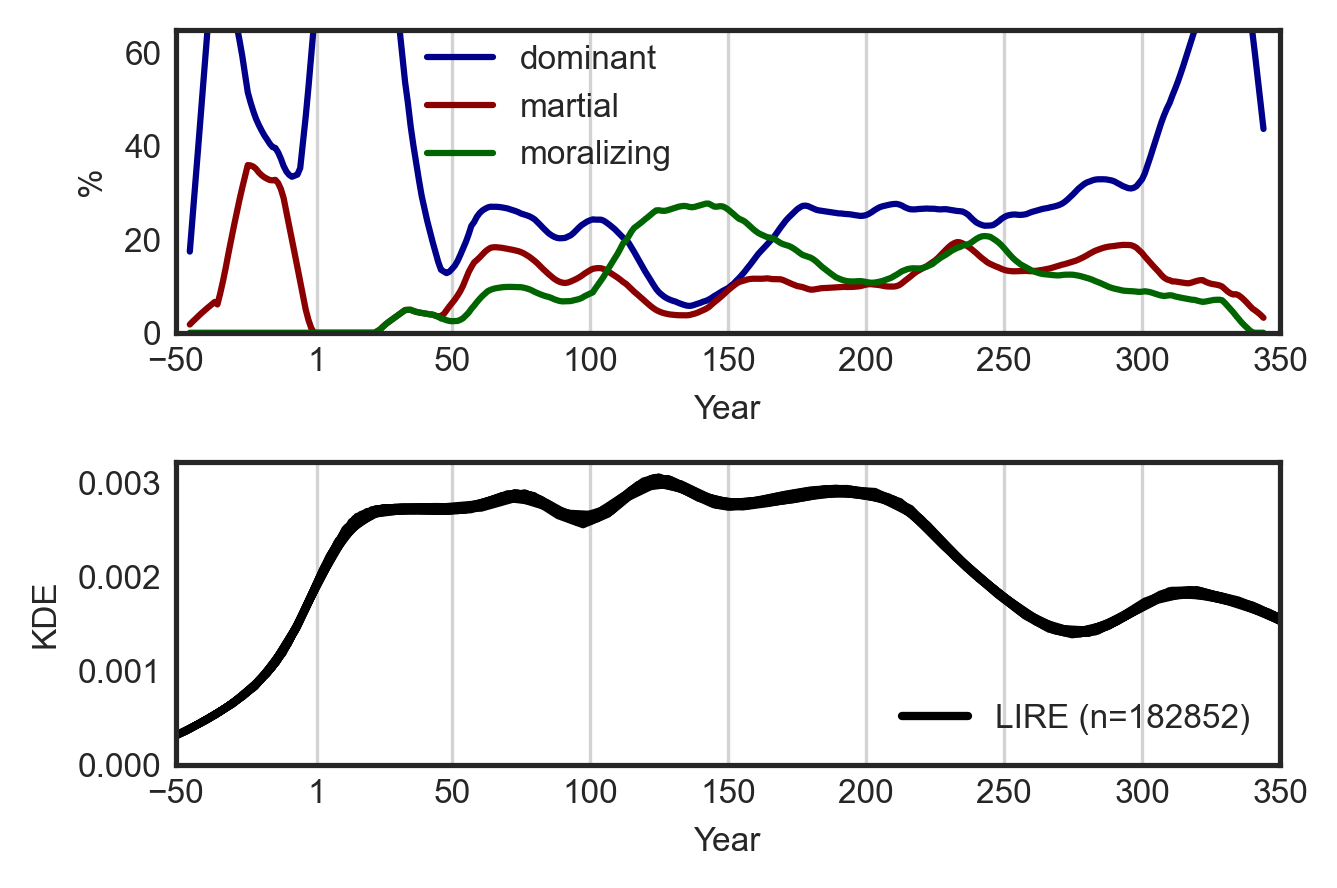

In [104]:
fig, [ax1, ax2] = plt.subplots(2,1, tight_layout=True)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(["dominant", "martial", "moralizing"], ["darkblue", "darkred", "darkgreen"]):
    ax1.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax1.set_xlim(xlims)
ax1.set_xticks(xticks50)
ax1.set_ylim(0,65)
ax1.set_ylabel("%")
ax1.set_xlabel("Year")
ax1.legend(loc="upper left", bbox_to_anchor=(0.2,1.05))
ax1.grid(axis="x", color="lightgrey")

tempun.kdeplot_from_randoms(LIRE["random_dates"].apply(lambda x: x[:100]), ax=ax2)
ax2.set_xlim(xlims)
ax2.set_xticks(xticks50)
ax2.set_ylabel("KDE")
ax2.set_xlabel("Year")
ax2.legend(loc="upper left", bbox_to_anchor=(0.2,1))
marker = [plt.Line2D([0, 0], [0, 0], color="black", lw=2)]
label = ["LIRE (n={})".format(str(len(LIRE)))]

ax2.legend(marker, label, numpoints=1) # , bbox_to_anchor=(1, 1.2), loc='upper left')
ax2.grid(axis="x", color="lightgrey")

In [107]:
save_figure(fig, "freqs_groups_vs_lire_kde")

# Epigraphy vs groups correlation

In [249]:
date_freqs_df = pd.DataFrame([dict([("date", el["date"])] + el["freqs_pct"]) for el in data])
date_freqs_df.set_index("date", inplace=True)
#date_freqs_df = date_freqs_df[[col for col in date_freqs_df.columns if col != "rest"] + ["rest"]]
date_freqs_df.fillna(0, inplace=True)  #,inplace=True)
date_freqs_dict = date_freqs_df.to_dict("list")  # ["column_dtypes]

In [250]:
deities_martial = ["Mars", "Pax", "Securitas", "Virtus"]
deities_moralizing = ["Salus", "Concordia", "Justitia", "Pietas", "Pudicitia", "Clementia", "Aeternitas", "Liberalitas",
                      "Indulgentia", "Aequitas"]
deities_dominant = ["Victory", "Jupiter", "Sol"]
date_freqs_df["martial"] = sum([date_freqs_df[deity] for deity in deities_martial])
date_freqs_df["moralizing"] = sum([date_freqs_df[deity] for deity in deities_moralizing])
date_freqs_df["dominant"] = sum([date_freqs_df[deity] for deity in deities_dominant])

date_freqs_df = date_freqs_df[["moralizing", "martial", "dominant"]]

In [251]:
simvars = tempun.get_simulation_variants(LIRE["random_dates"])

In [253]:
for n in range(len(simvars)):
    date_freqs_df["liresim_{}".format(str(n))] =  dict(Counter(simvars[n]))
date_freqs_df = date_freqs_df.copy()

In [254]:
date_freqs_df_rolling = date_freqs_df.rolling(11, center=True).mean().round(4)

In [255]:
date_freqs_df_rolling.head(20)

moralizing  martial  dominant  liresim_0  liresim_1  liresim_2  \
date                                                                   
-50          NaN      NaN       NaN        NaN        NaN        NaN   
-49          NaN      NaN       NaN        NaN        NaN        NaN   
-48          NaN      NaN       NaN        NaN        NaN        NaN   
-47          NaN      NaN       NaN        NaN        NaN        NaN   
-46          NaN      NaN       NaN        NaN        NaN        NaN   
-45          0.0   1.7673   17.4245    83.3636    85.5455    84.4545   
-44          0.0   2.3736   24.6973    84.1818    86.6364    84.6364   
-43          0.0   2.9418   32.0836    84.5455    87.8182    85.6364   
-42          0.0   3.5100   39.4700    84.4545    89.0000    84.8182   
-41          0.0   4.0782   46.8564    85.4545    90.6364    86.5455   
-40          0.0   4.6127   54.3427    86.9091    89.9091    86.0909   
-39          0.0   5.1182   61.9182    85.7273    88.8182    85.5455   
-38          0.0   5.6236   69.4936    86.2727    91.6364    85.0000   
-37          0.0   6.1291   77.0691    86.9091    90.8182    84.6364   
-36          0.0   6.6073   80.1791    86.5455    89.4545    83.8182   
-35          0.0   6.0755   81.7736    86.2727    87.4545    82.3636   
-34          0.0   8.3973   80.6736    87.1818    86.1818    81.8182   
-33          0.0  11.0136   78.9245    93.0000    89.0000    86.7273   
-32          0.0  13.8936   76.8673    98.6364    93.5455    92.5455   
-31          0.0  17.0400   74.4664   105.6364   100.5455   100.8182   

      liresim_3  liresim_4  liresim_5  liresim_6  liresim_7  liresim_8  \
date                                                                     
-50         NaN        NaN        NaN        NaN        NaN        NaN   
-49         NaN        NaN        NaN        NaN        NaN        NaN   
-48         NaN        NaN        NaN        NaN        NaN        NaN   
-47         NaN        NaN        NaN        NaN        NaN        NaN   
-46         NaN        NaN        NaN        NaN        NaN        NaN   
-45     87.4545    86.7273    83.7273    81.7273    82.5455    88.9091   
-44     90.0000    87.5455    86.0909    84.4545    84.2727    90.4545   
-43     89.0909    86.4545    86.4545    84.7273    85.4545    89.7273   
-42     90.3636    87.4545    87.6364    83.1818    85.2727    90.7273   
-41     89.8182    89.4545    87.5455    84.2727    86.8182    91.7273   
-40     87.7273    86.8182    84.6364    82.3636    86.5455    91.0000   
-39     89.5455    86.9091    84.5455    81.3636    88.0909    89.2727   
-38     89.8182    87.0000    85.8182    83.0909    88.8182    88.9091   
-37     89.4545    86.9091    87.6364    83.0909    87.4545    87.7273   
-36     88.4545    84.1818    85.5455    84.0000    84.9091    85.0909   
-35     85.8182    82.7273    82.9091    83.1818    82.4545    82.3636   
-34     85.6364    81.6364    84.0909    86.0000    81.3636    80.7273   
-33     88.5455    87.2727    88.2727    91.5455    86.7273    85.4545   
-32     95.7273    92.9091    96.4545    98.0000    93.7273    91.2727   
-31    101.6364   100.3636   102.4545   103.7273    99.5455    95.3636   

      liresim_9  liresim_10  liresim_11  liresim_12  liresim_13  liresim_14  \
date                                                                          
-50         NaN         NaN         NaN         NaN         NaN         NaN   
-49         NaN         NaN         NaN         NaN         NaN         NaN   
-48         NaN         NaN         NaN         NaN         NaN         NaN   
-47         NaN         NaN         NaN         NaN         NaN         NaN   
-46         NaN         NaN         NaN         NaN         NaN         NaN   
-45     88.8182     82.9091     85.0909     84.6364     83.0000     87.0909   
-44     89.6364     85.5455     86.6364     86.8182     85.9091     88.0909   
-43     90.5455     86.0000     86.3636     86.9091     86.0000     88.4545   
-4

In [257]:
date_freqs_df_rolling[["moralizing", "martial", "dominant", "liresim_0"]].corr()

moralizing   martial  dominant  liresim_0
moralizing    1.000000 -0.046458 -0.693280   0.454953
martial      -0.046458  1.000000 -0.234975  -0.444990
dominant     -0.693280 -0.234975  1.000000  -0.302385
liresim_0     0.454953 -0.444990 -0.302385   1.000000

In [266]:
date_freqs_df_rolling[["moralizing", "martial", "dominant", "liresim_0"]].loc[100:250].corr()

moralizing   martial  dominant  liresim_0
moralizing    1.000000 -0.474337 -0.892973   0.108403
martial      -0.474337  1.000000  0.701182  -0.704010
dominant     -0.892973  0.701182  1.000000  -0.304743
liresim_0     0.108403 -0.704010 -0.304743   1.000000

In [267]:
date_freqs_df_pctchange = date_freqs_df_rolling.pct_change().round(4)

In [268]:
date_freqs_df_pctchange.head(20)

moralizing  martial  dominant  liresim_0  liresim_1  liresim_2  \
date                                                                   
-50          NaN      NaN       NaN        NaN        NaN        NaN   
-49          NaN      NaN       NaN        NaN        NaN        NaN   
-48          NaN      NaN       NaN        NaN        NaN        NaN   
-47          NaN      NaN       NaN        NaN        NaN        NaN   
-46          NaN      NaN       NaN        NaN        NaN        NaN   
-45          NaN      NaN       NaN        NaN        NaN        NaN   
-44          NaN   0.3431    0.4174     0.0098     0.0128     0.0022   
-43          NaN   0.2394    0.2991     0.0043     0.0136     0.0118   
-42          NaN   0.1931    0.2302    -0.0011     0.0135    -0.0096   
-41          NaN   0.1619    0.1871     0.0118     0.0184     0.0204   
-40          NaN   0.1311    0.1598     0.0170    -0.0080    -0.0053   
-39          NaN   0.1096    0.1394    -0.0136    -0.0121    -0.0063   
-38          NaN   0.0987    0.1223     0.0064     0.0317    -0.0064   
-37          NaN   0.0899    0.1090     0.0074    -0.0089    -0.0043   
-36          NaN   0.0780    0.0404    -0.0042    -0.0150    -0.0097   
-35          NaN  -0.0805    0.0199    -0.0032    -0.0224    -0.0174   
-34          NaN   0.3822   -0.0135     0.0105    -0.0146    -0.0066   
-33          NaN   0.3116   -0.0217     0.0667     0.0327     0.0600   
-32          NaN   0.2615   -0.0261     0.0606     0.0511     0.0671   
-31          NaN   0.2265   -0.0312     0.0710     0.0748     0.0894   

      liresim_3  liresim_4  liresim_5  liresim_6  liresim_7  liresim_8  \
date                                                                     
-50         NaN        NaN        NaN        NaN        NaN        NaN   
-49         NaN        NaN        NaN        NaN        NaN        NaN   
-48         NaN        NaN        NaN        NaN        NaN        NaN   
-47         NaN        NaN        NaN        NaN        NaN        NaN   
-46         NaN        NaN        NaN        NaN        NaN        NaN   
-45         NaN        NaN        NaN        NaN        NaN        NaN   
-44      0.0291     0.0094     0.0282     0.0334     0.0209     0.0174   
-43     -0.0101    -0.0125     0.0042     0.0032     0.0140    -0.0080   
-42      0.0143     0.0116     0.0137    -0.0182    -0.0021     0.0111   
-41     -0.0060     0.0229    -0.0010     0.0131     0.0181     0.0110   
-40     -0.0233    -0.0295    -0.0332    -0.0227    -0.0031    -0.0079   
-39      0.0207     0.0010    -0.0011    -0.0121     0.0179    -0.0190   
-38      0.0030     0.0010     0.0151     0.0212     0.0083    -0.0041   
-37     -0.0040    -0.0010     0.0212     0.0000    -0.0154    -0.0133   
-36     -0.0112    -0.0314    -0.0239     0.0109    -0.0291    -0.0301   
-35     -0.0298    -0.0173    -0.0308    -0.0097    -0.0289    -0.0321   
-34     -0.0021    -0.0132     0.0143     0.0339    -0.0132    -0.0199   
-33      0.0340     0.0690     0.0497     0.0645     0.0659     0.0586   
-32      0.0811     0.0646     0.0927     0.0705     0.0807     0.0681   
-31      0.0617     0.0802     0.0622     0.0584     0.0621     0.0448   

      liresim_9  liresim_10  liresim_11  liresim_12  liresim_13  liresim_14  \
date                                                                          
-50         NaN         NaN         NaN         NaN         NaN         NaN   
-49         NaN         NaN         NaN         NaN         NaN         NaN   
-48         NaN         NaN         NaN         NaN         NaN         NaN   
-47         NaN         NaN         NaN         NaN         NaN         NaN   
-46         NaN         NaN         NaN         NaN         NaN         NaN   
-45         NaN         NaN         NaN         NaN         NaN         NaN   
-44      0.0092      0.0318      0.0182      0.0258      0.0350      0.0115   
-43      0.0101      0.0053     -0.0031      0.0010      0.0011      0.0041   
-4

In [278]:
date_freqs_df_pctchange[["moralizing", "martial", "dominant", "liresim_0"]].corr()

moralizing   martial  dominant  liresim_0
moralizing    1.000000  0.696586  0.090401  -0.007422
martial       0.696586  1.000000  0.030258  -0.209725
dominant      0.090401  0.030258  1.000000   0.102115
liresim_0    -0.007422 -0.209725  0.102115   1.000000

In [274]:
date_freqs_df_pctchange["moralizing"].shift(100)

date
-50        NaN
-49        NaN
-48        NaN
-47        NaN
-46        NaN
         ...  
 345   -0.0055
 346   -0.0181
 347   -0.0191
 348   -0.0231
 349   -0.0288
Name: moralizing, Length: 400, dtype: float64

In [282]:
date_freqs_df_pctchange[group].shift(lag)[50:250]

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_42546/3947803933.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  date_freqs_df_pctchange[group].shift(lag)[50:250]


date
0      0.0341
1      0.0303
2      0.1046
3      0.0853
4      0.0822
        ...  
195   -0.0035
196   -0.0047
197   -0.0039
198   -0.0074
199   -0.0063
Name: moralizing, Length: 200, dtype: float64

In [283]:
date_freqs_df_pctchange["liresim_{}".format(str(n))].loc[50:250]

date
50    -0.0073
51    -0.0114
52    -0.0119
53    -0.0126
54    -0.0141
        ...  
246   -0.0161
247   -0.0218
248   -0.0135
249   -0.0110
250   -0.0190
Name: liresim_99, Length: 201, dtype: float64

In [294]:
lag_means = {}
lags = range(-100,101)
for group in ["moralizing", "martial", "dominant"]:
    group_lags = []
    for lag in lags:
        corrs = [np.corrcoef(date_freqs_df_pctchange[group].shift(lag).loc[50:250], date_freqs_df_pctchange["liresim_{}".format(str(n))].loc[50:250])[0,1] for n in range(len(simvars))]
        group_lags.append(np.mean(corrs))
    lag_means[group] = group_lags

/Users/kasev/Projects/coins/coins_venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


[Text(0, 0, '-100'),
 Text(10, 0, '-90'),
 Text(20, 0, '-80'),
 Text(30, 0, '-70'),
 Text(40, 0, '-60'),
 Text(50, 0, '-50'),
 Text(60, 0, '-40'),
 Text(70, 0, '-30'),
 Text(80, 0, '-20'),
 Text(90, 0, '-10'),
 Text(100, 0, '0'),
 Text(110, 0, '10'),
 Text(120, 0, '20'),
 Text(130, 0, '30'),
 Text(140, 0, '40'),
 Text(150, 0, '50'),
 Text(160, 0, '60'),
 Text(170, 0, '70'),
 Text(180, 0, '80'),
 Text(190, 0, '90')]

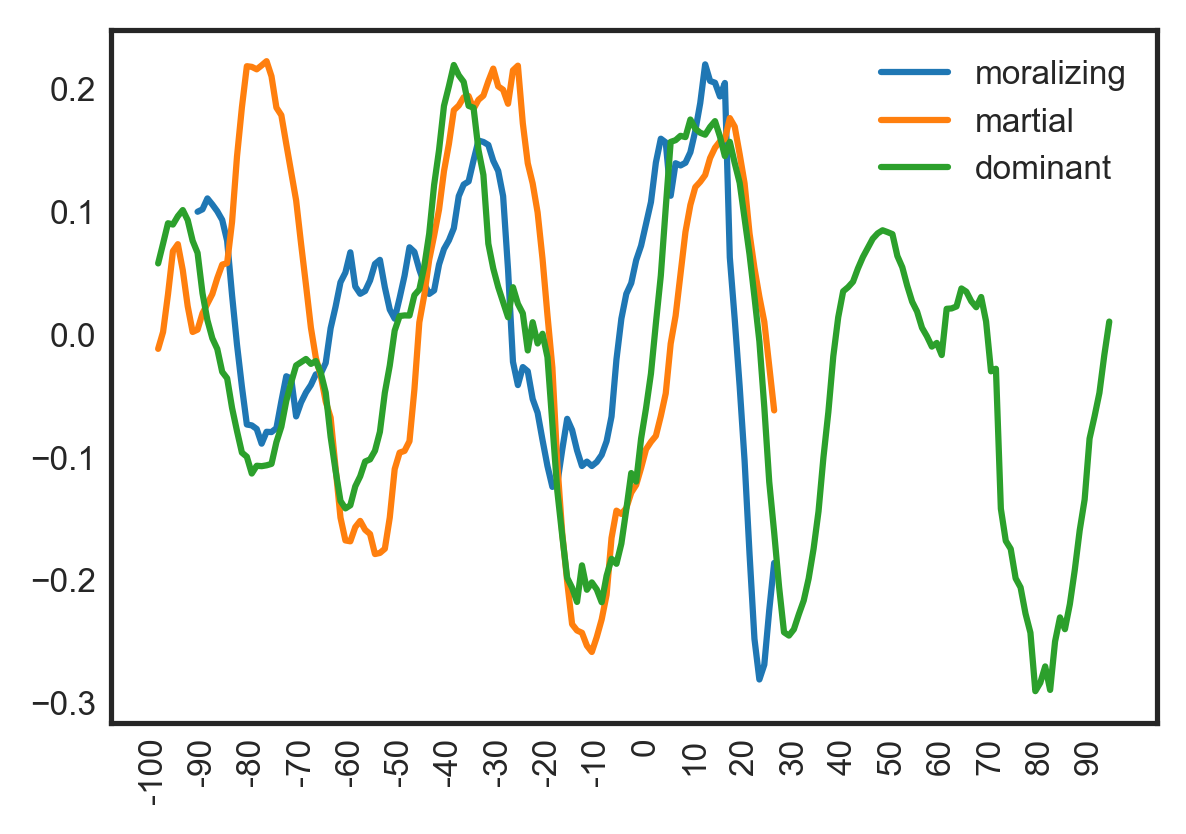

In [296]:
fig, ax = plt.subplots()
pd.DataFrame(lag_means).plot(ax=ax)
ax.set_xticks(range(0,200,10))
ax.set_xticklabels([str(n) for n in range(-100,100,10)], rotation=90)


In [213]:
groups_sims_df_pctchange["moralizing"].shift(3).loc[100:250]

date
100    0.0510
101    0.0390
102    0.0467
103    0.0679
104    0.1019
        ...  
246    0.0458
247    0.0500
248    0.0505
249    0.0481
250    0.0505
Name: moralizing, Length: 151, dtype: float64

In [214]:
groups_sims_df_pctchange[["moralizing", "martial", "dominant", "liresim_0"]].loc[100:250].corr()

moralizing   martial  dominant  liresim_0
moralizing    1.000000  0.164704  0.101878   0.217599
martial       0.164704  1.000000  0.532878  -0.059599
dominant      0.101878  0.532878  1.000000   0.142966
liresim_0     0.217599 -0.059599  0.142966   1.000000

In [215]:
lags = range(-100,100)
for lag in lags:
    corrs = [np.corrcoef(groups_sims_df_pctchange["moralizing"].shift(lag).loc[100:250], groups_sims_df_pctchange["liresim_{}".format(str(n))].loc[100:250])[0,1] for n in range(len(simvars))]
    print(lag , np.mean(corrs)) #.shift(0))

-100 nan
-99 nan
-98 nan
-97 nan
-96 nan
-95 nan
-94 nan
-93 nan
-92 nan
-91 nan
-90 nan
-89 0.3152121118606954
-88 0.3194024100212057
-87 0.32604672876955193
-86 0.3336880578411101
-85 0.3314537682424792
-84 0.31507554274158206
-83 0.3044439150943257
-82 0.3008577645230017
-81 0.30820623002125463
-80 0.32636408845338266
-79 0.3269185755279148
-78 0.32667610150158566
-77 0.3196254507064438
-76 0.30422183540949077
-75 0.2996101993300282
-74 0.29415210195433816
-73 0.2958500543525283
-72 0.2978559059026839
-71 0.2869129082743029
-70 0.27859248810446435
-69 0.2639613667950075
-68 0.257891373191934
-67 0.2626201661945051
-66 0.263288595644057
-65 0.26245618328140874
-64 0.27805624999325235
-63 0.2887410457662753
-62 0.2923723620604856
-61 0.2891589464449287
-60 0.27768665545606924
-59 0.2512069424969761
-58 0.2396292101821626
-57 0.22470295192502807
-56 0.2151380848940937
-55 0.22009325018186762
-54 0.21007158383792493
-53 0.19628404468572078
-52 0.18272527654851214
-51 0.16978511950033617

/Users/kasev/Projects/coins/coins_venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [228]:
lags = range(-100,100)
for lag in lags:
    corrs = [np.corrcoef(groups_sims_df["moralizing"].shift(lag).loc[100:250].tolist(), groups_sims_df["liresim_{}".format(str(n))].loc[100:250].tolist())[0,1] for n in range(len(simvars))]
    print(lag , np.mean(corrs)) #.shift(0))

-100 nan
-99 0.202198471594207
-98 0.20927137070802715
-97 0.2177738517669319
-96 0.22298820419566706
-95 0.23075275540843276
-94 0.23493899744093505
-93 0.2351262489717583
-92 0.23967772128802042
-91 0.24447019425535077
-90 0.25009924394440364
-89 0.25746843570708344
-88 0.2583177186555957
-87 0.25994908168552516
-86 0.26301873942932014
-85 0.26390779007869314
-84 0.26042179240251445
-83 0.2608981618768205
-82 0.2677956511517495
-81 0.2759038584880307
-80 0.28936526894939324
-79 0.2945849877709993
-78 0.29714846763932506
-77 0.29726514300894635
-76 0.2947653781501689
-75 0.2964258891748196
-74 0.29902051331026
-73 0.30139019522389104
-72 0.301065172638872
-71 0.29507766784058714
-70 0.28990445824220307
-69 0.28572668121218536
-68 0.279972550139914
-67 0.2751393065877073
-66 0.2687886885577668
-65 0.26251662298212536
-64 0.2646431085919272
-63 0.2615424983479308
-62 0.25522836982719516
-61 0.24556132811733405
-60 0.23029347245514056
-59 0.2058957141978038
-58 0.18974810577103735
-57 0.

# Wars and battles

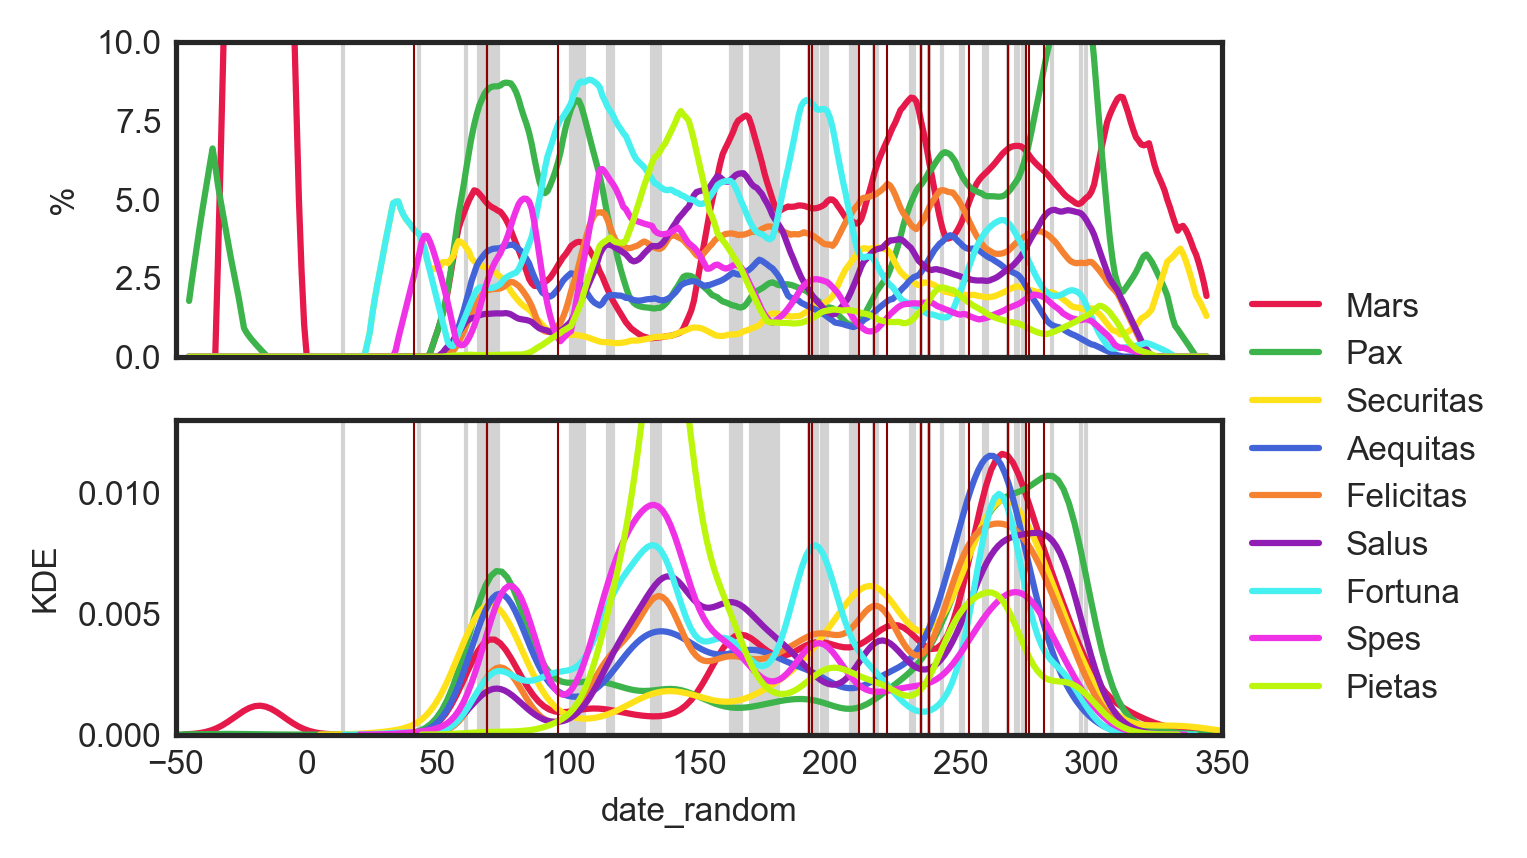

In [83]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, [ax1, ax2] = plt.subplots(2,1)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax1.plot(date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax1.set_xlim(-50, 350)
ax1.set_ylim(0,10)
ax1.set_ylabel("%")
ax1.set_xticklabels([])
#ax1.legend(loc="lower left", bbox_to_anchor=(1,0))

for deity, color in zip(deities_select, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_random"], color=color, label=deity, bw_adjust=0.5, ax=ax2)
ax2.set_xlim(-50, 350)
ax2.set_ylim(0, 0.013)
ax2.set_ylabel("KDE")
ax2.legend(loc="lower left", bbox_to_anchor=(1,0))

for n in wars.index:
    war = dict(wars.iloc[n])
    ax1.axvspan(war["Start_date"], war["End_date"], color="lightgrey")
    ax2.axvspan(war["Start_date"], war["End_date"], color="lightgrey")

for n in assassinated.index:
    assass = dict(assassinated.iloc[n])
    ax1.axvline(assass["Assassinated"], color="darkred", lw=0.5)
    ax2.axvline(assass["Assassinated"], color="darkred", lw=0.5)


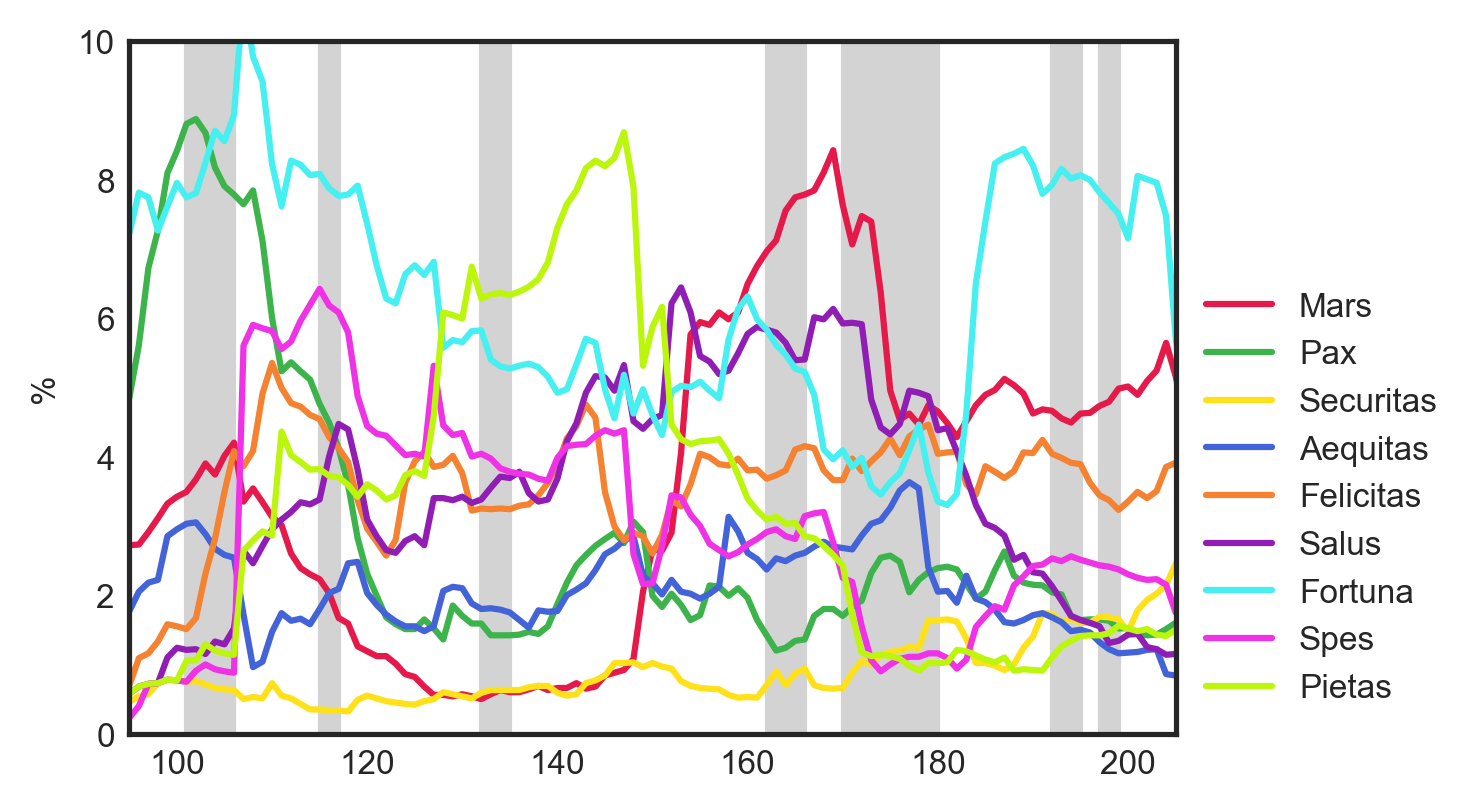

In [84]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax.plot(date_freqs_df[deity], color=color, label=deity)
    #ax.plot(date_freqs_df.index, date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax.set_xlim(0, 300)
ax.set_ylim(0,10)
ax.set_ylabel("%")
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

ax.set_xlim(95,205)

for n in wars.index:
    war = dict(wars.iloc[n])
    ax.axvspan(war["Start_date"], war["End_date"], color="lightgrey")# , alpha=0.5)

# Exploring inscriptions

In [101]:
# experiments with LIRE
LIRE = gpd.read_file("/Users/kasev//Projects/LIRE_ETL/data/large_data/LIRE_v1-2.geojson", driver="GeoJSON")

In [102]:
LIRE.groupby("type_of_inscription_auto").size().sort_values(ascending=False)

type_of_inscription_auto
epitaph                            74578
votive inscription                 15700
owner/artist inscription           10460
honorific inscription               5573
building/dedicatory inscription     3241
mile-/leaguestone                   2536
identification inscription          1910
acclamation                          443
boundary inscription                 410
military diploma                     329
list                                 294
defixio                              292
letter                               288
label                                273
elogium                              150
public legal inscription             132
seat inscription                      54
private legal inscription             37
prayer                                23
assignation inscription               16
calendar                              13
adnuntiatio                            1
dtype: int64

In [103]:
deities_morphs = {
    "Pax" :     ["Pax", "Pacis", "Paci", "Pacem", "Pace"],
    "Mars":     ["Mars", "Martis", "Marti", "Martem", "Marte"],
    "Securitas":     ["Securitas", "Securitatis", "Securitati", "Securitatem", "Securitate"],
    "Aequitas":     ["Aequitas", "Aequitatis", "Aequitati", "Aequitatem", "Aequitate"],
    "Felicitas":     ["Felicitas", "Felicitatis", "Felicitati", "Felicitatem", "Felicitate"],
    "Salus":     ["Salus", "Salutis", "Saluti", "Salutem", "Salute"],
    "Fortuna":     ["Fortuna", "Fortunae", "Fortunam", "Fortunā"],
    "Spes":     ["Spes", "Spei", "Spem", "Spe"],
    "Pietas":     ["Pietas", "Pietatis", "Pietati", "Pietatem", "Pietate"]
}

In [104]:
# older functional version
def extract_deities(inscription_text):
    deities_found = []
    if not isinstance(inscription_text, str): # if not valid string
        inscription_text = ""
    for deity in deities_morphs.keys():
        for deity_morph in deities_morphs[deity]:
            try:
                if deity_morph in inscription_text: # first check it this way, otherwise skip
                    deity_morph_N = len(re.findall("(\W|^)" + deity_morph + "(\W|$)", inscription_text))
                    if deity_morph_N > 0:
                        deities_found.extend([deity] * deity_morph_N)
                        inscription_text = re.sub("(\W|^)(" + deity_morph + ")(\W|$)", r"\1", inscription_text)
            except: pass
    return deities_found

In [105]:
LIRE["deities"] = LIRE["clean_text_interpretive_word"].apply(extract_deities)

In [106]:
LIRE[LIRE["deities"].apply(bool)]["deities"].tolist()[:3]

[['Mars'], ['Fortuna'], ['Pax']]

In [107]:
LIRE[LIRE["deities"].apply(bool)].sample(100, random_state=0)[["EDCS-ID", "EDH-ID", "not_before", "not_after", "clean_text_interpretive_word", "deities"]].to_csv("../data/lire_deities_sample.csv")

In [108]:
deity = "Fortuna"
len(LIRE[LIRE["deities"].apply(lambda x: deity in x)])

595

In [109]:
LIRE["random_dates"] = LIRE.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], 1000), axis=1)

In [110]:
LIRE_deities = LIRE[LIRE["deities"].apply(bool)].copy()

[[<matplotlib.patches.Polygon at 0x31e8b7160>],

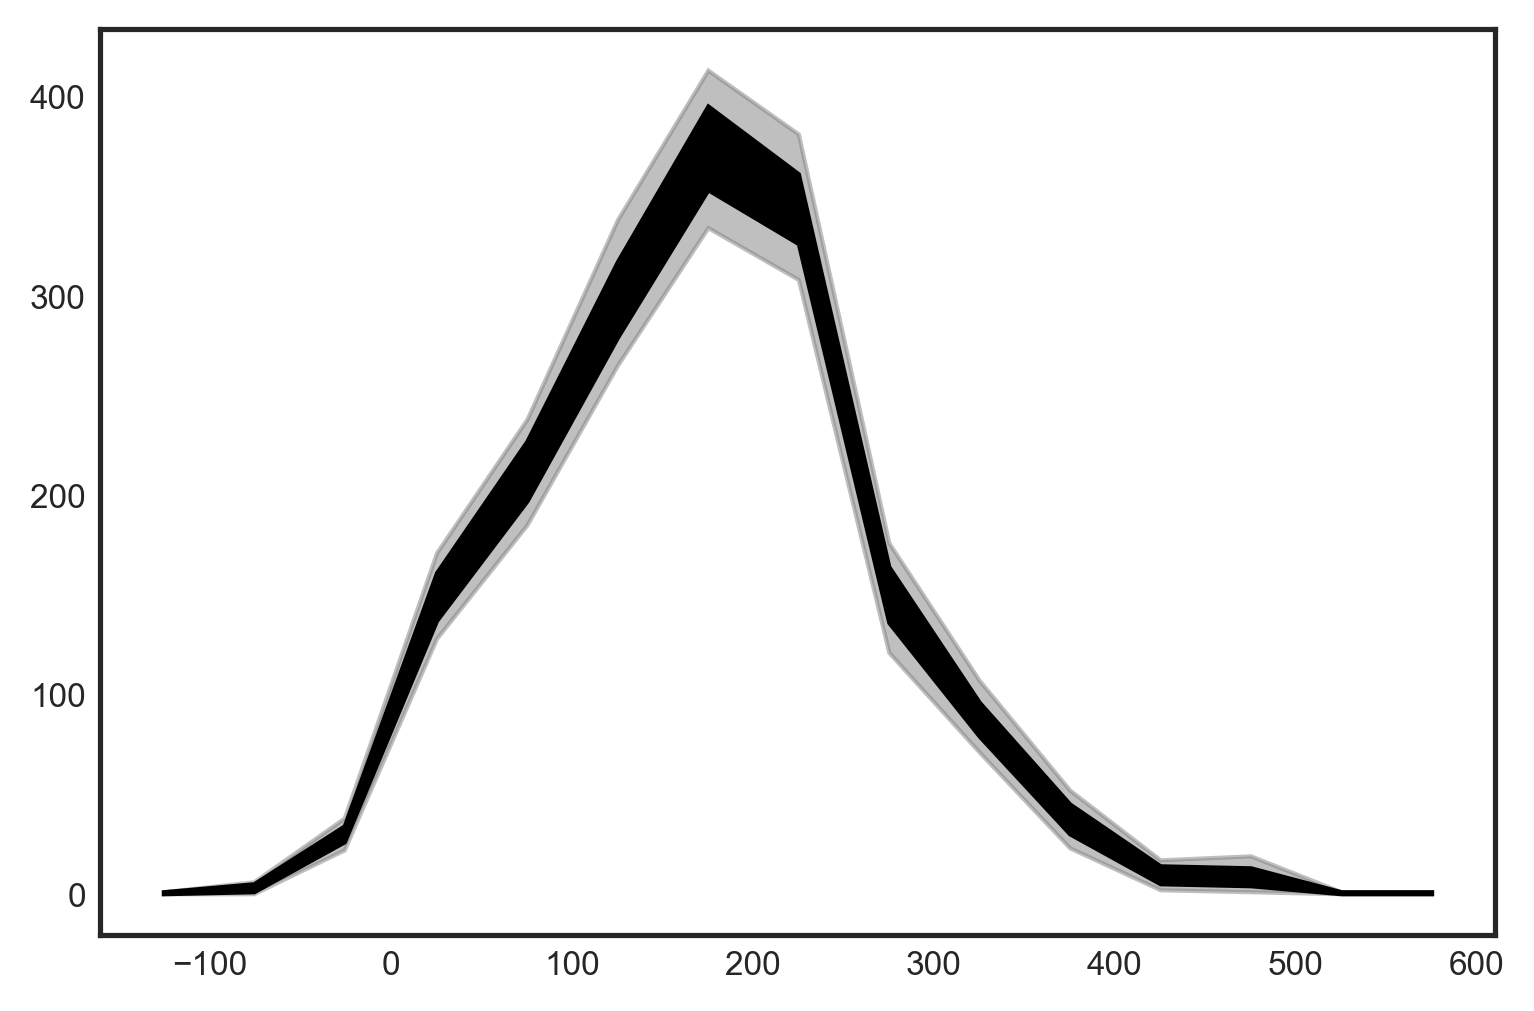

In [111]:
tempun.timeblocksplot_from_randoms(LIRE_deities["random_dates"])

In [112]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

colors_dict = dict(zip(deities_morphs.keys(), colors[:len(deities_morphs.keys())]))
colors_dict

{'Pax': '#e6194b',
 'Mars': '#3cb44b',
 'Securitas': '#ffe119',
 'Aequitas': '#4363d8',
 'Felicitas': '#f58231',
 'Salus': '#911eb4',
 'Fortuna': '#46f0f0',
 'Spes': '#f032e6',
 'Pietas': '#bcf60c'}

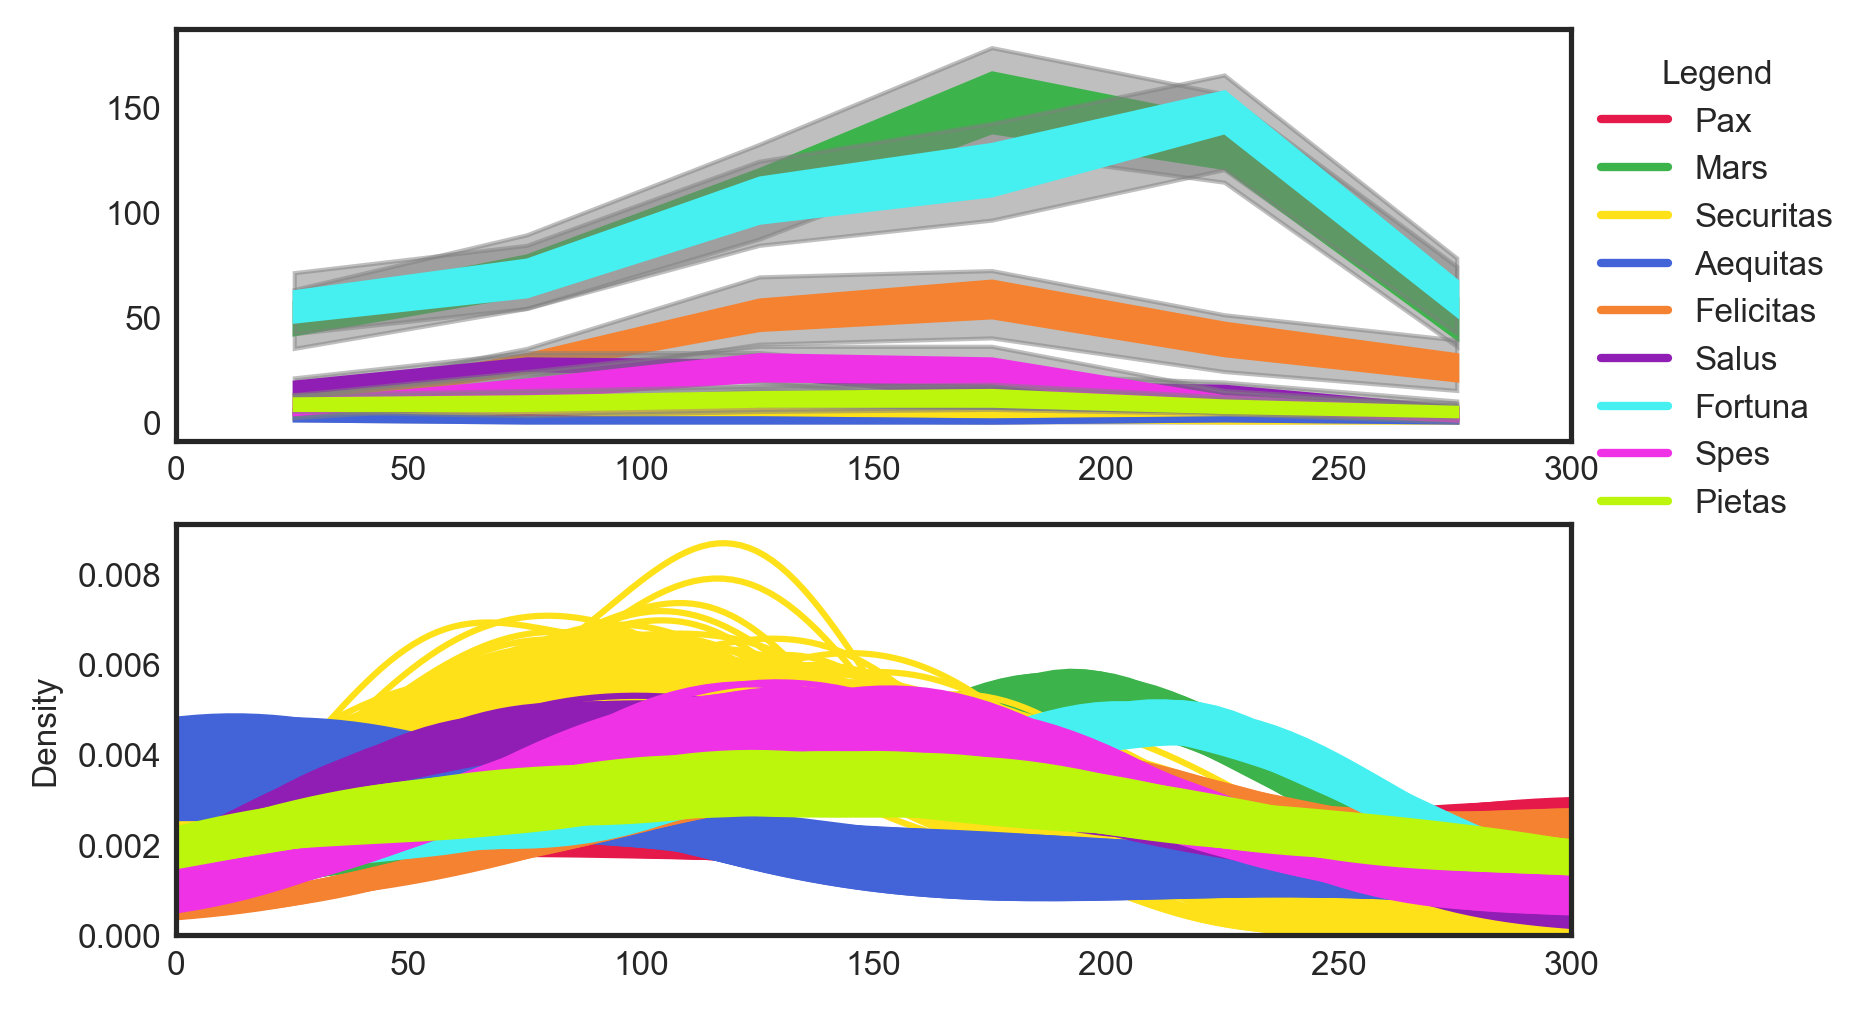

In [113]:
fig, [ax1, ax2] = plt.subplots(2,1)

for deity in deities_morphs.keys():
    deity_df = LIRE[LIRE["deities"].apply(lambda x: deity in x)]
    tempun.timeblocksplot_from_randoms(deity_df["random_dates"], timeblocks=[0,300,50], color=colors_dict[deity], ax=ax1)
    tempun.kdeplot_from_randoms(deity_df["random_dates"], color=colors_dict[deity], ax=ax2)
    #sims = tempun.get_simulation_variants(deity_df["random_dates"])
    #for sim in sims[:100]:
    #    sns.kdeplot(sim, ax=ax2, color=colors_dict[deity])
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)

markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors_dict.values()]
ax1.legend(markers, colors_dict.keys(), numpoints=1,  title="Legend", bbox_to_anchor=(1, 1), loc='upper left')

/Users/kasev/Projects/coins/coins_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


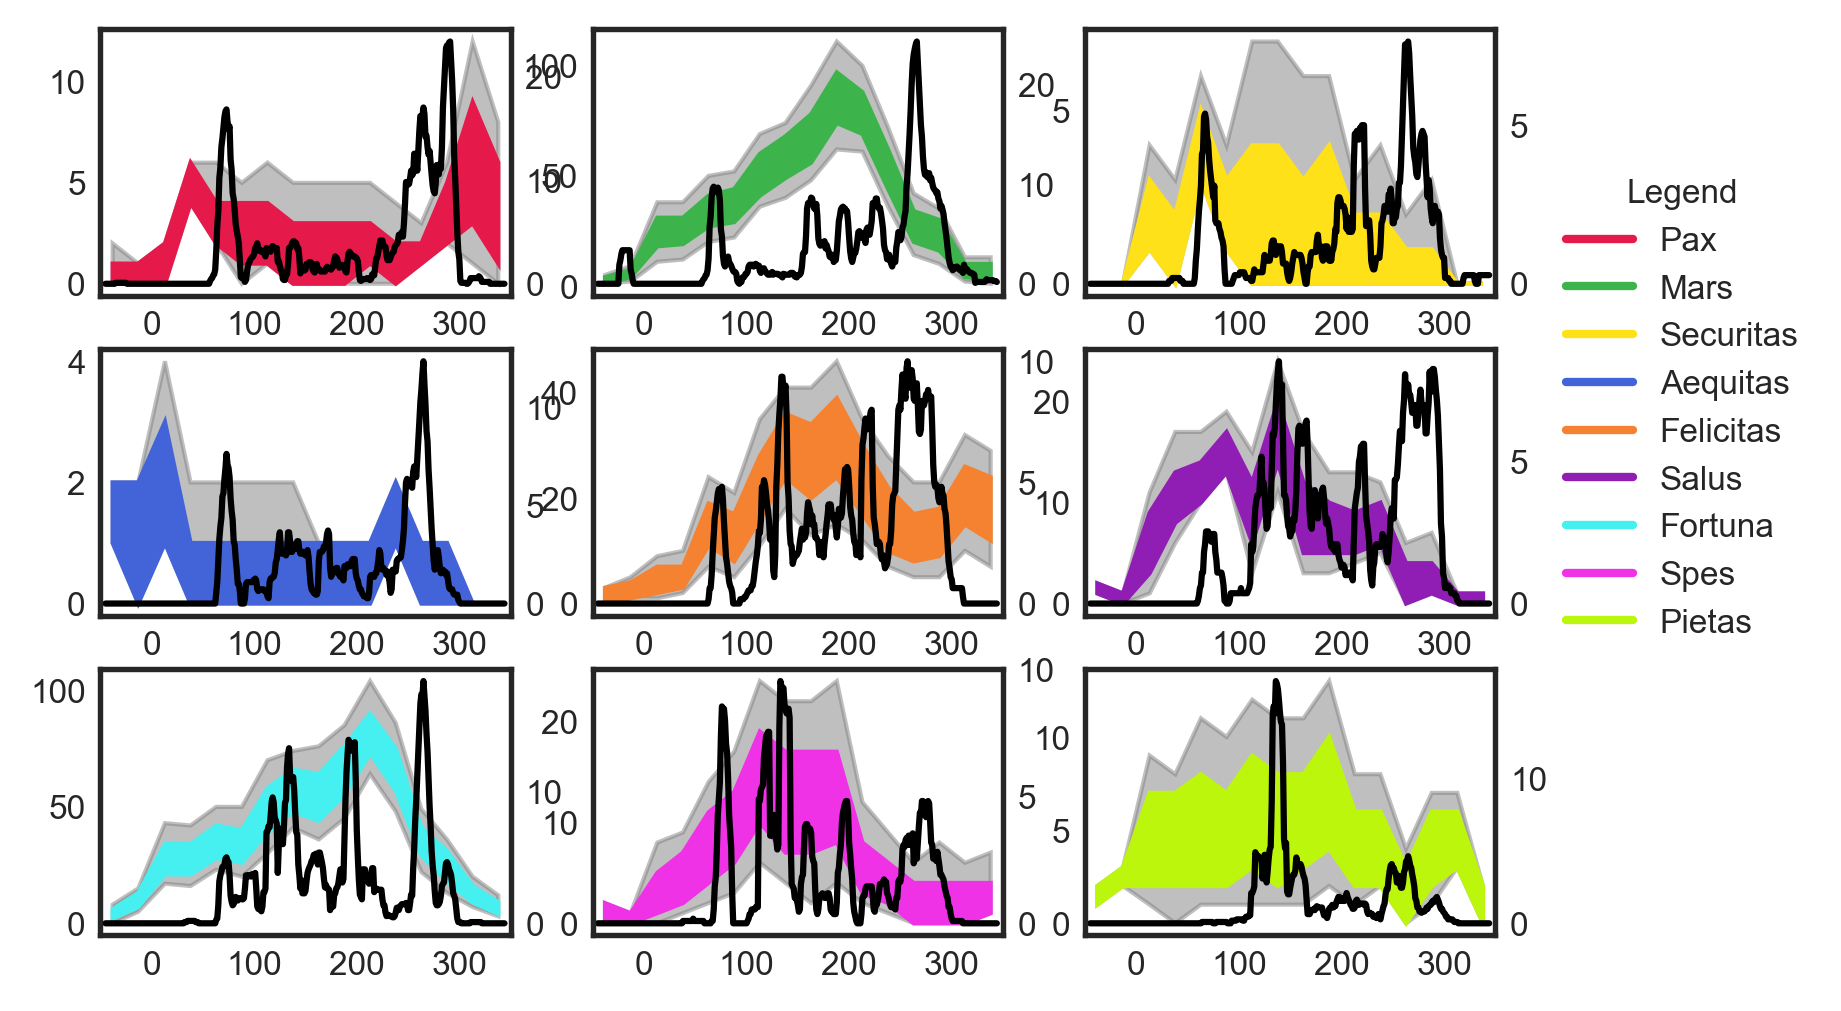

In [141]:
fig, axs = plt.subplots(3,3, tight_layout=True)

for deity, ax in zip(deities_morphs.keys(), axs.ravel()):
    deity_df = LIRE[LIRE["deities"].apply(lambda x: deity in x)]
    tempun.timeblocksplot_from_randoms(deity_df["random_dates"], timeblocks=[-50,350,25], color=colors_dict[deity], ax=ax)
    #tempun.kdeplot_from_randoms(deity_df["random_dates"], color=colors_dict[deity], ax=ax2)
    #sims = tempun.get_simulation_variants(deity_df["random_dates"])
    #for sim in sims[:100]:
    #    sns.kdeplot(sim, ax=ax2, color=colors_dict[deity])
    ax_twinx = ax.twinx()
    ax_twinx.plot(deities_by_date_df[deity].rolling(11, center=True).mean(), color="black")
    ax.set_xlim(-50,350)
#ax2.set_xlim(0,300)

markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors_dict.values()]
ax.legend(markers, colors_dict.keys(), numpoints=1,  title="Legend", bbox_to_anchor=(1.1, 1), loc='lower left')

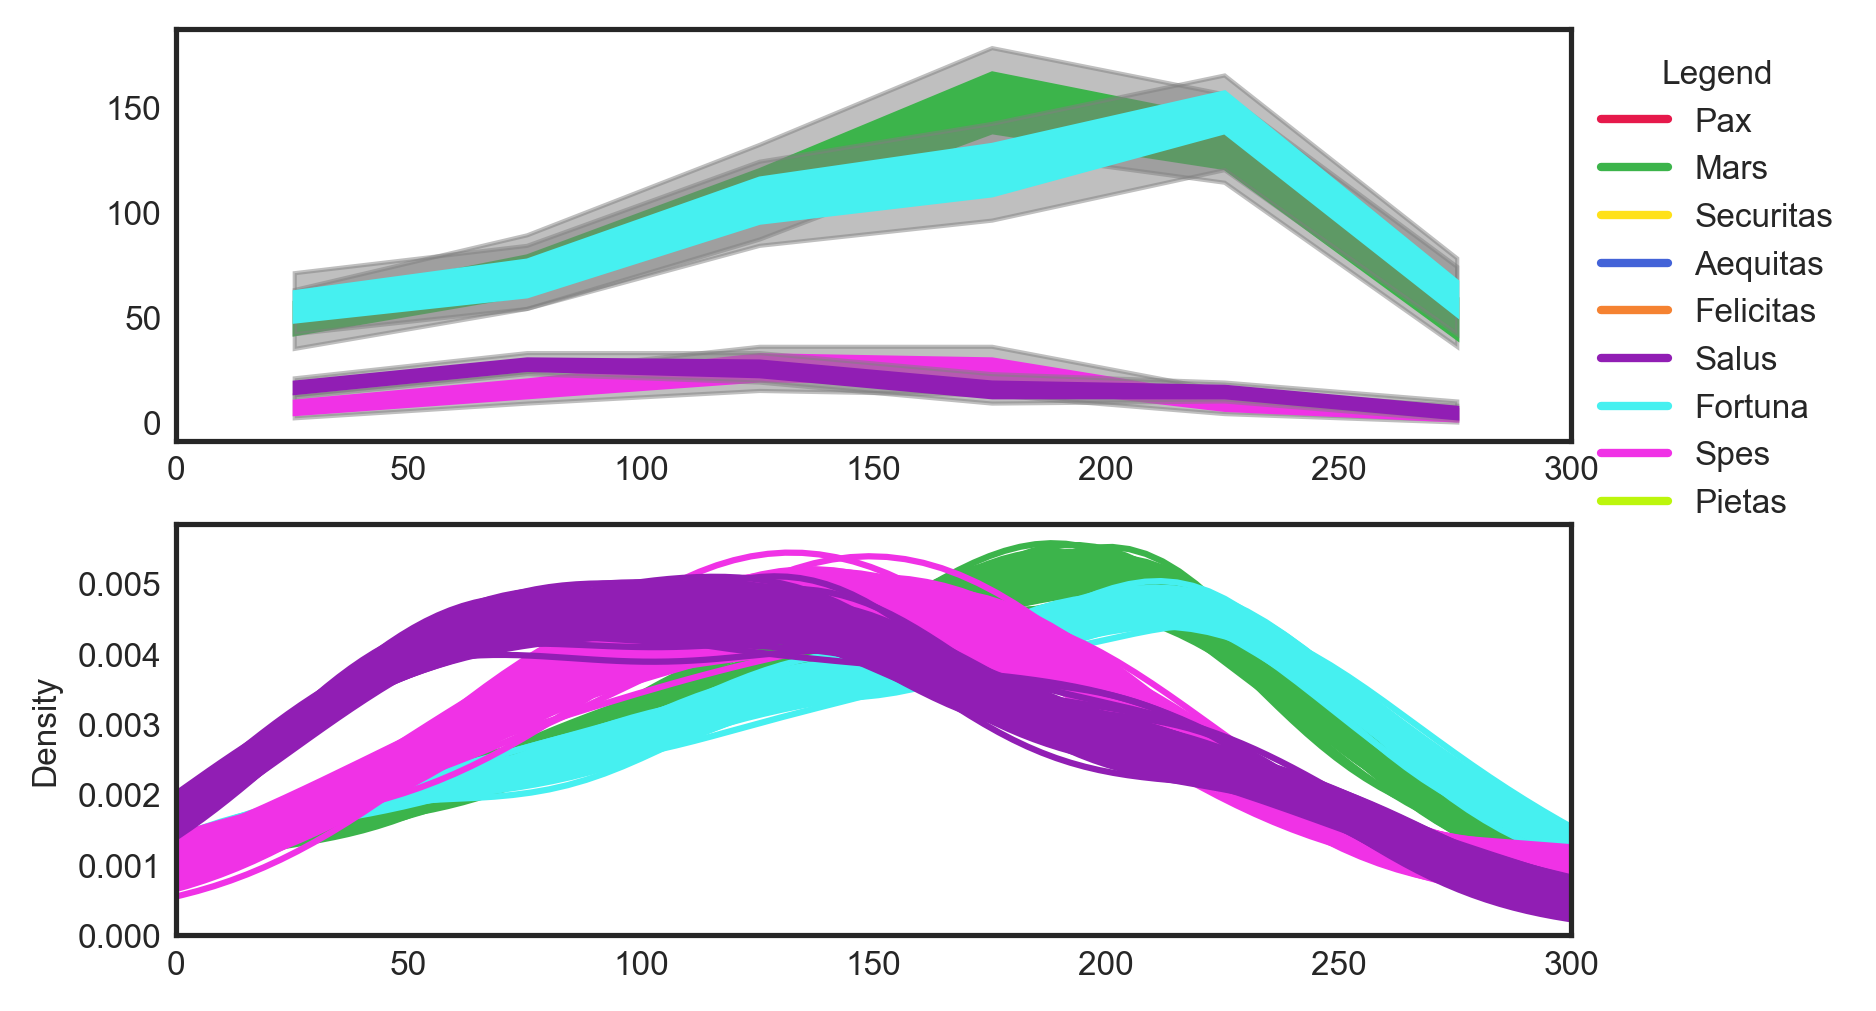

In [142]:
fig, [ax1, ax2] = plt.subplots(2,1)

for deity in ["Mars", "Fortuna", "Spes", "Salus"]:
    deity_df = LIRE[LIRE["deities"].apply(lambda x: deity in x)]
    tempun.timeblocksplot_from_randoms(deity_df["random_dates"], timeblocks=[0,300,50], color=colors_dict[deity], ax=ax1)
    tempun.kdeplot_from_randoms(deity_df["random_dates"], color=colors_dict[deity], ax=ax2, random_size=100)

    #sims = tempun.get_simulation_variants(deity_df["random_dates"])
    #for sim in sims[:100]:
    #    sns.kdeplot(sim, ax=ax2, color=colors_dict[deity])
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)

markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors_dict.values()]
ax1.legend(markers, colors_dict.keys(), numpoints=1,  title="Legend", bbox_to_anchor=(1, 1), loc='upper left')

# Time series analysis
- to correlate two time series data, you have to look at percentual returns, not raw data, otherwise the correlation is typically very high
-
-